# Summarize recorded interactions

In [1]:
# Import some useful modules
import json
import sys
import networkx
import pandas
import numpy

import matplotlib.pyplot as plotter
from pathlib import Path
from IPython.display import display, HTML

Specify the RESULTS_DIR used for recording interactions

In [2]:
# USE ABSOLUTE PATHS HERE!!!
DATA_DIR = Path("/home/ashinde/PhD/CaffineBravery/results_l3/")
DATA_FILES = list(DATA_DIR.iterdir())

for _file in DATA_FILES:
    print(f"Using {_file}")

Using /home/ashinde/PhD/CaffineBravery/results_l3/1260217713_attl0_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l3/1713568869_attl0_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l3/1863655430_defl1_active_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l3/976827477_defl1_passive_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l3/2092709730_attl2_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l3/888611662_defl3_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l3/trace.0.json
Using /home/ashinde/PhD/CaffineBravery/results_l3/trace.1.json
Using /home/ashinde/PhD/CaffineBravery/results_l3/trace.2.json
Using /home/ashinde/PhD/CaffineBravery/results_l3/trace.3.json
Using /home/ashinde/PhD/CaffineBravery/results_l3/trace.4.json


In [3]:
# Common utility function for reading JSON from a file
def load_json(fname):

    data = None

    with open(fname) as f:
        data = json.load(f)

    return data

---
Take a look at the policy graphs of the agents

In [4]:
# Draw policy graphs
import graphviz


def get_edge_map(edges):
    start = 0
    edge_map = {}
    multi_edge_map = {}
    
    for src, children in edges.items():
        for obs, child in children.items():
            
            # index this observation if not already done
            if obs not in edge_map.keys():
                edge_map[obs] = start
                start += 1
                
            # Add obs to (src, dst) key
            if (src, child) not in multi_edge_map.keys():
                multi_edge_map[(src, child)] = [edge_map[obs]]
            
            else:
                _l = multi_edge_map[(src, child)]
                _l.append(edge_map[obs])
                multi_edge_map[(src, child)] = _l
                
    return edge_map, multi_edge_map


def get_graphviz_graph(json_data):
    
    # initialize empty graph
    G = graphviz.Digraph()
    
    nodes = json_data["nodes"]
    edges = json_data["edges"]
    
    edge_map, multi_edge_map = get_edge_map(edges)
    print(f"Edge map is:")
    for e, i in edge_map.items():
        print(f"{i}:{e}")

    for k, v in nodes.items():
        l = v["act"] + "_start" if "start" in v.keys() else v["act"]
        G.node(k, label=l, fontsize="12")
        
    for s, t in multi_edge_map.keys():
        G.edge(s, t, label=str(multi_edge_map[(s, t)]))
        
    return G

---
## Plot policy graphs

Displaying /home/ashinde/PhD/CaffineBravery/results_l3/1260217713_attl0_pol_graph.json
Edge map is:
0:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, failure), (ConnStatus, terminated)]
1:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, success), (ConnStatus, terminated)]
2:[(AccessPerm, auth), (HostObs, none), (ActionResult, failure), (ConnStatus, terminated)]
3:[(AccessPerm, auth), (HostObs, none), (ActionResult, success), (ConnStatus, terminated)]
4:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, failure), (ConnStatus, terminated)]
5:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, success), (ConnStatus, terminated)]
6:[(AccessPerm, denied), (HostObs, none), (ActionResult, failure), (ConnStatus, terminated)]
7:[(AccessPerm, denied), (HostObs, none), (ActionResult, success), (ConnStatus, terminated)]
8:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, failure), (ConnStatus, active)]
9:[(AccessPerm, auth), (HostObs, none), (Acti

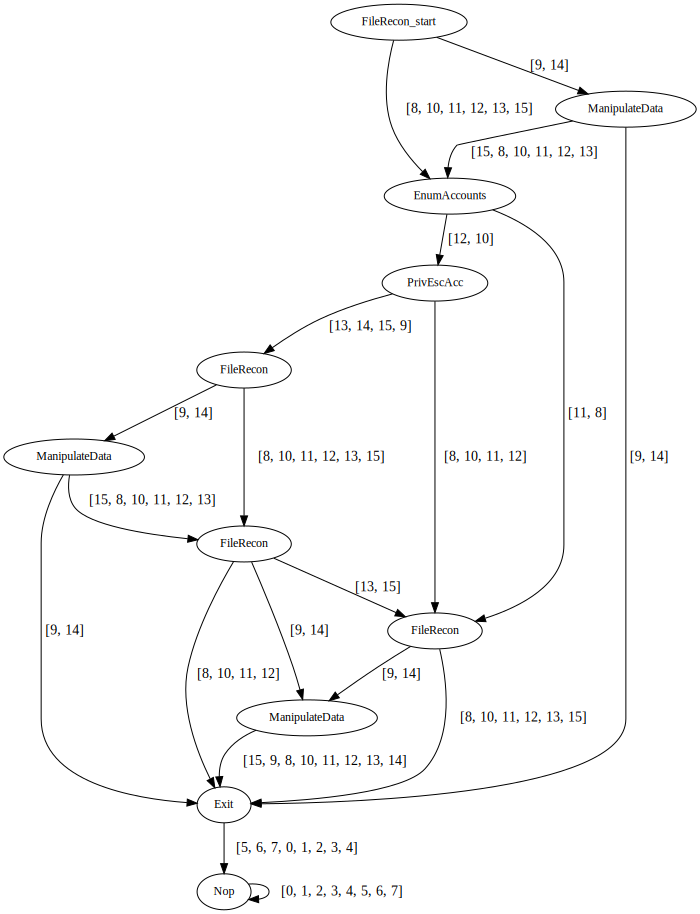

Displaying /home/ashinde/PhD/CaffineBravery/results_l3/1713568869_attl0_pol_graph.json
Edge map is:
0:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, failure), (ConnStatus, active)]
1:[(AccessPerm, auth), (HostObs, none), (ActionResult, success), (ConnStatus, active)]
2:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, success), (ConnStatus, active)]
3:[(AccessPerm, denied), (HostObs, none), (ActionResult, failure), (ConnStatus, active)]
4:[(AccessPerm, denied), (HostObs, none), (ActionResult, success), (ConnStatus, active)]
5:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, failure), (ConnStatus, active)]
6:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, success), (ConnStatus, active)]
7:[(AccessPerm, auth), (HostObs, none), (ActionResult, failure), (ConnStatus, active)]
8:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, success), (ConnStatus, terminated)]
9:[(AccessPerm, denied), (HostObs, none), (ActionResult, failure), (ConnS

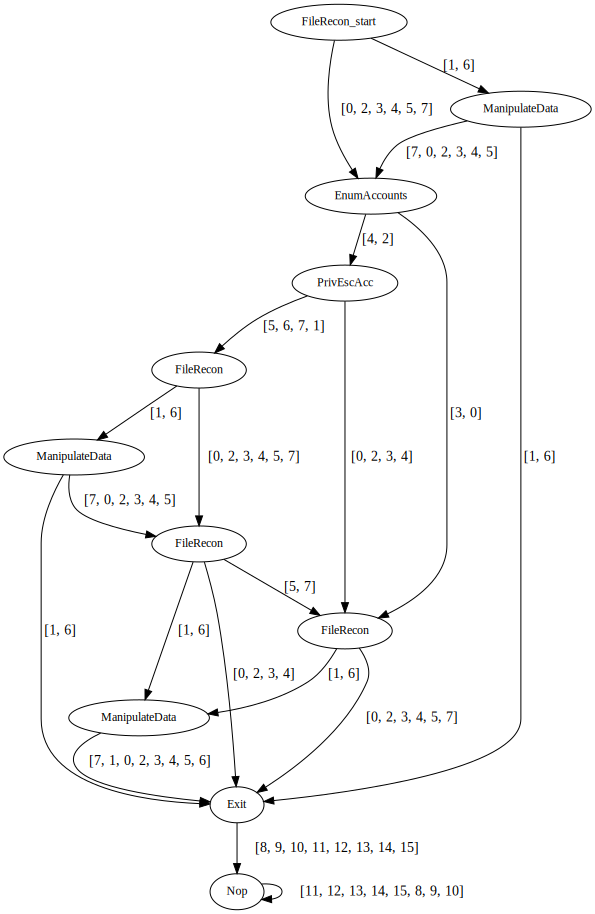

Displaying /home/ashinde/PhD/CaffineBravery/results_l3/1863655430_defl1_active_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, login_activity)]
3:[(EndPtAlerts, none)]


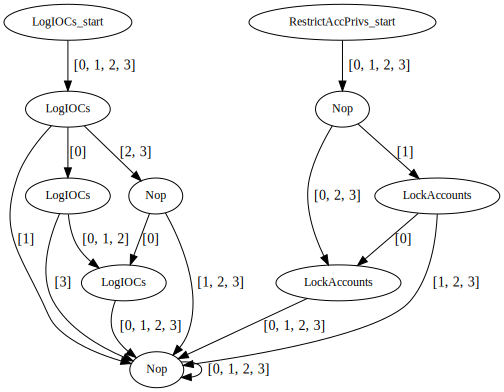

Displaying /home/ashinde/PhD/CaffineBravery/results_l3/976827477_defl1_passive_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, login_activity)]
3:[(EndPtAlerts, none)]


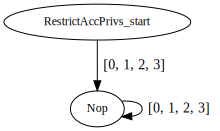

Displaying /home/ashinde/PhD/CaffineBravery/results_l3/2092709730_attl2_pol_graph.json
Edge map is:
0:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, failure), (ConnStatus, active), (DefenseObs, perms_change)]
1:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, failure), (ConnStatus, active), (DefenseObs, acc_policy_change)]
2:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, failure), (ConnStatus, active), (DefenseObs, none)]
3:[(AccessPerm, auth), (HostObs, none), (ActionResult, failure), (ConnStatus, active), (DefenseObs, acc_policy_change)]
4:[(AccessPerm, auth), (HostObs, none), (ActionResult, failure), (ConnStatus, active), (DefenseObs, perms_change)]
5:[(AccessPerm, auth), (HostObs, none), (ActionResult, failure), (ConnStatus, active), (DefenseObs, none)]
6:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, success), (ConnStatus, active), (DefenseObs, none)]
7:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, success), (ConnStatus, a

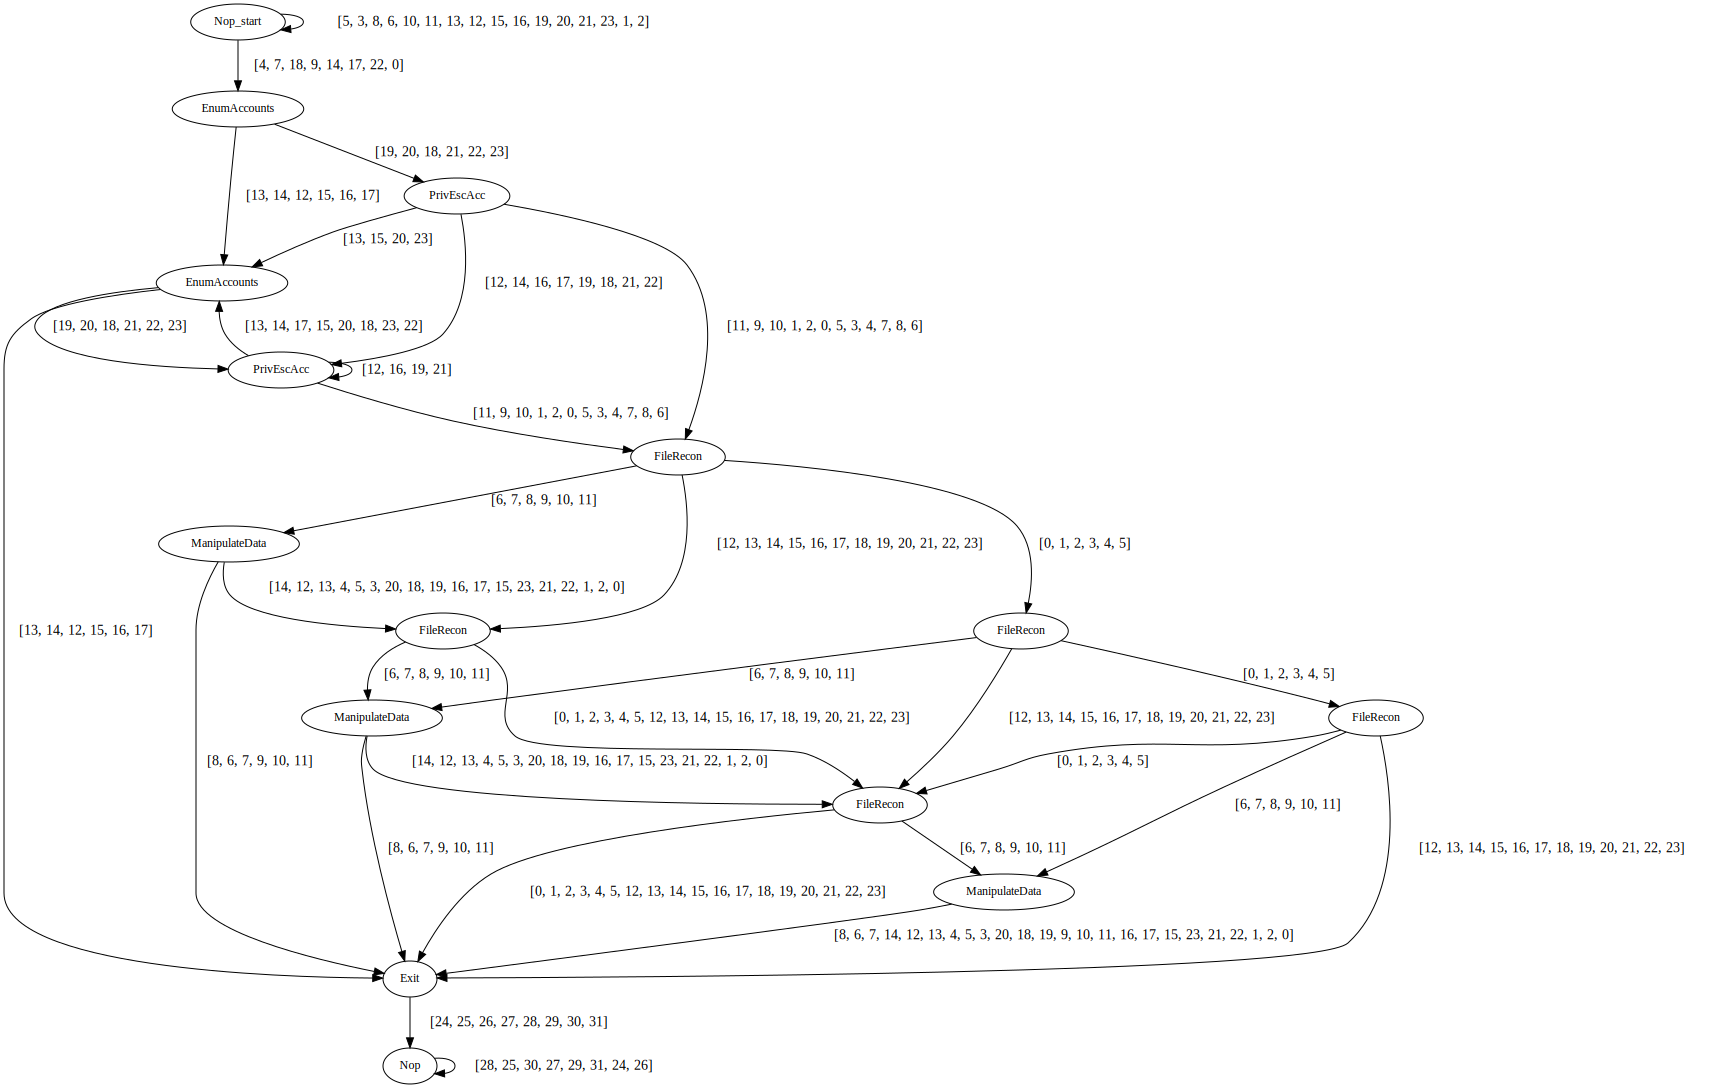

Displaying /home/ashinde/PhD/CaffineBravery/results_l3/888611662_defl3_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, login_activity)]
3:[(EndPtAlerts, none)]


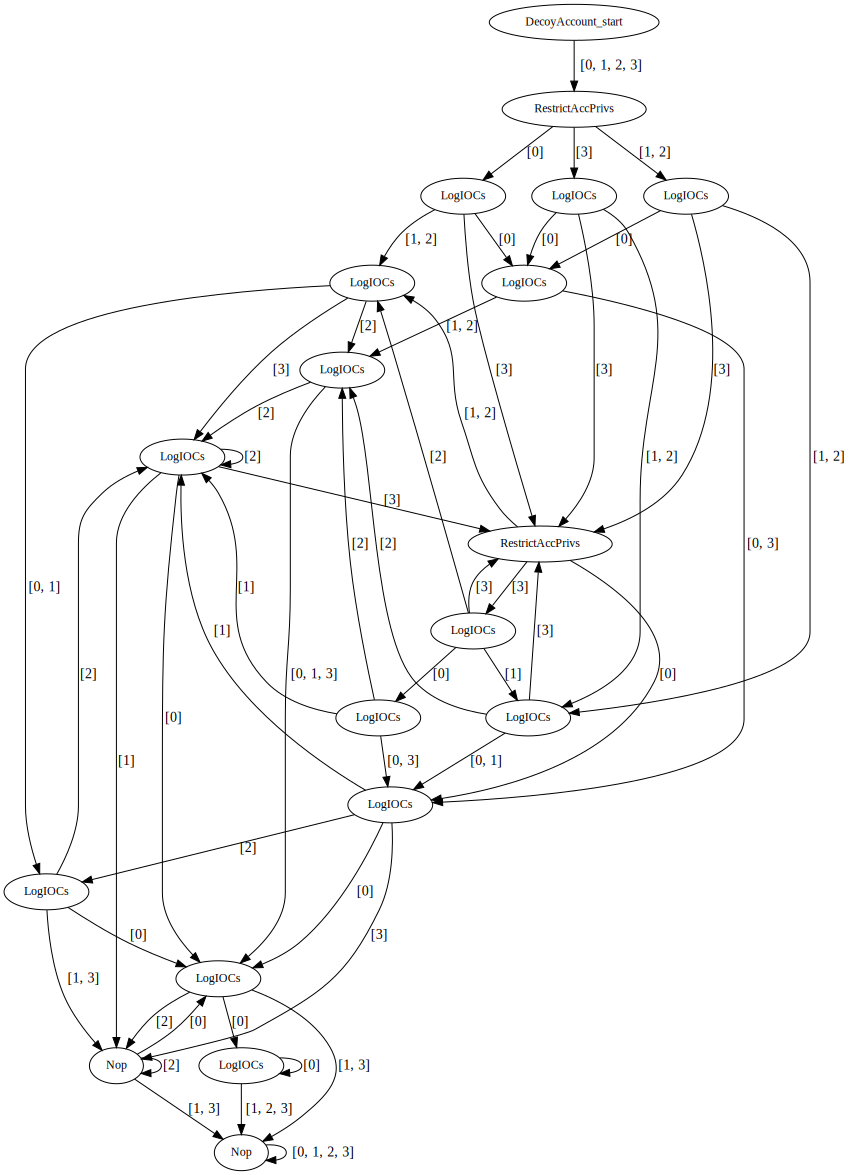

In [5]:
GRAPH_FILES = list(filter(lambda x: "pol_graph" in x.parts[-1], DATA_FILES))

for g in GRAPH_FILES:
    print(f"Displaying {g}")
    data = load_json(g)
    G = get_graphviz_graph(data)
    display(G)

---
Summarize the actual interactions

In [6]:
# Get the trace files
TRACE_FILES = list(filter(lambda x: "trace" in x.parts[-1], DATA_FILES))

for _file in TRACE_FILES:
    print(f"Using trace from {_file}")


Using trace from /home/ashinde/PhD/CaffineBravery/results_l3/trace.0.json
Using trace from /home/ashinde/PhD/CaffineBravery/results_l3/trace.1.json
Using trace from /home/ashinde/PhD/CaffineBravery/results_l3/trace.2.json
Using trace from /home/ashinde/PhD/CaffineBravery/results_l3/trace.3.json
Using trace from /home/ashinde/PhD/CaffineBravery/results_l3/trace.4.json


+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                             none
1                               1.0                             none
2                               1.0                        file_enum
3                               1.0                             none
4                               1.0                        file_enum
5                               1.0                        file_enum
6                               1.0                   login_activity
7                               1.0                        file_enum
8                               1.0                       file_write
9                               1.0                       file_write

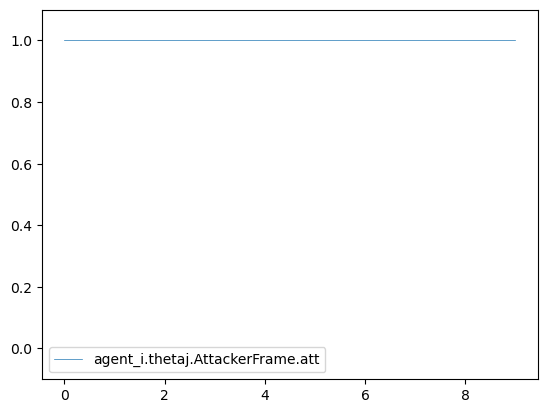

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.904762                        0.095238   
2                         0.904762                        0.095238   
3                         0.900277                        0.099723   
4                         0.881692                        0.118308   
5                         0.881692                        0.118308   
6                         0.881692                        0.118308   
7                         0.881692                        0.118308   
8                         0.859237                        0.140763   
9                         0.854601                        0.145399   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                   user_files   
1                            auth                   user_files   
2                          denied                         none   
3                          denied                   user_files   
4                          denied                         none   
5                          denied                         none   
6                            auth                   user_files   
7                            auth                         none   
8                            auth                   user_files   
9                            auth                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           failure                          active   
3                           failure                          active   
4                           failure                          active   
5                           success                          active   
6                           success                          active   
7                           success                          active   
8                           success                          active   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                    perms_change  
2                            none  
3                            none  
4                            none  
5                            none  
6                    perms_change  
7                            none  
8                            none  
9                            none

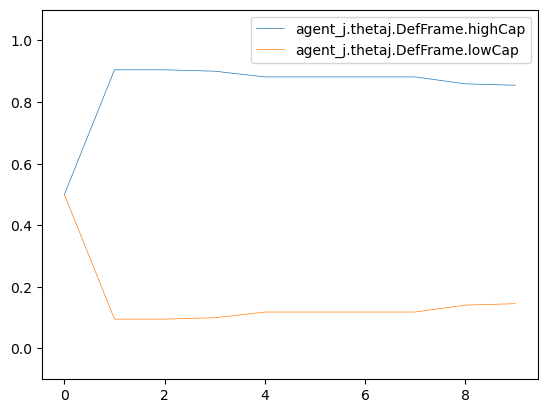

=============DataFound============


state.DataFound.no  state.DataFound.yes    agent_i.action  agent_j.action
0                 1.0                  0.0      DecoyAccount             Nop
1                 1.0                  0.0  RestrictAccPrivs             Nop
2                 1.0                  0.0           LogIOCs             Nop
3                 1.0                  0.0           LogIOCs       FileRecon
4                 1.0                  0.0           LogIOCs    EnumAccounts
5                 1.0                  0.0           LogIOCs    EnumAccounts
6                 1.0                  0.0           LogIOCs      PrivEscAcc
7                 1.0                  0.0               Nop       FileRecon
8                 0.0                  1.0               Nop  ManipulateData
9                 0.0                  1.0               Nop            Exit

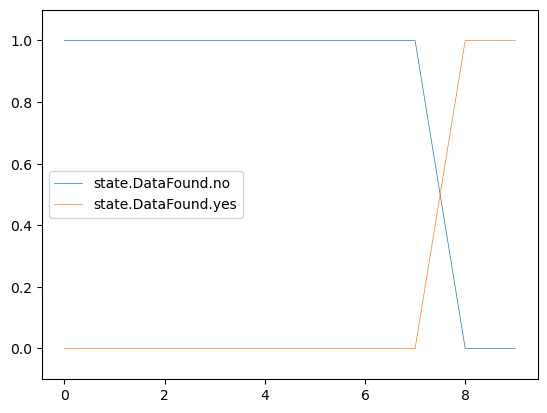

agent_i.DataFound.no  agent_i.DataFound.yes    agent_i.action  \
0              1.000000               0.000000      DecoyAccount   
1              1.000000               0.000000  RestrictAccPrivs   
2              1.000000               0.000000           LogIOCs   
3              1.000000               0.000000           LogIOCs   
4              0.999528               0.000472           LogIOCs   
5              0.392929               0.607071           LogIOCs   
6              0.237177               0.762823           LogIOCs   
7              0.141539               0.858461               Nop   
8              0.157908               0.842092               Nop   
9              0.052411               0.947589               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0             Nop                             none  
1             Nop                             none  
2             Nop                        file_enum  
3       FileRecon                             none  
4    EnumAccounts                        file_enum  
5    EnumAccounts                        file_enum  
6      PrivEscAcc                   login_activity  
7       FileRecon                        file_enum  
8  ManipulateData                       file_write  
9            Exit                       file_write

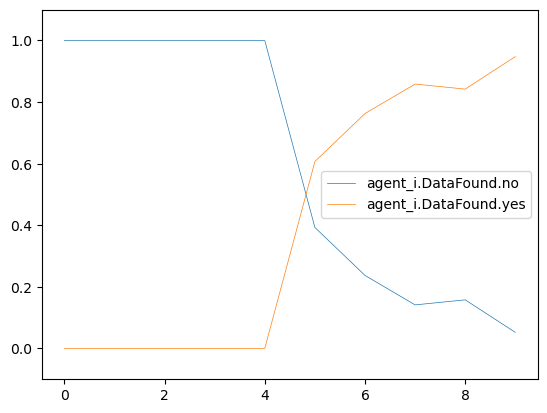

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action  \
0              1.000000               0.000000             Nop   
1              1.000000               0.000000             Nop   
2              1.000000               0.000000             Nop   
3              1.000000               0.000000       FileRecon   
4              1.000000               0.000000    EnumAccounts   
5              1.000000               0.000000    EnumAccounts   
6              1.000000               0.000000      PrivEscAcc   
7              1.000000               0.000000       FileRecon   
8              0.122441               0.877559  ManipulateData   
9              0.000070               0.999930            Exit   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                            auth   
2           LogIOCs                          denied   
3           LogIOCs                          denied   
4           LogIOCs                          denied   
5           LogIOCs                          denied   
6           LogIOCs                            auth   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           failure   
2                         none                           failure   
3                   user_files                           failure   
4                         none                           failure   
5                         none                           success   
6                   user_files                           success   
7                         none                           success   
8                   user_files                           success   
9                   user_files                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                          active                            none  
6                          active                    perms_change  
7                          active                            none  
8                          active                            none  
9                      terminated                            none

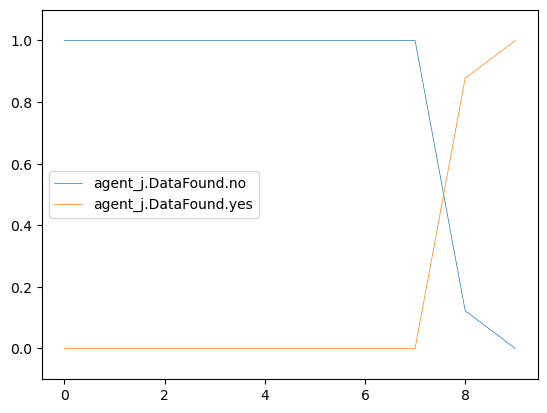

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes    agent_i.action  \
0                   1.0                    0.0      DecoyAccount   
1                   0.0                    1.0  RestrictAccPrivs   
2                   0.0                    1.0           LogIOCs   
3                   0.0                    1.0           LogIOCs   
4                   0.0                    1.0           LogIOCs   
5                   0.0                    1.0           LogIOCs   
6                   0.0                    1.0           LogIOCs   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0             Nop  
1             Nop  
2             Nop  
3       FileRecon  
4    EnumAccounts  
5    EnumAccounts  
6      PrivEscAcc  
7       FileRecon  
8  ManipulateData  
9            Exit

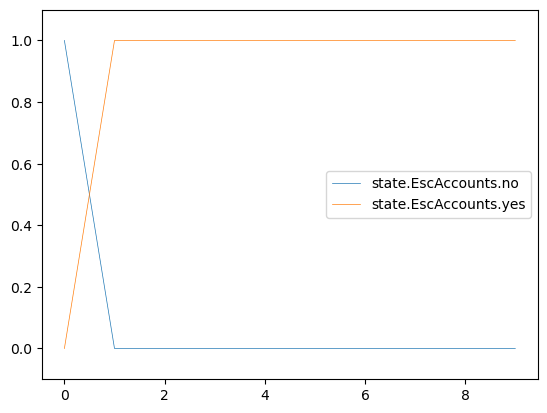

agent_i.EscAccounts.no  agent_i.EscAccounts.yes    agent_i.action  \
0                     1.0                      0.0      DecoyAccount   
1                     0.0                      1.0  RestrictAccPrivs   
2                     0.0                      1.0           LogIOCs   
3                     0.0                      1.0           LogIOCs   
4                     0.0                      1.0           LogIOCs   
5                     0.0                      1.0           LogIOCs   
6                     0.0                      1.0           LogIOCs   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0             Nop                             none  
1             Nop                             none  
2             Nop                        file_enum  
3       FileRecon                             none  
4    EnumAccounts                        file_enum  
5    EnumAccounts                        file_enum  
6      PrivEscAcc                   login_activity  
7       FileRecon                        file_enum  
8  ManipulateData                       file_write  
9            Exit                       file_write

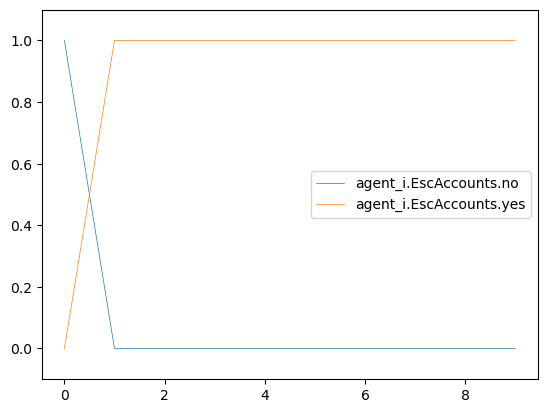

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                0.500000                 0.500000             Nop   
1                0.500000                 0.500000             Nop   
2                0.500000                 0.500000             Nop   
3                0.500000                 0.500000       FileRecon   
4                0.500000                 0.500000    EnumAccounts   
5                0.725806                 0.274194    EnumAccounts   
6                0.271739                 0.728261      PrivEscAcc   
7                0.000000                 1.000000       FileRecon   
8                0.000000                 1.000000  ManipulateData   
9                0.000000                 1.000000            Exit   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                            auth   
2           LogIOCs                          denied   
3           LogIOCs                          denied   
4           LogIOCs                          denied   
5           LogIOCs                          denied   
6           LogIOCs                            auth   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           failure   
2                         none                           failure   
3                   user_files                           failure   
4                         none                           failure   
5                         none                           success   
6                   user_files                           success   
7                         none                           success   
8                   user_files                           success   
9                   user_files                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                          active                            none  
6                          active                    perms_change  
7                          active                            none  
8                          active                            none  
9                      terminated                            none

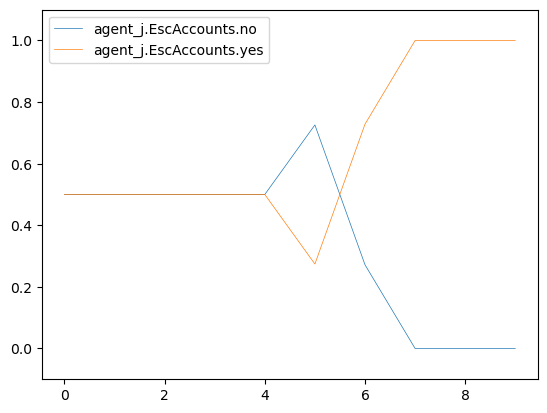

=============AccFound============


state.AccFound.no  state.AccFound.yes    agent_i.action  agent_j.action
0                1.0                 0.0      DecoyAccount             Nop
1                1.0                 0.0  RestrictAccPrivs             Nop
2                1.0                 0.0           LogIOCs             Nop
3                1.0                 0.0           LogIOCs       FileRecon
4                1.0                 0.0           LogIOCs    EnumAccounts
5                1.0                 0.0           LogIOCs    EnumAccounts
6                0.0                 1.0           LogIOCs      PrivEscAcc
7                0.0                 1.0               Nop       FileRecon
8                0.0                 1.0               Nop  ManipulateData
9                0.0                 1.0               Nop            Exit

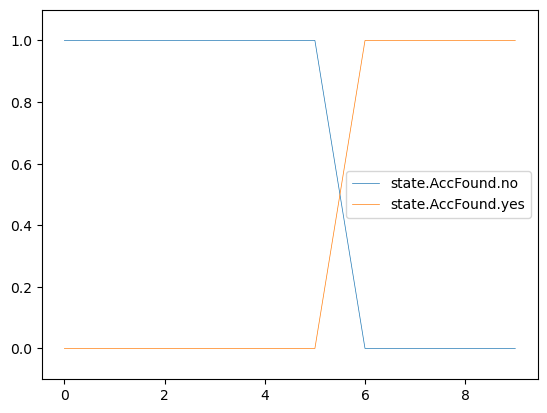

agent_i.AccFound.no  agent_i.AccFound.yes    agent_i.action  \
0             1.000000              0.000000      DecoyAccount   
1             1.000000              0.000000  RestrictAccPrivs   
2             0.994776              0.005224           LogIOCs   
3             0.310530              0.689470           LogIOCs   
4             0.198342              0.801658           LogIOCs   
5             0.050344              0.949655           LogIOCs   
6             0.017706              0.982294           LogIOCs   
7             0.018036              0.981964               Nop   
8             0.013540              0.986460               Nop   
9             0.005029              0.994971               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0             Nop                             none  
1             Nop                             none  
2             Nop                        file_enum  
3       FileRecon                             none  
4    EnumAccounts                        file_enum  
5    EnumAccounts                        file_enum  
6      PrivEscAcc                   login_activity  
7       FileRecon                        file_enum  
8  ManipulateData                       file_write  
9            Exit                       file_write

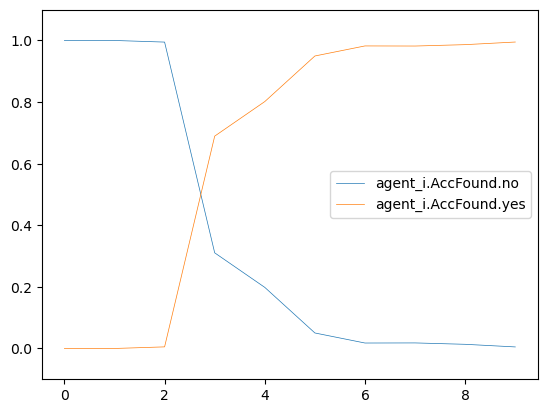

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action  \
0             1.000000              0.000000             Nop   
1             1.000000              0.000000             Nop   
2             1.000000              0.000000             Nop   
3             1.000000              0.000000       FileRecon   
4             1.000000              0.000000    EnumAccounts   
5             0.943548              0.056452    EnumAccounts   
6             0.296196              0.703804      PrivEscAcc   
7             0.000000              1.000000       FileRecon   
8             0.000000              1.000000  ManipulateData   
9             0.000000              1.000000            Exit   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                            auth   
2           LogIOCs                          denied   
3           LogIOCs                          denied   
4           LogIOCs                          denied   
5           LogIOCs                          denied   
6           LogIOCs                            auth   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           failure   
2                         none                           failure   
3                   user_files                           failure   
4                         none                           failure   
5                         none                           success   
6                   user_files                           success   
7                         none                           success   
8                   user_files                           success   
9                   user_files                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                          active                            none  
6                          active                    perms_change  
7                          active                            none  
8                          active                            none  
9                      terminated                            none

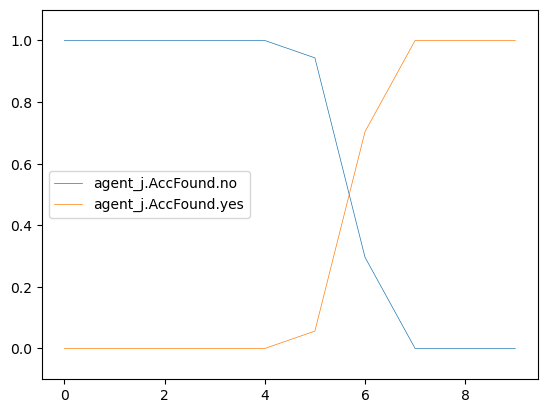

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot    agent_i.action  agent_j.action  
0                      1.0      DecoyAccount             Nop  
1                      1.0  RestrictAccPrivs             Nop  
2                      1.0           LogIOCs             Nop  
3                      1.0           LogIOCs       FileRecon  
4                      1.0           LogIOCs    EnumAccounts  
5                      1.0           LogIOCs    EnumAccounts  
6                      1.0           LogIOCs      PrivEscAcc  
7                      1.0               Nop       FileRecon  
8                      1.0               Nop  ManipulateData  
9                      1.0               Nop            Exit

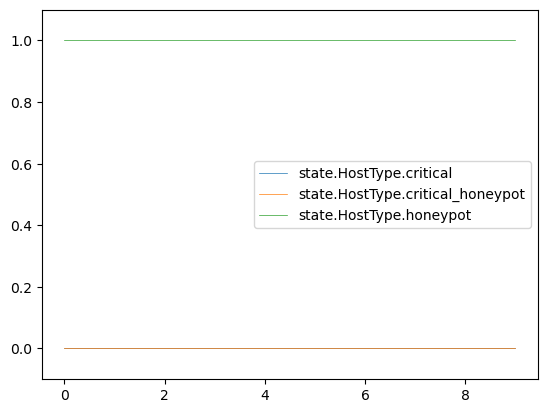

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot    agent_i.action  agent_j.action  \
0                        1.0      DecoyAccount             Nop   
1                        1.0  RestrictAccPrivs             Nop   
2                        1.0           LogIOCs             Nop   
3                        1.0           LogIOCs       FileRecon   
4                        1.0           LogIOCs    EnumAccounts   
5                        1.0           LogIOCs    EnumAccounts   
6                        1.0           LogIOCs      PrivEscAcc   
7                        1.0               Nop       FileRecon   
8                        1.0               Nop  ManipulateData   
9                        1.0               Nop            Exit   

  agent_i.observation.EndPtAlerts'  
0                             none  
1                             none  
2                        file_enum  
3                             none  
4                        file_enum  
5                        file_enum  
6                   login_activity  
7                        file_enum  
8                       file_write  
9                       file_write

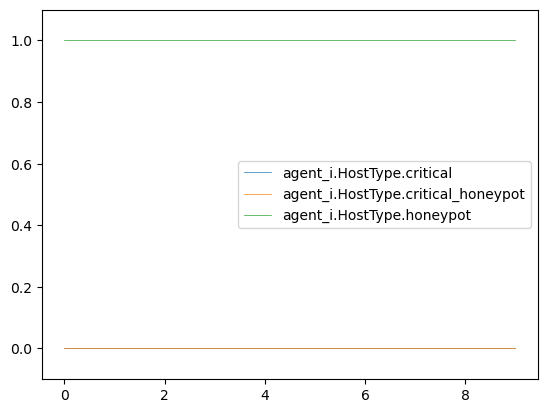

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot  agent_j.action    agent_i.action  \
0                        0.0             Nop      DecoyAccount   
1                        0.0             Nop  RestrictAccPrivs   
2                        0.0             Nop           LogIOCs   
3                        0.0       FileRecon           LogIOCs   
4                        0.0    EnumAccounts           LogIOCs   
5                        0.0    EnumAccounts           LogIOCs   
6                        0.0      PrivEscAcc           LogIOCs   
7                        0.0       FileRecon               Nop   
8                        0.0  ManipulateData               Nop   
9                        0.0            Exit               Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                   user_files   
1                            auth                   user_files   
2                          denied                         none   
3                          denied                   user_files   
4                          denied                         none   
5                          denied                         none   
6                            auth                   user_files   
7                            auth                         none   
8                            auth                   user_files   
9                            auth                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           failure                          active   
3                           failure                          active   
4                           failure                          active   
5                           success                          active   
6                           success                          active   
7                           success                          active   
8                           success                          active   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                    perms_change  
2                            none  
3                            none  
4                            none  
5                            none  
6                    perms_change  
7                            none  
8                            none  
9                            none

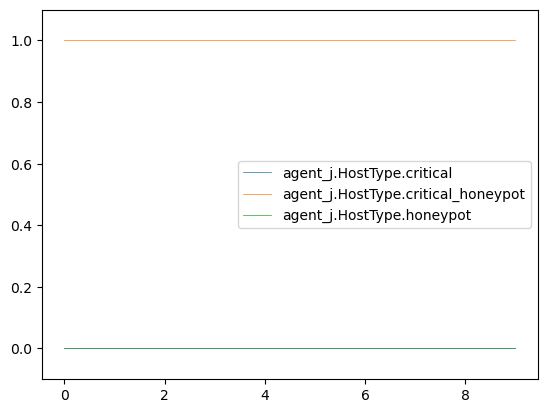

=============AttActive============


state.AttActive.no  state.AttActive.yes    agent_i.action  agent_j.action
0                 0.0                  1.0      DecoyAccount             Nop
1                 0.0                  1.0  RestrictAccPrivs             Nop
2                 0.0                  1.0           LogIOCs             Nop
3                 0.0                  1.0           LogIOCs       FileRecon
4                 0.0                  1.0           LogIOCs    EnumAccounts
5                 0.0                  1.0           LogIOCs    EnumAccounts
6                 0.0                  1.0           LogIOCs      PrivEscAcc
7                 0.0                  1.0               Nop       FileRecon
8                 0.0                  1.0               Nop  ManipulateData
9                 0.0                  1.0               Nop            Exit

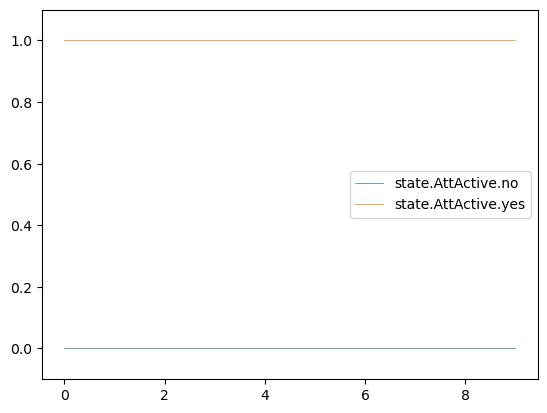

agent_i.AttActive.no  agent_i.AttActive.yes    agent_i.action  \
0              0.000000               1.000000      DecoyAccount   
1              0.000000               1.000000  RestrictAccPrivs   
2              0.000000               1.000000           LogIOCs   
3              0.000000               1.000000           LogIOCs   
4              0.005182               0.994818           LogIOCs   
5              0.020492               0.979508           LogIOCs   
6              0.010561               0.989439           LogIOCs   
7              0.177840               0.822160               Nop   
8              0.473556               0.526444               Nop   
9              0.239363               0.760637               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0             Nop                             none  
1             Nop                             none  
2             Nop                        file_enum  
3       FileRecon                             none  
4    EnumAccounts                        file_enum  
5    EnumAccounts                        file_enum  
6      PrivEscAcc                   login_activity  
7       FileRecon                        file_enum  
8  ManipulateData                       file_write  
9            Exit                       file_write

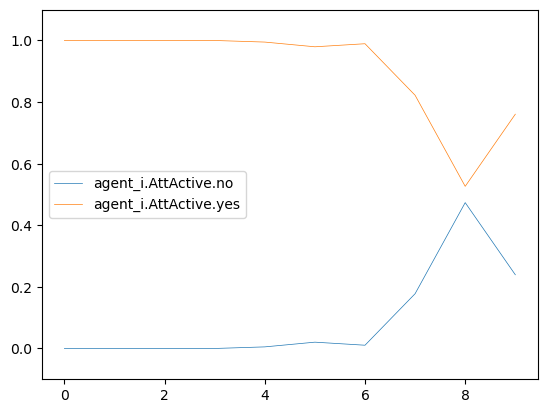

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action  \
0                   0.0                    1.0             Nop   
1                   0.0                    1.0             Nop   
2                   0.0                    1.0             Nop   
3                   0.0                    1.0       FileRecon   
4                   0.0                    1.0    EnumAccounts   
5                   0.0                    1.0    EnumAccounts   
6                   0.0                    1.0      PrivEscAcc   
7                   0.0                    1.0       FileRecon   
8                   0.0                    1.0  ManipulateData   
9                   0.0                    1.0            Exit   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                            auth   
2           LogIOCs                          denied   
3           LogIOCs                          denied   
4           LogIOCs                          denied   
5           LogIOCs                          denied   
6           LogIOCs                            auth   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           failure   
2                         none                           failure   
3                   user_files                           failure   
4                         none                           failure   
5                         none                           success   
6                   user_files                           success   
7                         none                           success   
8                   user_files                           success   
9                   user_files                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                          active                            none  
6                          active                    perms_change  
7                          active                            none  
8                          active                            none  
9                      terminated                            none

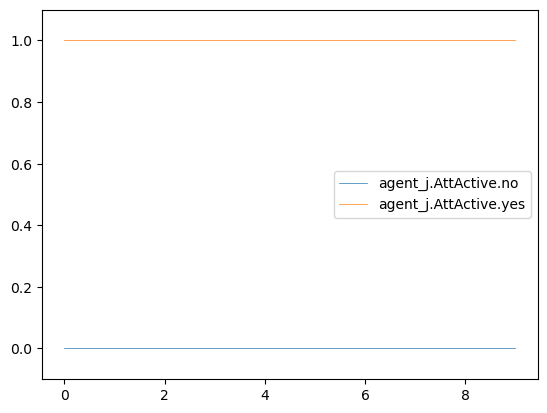

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user    agent_i.action  \
0                     0.0                     1.0      DecoyAccount   
1                     0.0                     1.0  RestrictAccPrivs   
2                     0.0                     1.0           LogIOCs   
3                     0.0                     1.0           LogIOCs   
4                     0.0                     1.0           LogIOCs   
5                     0.0                     1.0           LogIOCs   
6                     0.0                     1.0           LogIOCs   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action  
0             Nop  
1             Nop  
2             Nop  
3       FileRecon  
4    EnumAccounts  
5    EnumAccounts  
6      PrivEscAcc  
7       FileRecon  
8  ManipulateData  
9            Exit

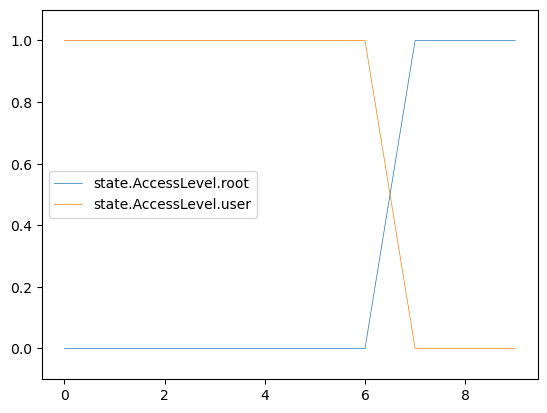

agent_i.AccessLevel.root  agent_i.AccessLevel.user    agent_i.action  \
0                  0.000000                  1.000000      DecoyAccount   
1                  0.000000                  1.000000  RestrictAccPrivs   
2                  0.000000                  1.000000           LogIOCs   
3                  0.000737                  0.999262           LogIOCs   
4                  0.567479                  0.432521           LogIOCs   
5                  0.912949                  0.087051           LogIOCs   
6                  0.970855                  0.029145           LogIOCs   
7                  0.977824                  0.022176               Nop   
8                  0.976043                  0.023957               Nop   
9                  0.993695                  0.006306               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0             Nop                             none  
1             Nop                             none  
2             Nop                        file_enum  
3       FileRecon                             none  
4    EnumAccounts                        file_enum  
5    EnumAccounts                        file_enum  
6      PrivEscAcc                   login_activity  
7       FileRecon                        file_enum  
8  ManipulateData                       file_write  
9            Exit                       file_write

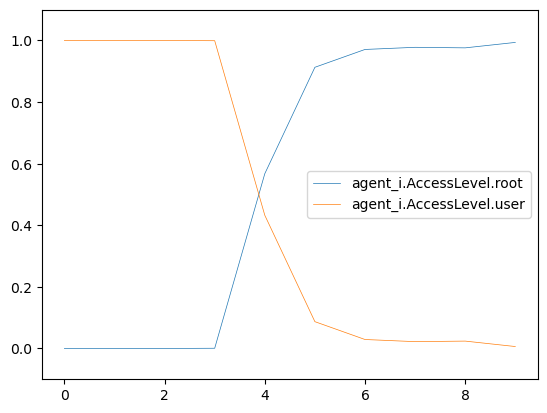

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                       0.0                       1.0             Nop   
1                       0.0                       1.0             Nop   
2                       0.0                       1.0             Nop   
3                       0.0                       1.0       FileRecon   
4                       0.0                       1.0    EnumAccounts   
5                       0.0                       1.0    EnumAccounts   
6                       0.0                       1.0      PrivEscAcc   
7                       1.0                       0.0       FileRecon   
8                       1.0                       0.0  ManipulateData   
9                       1.0                       0.0            Exit   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                            auth   
2           LogIOCs                          denied   
3           LogIOCs                          denied   
4           LogIOCs                          denied   
5           LogIOCs                          denied   
6           LogIOCs                            auth   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           failure   
2                         none                           failure   
3                   user_files                           failure   
4                         none                           failure   
5                         none                           success   
6                   user_files                           success   
7                         none                           success   
8                   user_files                           success   
9                   user_files                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                          active                            none  
6                          active                    perms_change  
7                          active                            none  
8                          active                            none  
9                      terminated                            none

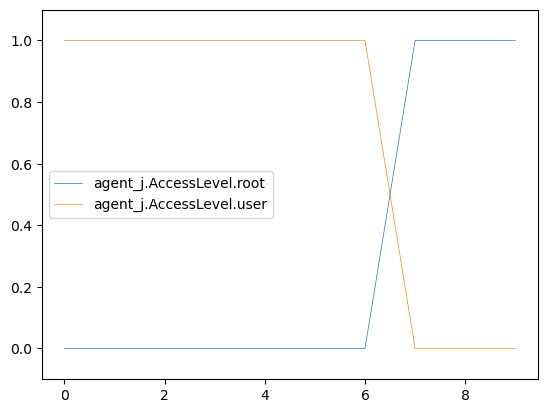

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes    agent_i.action  \
0                    1.0                     0.0      DecoyAccount   
1                    1.0                     0.0  RestrictAccPrivs   
2                    1.0                     0.0           LogIOCs   
3                    1.0                     0.0           LogIOCs   
4                    1.0                     0.0           LogIOCs   
5                    1.0                     0.0           LogIOCs   
6                    1.0                     0.0           LogIOCs   
7                    1.0                     0.0               Nop   
8                    1.0                     0.0               Nop   
9                    0.0                     1.0               Nop   

   agent_j.action  
0             Nop  
1             Nop  
2             Nop  
3       FileRecon  
4    EnumAccounts  
5    EnumAccounts  
6      PrivEscAcc  
7       FileRecon  
8  ManipulateData  
9            Exit

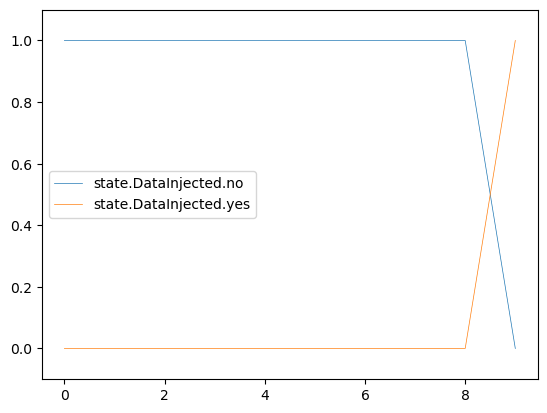

agent_i.DataInjected.no  agent_i.DataInjected.yes    agent_i.action  \
0                 1.000000                  0.000000      DecoyAccount   
1                 1.000000                  0.000000  RestrictAccPrivs   
2                 1.000000                  0.000000           LogIOCs   
3                 1.000000                  0.000000           LogIOCs   
4                 1.000000                  0.000000           LogIOCs   
5                 0.999907                  0.000093           LogIOCs   
6                 0.826796                  0.173204           LogIOCs   
7                 0.329807                  0.670193               Nop   
8                 0.453937                  0.546063               Nop   
9                 0.086425                  0.913575               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0             Nop                             none  
1             Nop                             none  
2             Nop                        file_enum  
3       FileRecon                             none  
4    EnumAccounts                        file_enum  
5    EnumAccounts                        file_enum  
6      PrivEscAcc                   login_activity  
7       FileRecon                        file_enum  
8  ManipulateData                       file_write  
9            Exit                       file_write

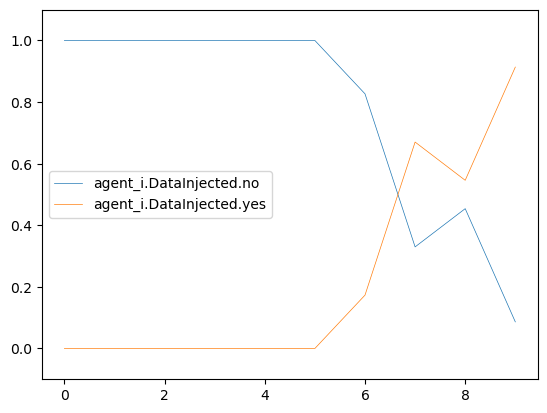

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                  1.00000                   0.00000             Nop   
1                  1.00000                   0.00000             Nop   
2                  1.00000                   0.00000             Nop   
3                  1.00000                   0.00000       FileRecon   
4                  1.00000                   0.00000    EnumAccounts   
5                  1.00000                   0.00000    EnumAccounts   
6                  1.00000                   0.00000      PrivEscAcc   
7                  1.00000                   0.00000       FileRecon   
8                  1.00000                   0.00000  ManipulateData   
9                  0.00007                   0.99993            Exit   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                            auth   
2           LogIOCs                          denied   
3           LogIOCs                          denied   
4           LogIOCs                          denied   
5           LogIOCs                          denied   
6           LogIOCs                            auth   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           failure   
2                         none                           failure   
3                   user_files                           failure   
4                         none                           failure   
5                         none                           success   
6                   user_files                           success   
7                         none                           success   
8                   user_files                           success   
9                   user_files                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                          active                            none  
6                          active                    perms_change  
7                          active                            none  
8                          active                            none  
9                      terminated                            none

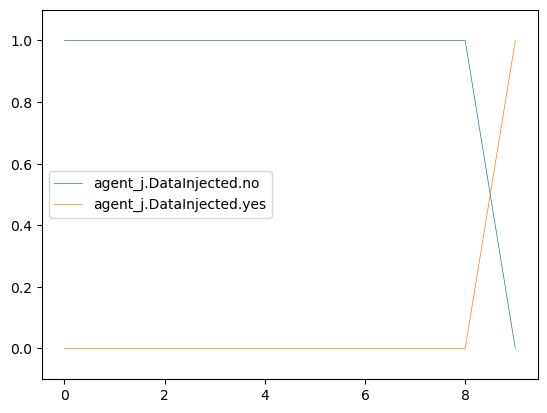

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user    agent_i.action  \
0                   0.0                   1.0      DecoyAccount   
1                   0.0                   1.0  RestrictAccPrivs   
2                   1.0                   0.0           LogIOCs   
3                   1.0                   0.0           LogIOCs   
4                   1.0                   0.0           LogIOCs   
5                   1.0                   0.0           LogIOCs   
6                   1.0                   0.0           LogIOCs   
7                   1.0                   0.0               Nop   
8                   1.0                   0.0               Nop   
9                   1.0                   0.0               Nop   

   agent_j.action  
0             Nop  
1             Nop  
2             Nop  
3       FileRecon  
4    EnumAccounts  
5    EnumAccounts  
6      PrivEscAcc  
7       FileRecon  
8  ManipulateData  
9            Exit

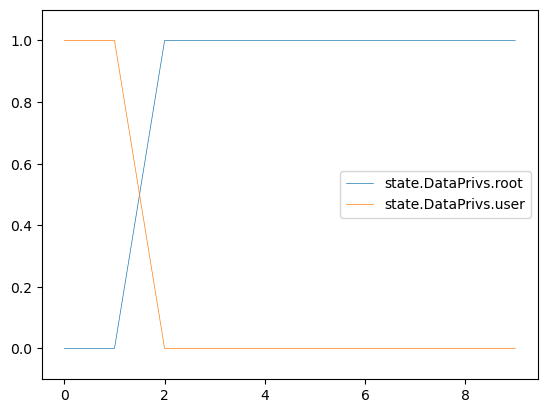

agent_i.DataPrivs.root  agent_i.DataPrivs.user    agent_i.action  \
0                     0.0                     1.0      DecoyAccount   
1                     0.0                     1.0  RestrictAccPrivs   
2                     1.0                     0.0           LogIOCs   
3                     1.0                     0.0           LogIOCs   
4                     1.0                     0.0           LogIOCs   
5                     1.0                     0.0           LogIOCs   
6                     1.0                     0.0           LogIOCs   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0             Nop                             none  
1             Nop                             none  
2             Nop                        file_enum  
3       FileRecon                             none  
4    EnumAccounts                        file_enum  
5    EnumAccounts                        file_enum  
6      PrivEscAcc                   login_activity  
7       FileRecon                        file_enum  
8  ManipulateData                       file_write  
9            Exit                       file_write

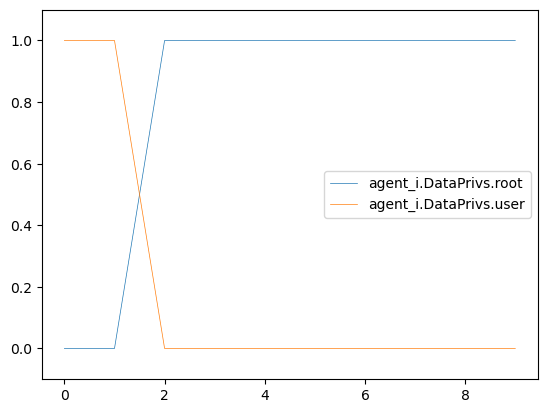

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000             Nop   
1                0.571429                0.428571             Nop   
2                0.571429                0.428571             Nop   
3                0.551247                0.448754       FileRecon   
4                0.653949                0.346051    EnumAccounts   
5                0.653949                0.346051    EnumAccounts   
6                0.653949                0.346051      PrivEscAcc   
7                0.653949                0.346051       FileRecon   
8                0.778070                0.221930  ManipulateData   
9                0.803693                0.196306            Exit   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                            auth   
2           LogIOCs                          denied   
3           LogIOCs                          denied   
4           LogIOCs                          denied   
5           LogIOCs                          denied   
6           LogIOCs                            auth   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           failure   
2                         none                           failure   
3                   user_files                           failure   
4                         none                           failure   
5                         none                           success   
6                   user_files                           success   
7                         none                           success   
8                   user_files                           success   
9                   user_files                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                          active                            none  
6                          active                    perms_change  
7                          active                            none  
8                          active                            none  
9                      terminated                            none

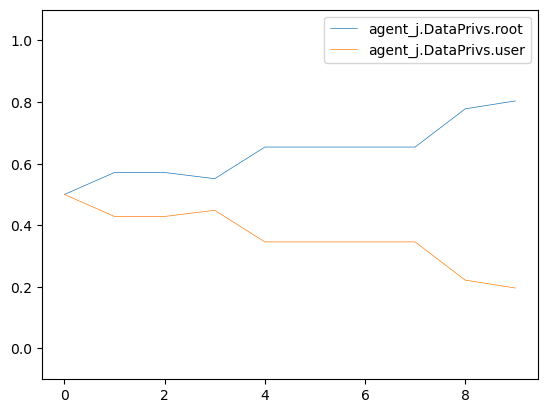

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes    agent_i.action  \
0                   0.0                    1.0      DecoyAccount   
1                   0.0                    1.0  RestrictAccPrivs   
2                   0.0                    1.0           LogIOCs   
3                   0.0                    1.0           LogIOCs   
4                   0.0                    1.0           LogIOCs   
5                   0.0                    1.0           LogIOCs   
6                   0.0                    1.0           LogIOCs   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0             Nop  
1             Nop  
2             Nop  
3       FileRecon  
4    EnumAccounts  
5    EnumAccounts  
6      PrivEscAcc  
7       FileRecon  
8  ManipulateData  
9            Exit

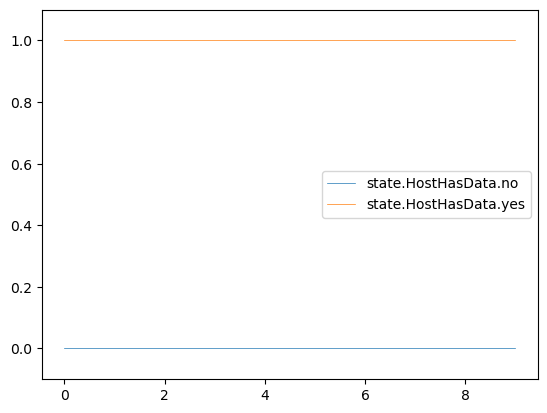

agent_i.HostHasData.no  agent_i.HostHasData.yes    agent_i.action  \
0                     0.0                      1.0      DecoyAccount   
1                     0.0                      1.0  RestrictAccPrivs   
2                     0.0                      1.0           LogIOCs   
3                     0.0                      1.0           LogIOCs   
4                     0.0                      1.0           LogIOCs   
5                     0.0                      1.0           LogIOCs   
6                     0.0                      1.0           LogIOCs   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0             Nop                             none  
1             Nop                             none  
2             Nop                        file_enum  
3       FileRecon                             none  
4    EnumAccounts                        file_enum  
5    EnumAccounts                        file_enum  
6      PrivEscAcc                   login_activity  
7       FileRecon                        file_enum  
8  ManipulateData                       file_write  
9            Exit                       file_write

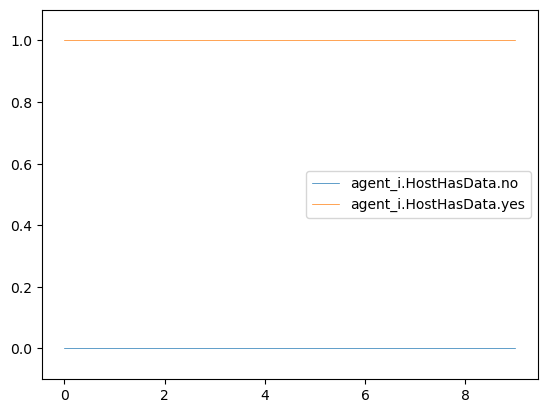

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000             Nop   
1                0.500000                 0.500000             Nop   
2                0.500000                 0.500000             Nop   
3                0.500000                 0.500000       FileRecon   
4                0.593168                 0.406832    EnumAccounts   
5                0.593168                 0.406832    EnumAccounts   
6                0.593168                 0.406832      PrivEscAcc   
7                0.593168                 0.406832       FileRecon   
8                0.101547                 0.898453  ManipulateData   
9                0.000058                 0.999942            Exit   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                            auth   
2           LogIOCs                          denied   
3           LogIOCs                          denied   
4           LogIOCs                          denied   
5           LogIOCs                          denied   
6           LogIOCs                            auth   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           failure   
2                         none                           failure   
3                   user_files                           failure   
4                         none                           failure   
5                         none                           success   
6                   user_files                           success   
7                         none                           success   
8                   user_files                           success   
9                   user_files                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                          active                            none  
6                          active                    perms_change  
7                          active                            none  
8                          active                            none  
9                      terminated                            none

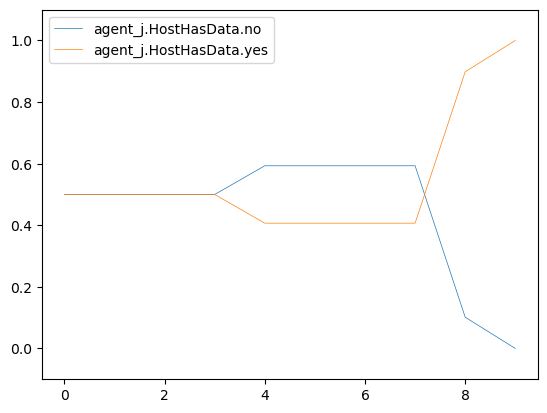

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                             none
1                               1.0                             none
2                               1.0                   login_activity
3                               1.0                       file_write
4                               1.0                        file_enum
5                               1.0                             none
6                               1.0                             none
7                               1.0                       file_write
8                               1.0                             none
9                               1.0                             none

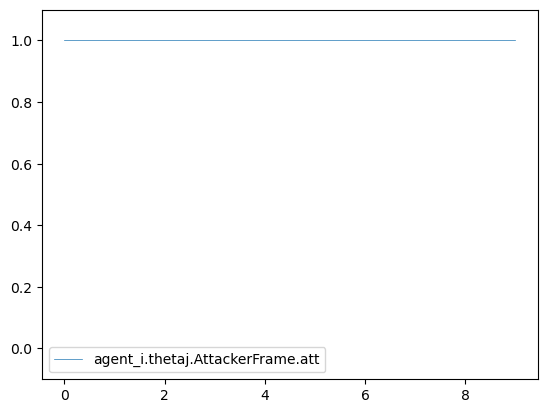

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.904762                        0.095238   
2                         0.904762                        0.095238   
3                         0.900277                        0.099723   
4                         0.886399                        0.113601   
5                         0.886400                        0.113601   
6                         0.886400                        0.113601   
7                         0.875170                        0.124830   
8                         0.873062                        0.126938   
9                         0.873062                        0.126938   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                   user_files   
1                          denied                   user_files   
2                            auth                   user_files   
3                            auth                         none   
4                          denied                   user_files   
5                            auth                         none   
6                            auth                         none   
7                            auth                         none   
8                            auth                         none   
9                          denied                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           success                          active   
1                           failure                          active   
2                           failure                          active   
3                           failure                          active   
4                           success                          active   
5                           success                          active   
6                           success                          active   
7                           success                          active   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                    perms_change  
2                            none  
3                    perms_change  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

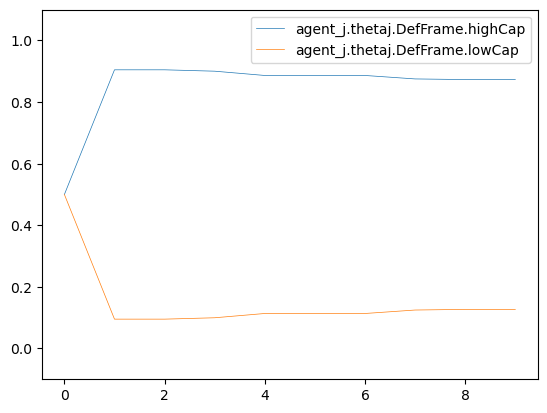

=============DataFound============


state.DataFound.no  state.DataFound.yes    agent_i.action  agent_j.action
0                 1.0                  0.0      DecoyAccount             Nop
1                 1.0                  0.0  RestrictAccPrivs             Nop
2                 1.0                  0.0           LogIOCs             Nop
3                 1.0                  0.0           LogIOCs       FileRecon
4                 1.0                  0.0           LogIOCs    EnumAccounts
5                 1.0                  0.0           LogIOCs      PrivEscAcc
6                 1.0                  0.0               Nop       FileRecon
7                 0.0                  1.0               Nop  ManipulateData
8                 0.0                  1.0               Nop            Exit
9                 0.0                  1.0               Nop             Nop

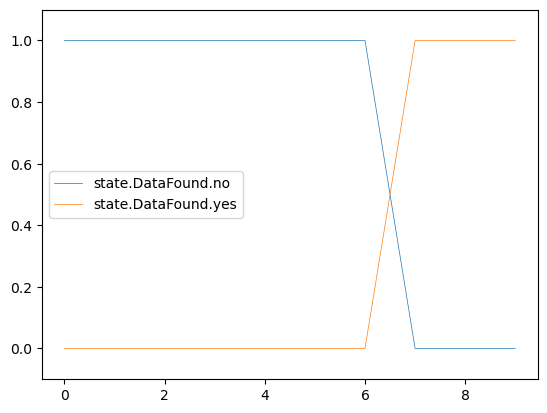

agent_i.DataFound.no  agent_i.DataFound.yes    agent_i.action  \
0              1.000000               0.000000      DecoyAccount   
1              1.000000               0.000000  RestrictAccPrivs   
2              1.000000               0.000000           LogIOCs   
3              1.000000               0.000000           LogIOCs   
4              0.977624               0.022376           LogIOCs   
5              0.390094               0.609906           LogIOCs   
6              0.368264               0.631736               Nop   
7              0.363360               0.636640               Nop   
8              0.332279               0.667721               Nop   
9              0.325297               0.674703               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0             Nop                             none  
1             Nop                             none  
2             Nop                   login_activity  
3       FileRecon                       file_write  
4    EnumAccounts                        file_enum  
5      PrivEscAcc                             none  
6       FileRecon                             none  
7  ManipulateData                       file_write  
8            Exit                             none  
9             Nop                             none

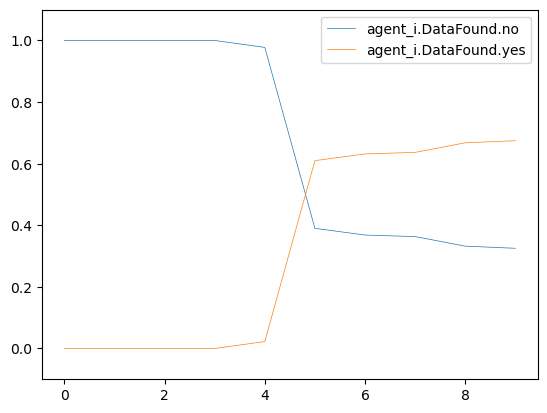

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action  \
0              1.000000               0.000000             Nop   
1              1.000000               0.000000             Nop   
2              1.000000               0.000000             Nop   
3              1.000000               0.000000       FileRecon   
4              0.960240               0.039760    EnumAccounts   
5              0.960240               0.039760      PrivEscAcc   
6              0.960240               0.039760       FileRecon   
7              0.108585               0.891414  ManipulateData   
8              0.000061               0.999939            Exit   
9              0.000061               0.999939             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2           LogIOCs                            auth   
3           LogIOCs                            auth   
4           LogIOCs                          denied   
5           LogIOCs                            auth   
6               Nop                            auth   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           success   
1                   user_files                           failure   
2                   user_files                           failure   
3                         none                           failure   
4                   user_files                           success   
5                         none                           success   
6                         none                           success   
7                         none                           success   
8                         none                           failure   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                    perms_change  
4                          active                            none  
5                          active                            none  
6                          active                            none  
7                          active                            none  
8                      terminated                            none  
9                      terminated                            none

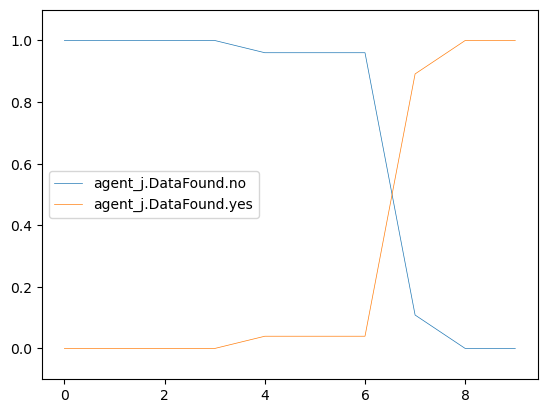

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes    agent_i.action  \
0                   1.0                    0.0      DecoyAccount   
1                   0.0                    1.0  RestrictAccPrivs   
2                   0.0                    1.0           LogIOCs   
3                   0.0                    1.0           LogIOCs   
4                   0.0                    1.0           LogIOCs   
5                   0.0                    1.0           LogIOCs   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0             Nop  
1             Nop  
2             Nop  
3       FileRecon  
4    EnumAccounts  
5      PrivEscAcc  
6       FileRecon  
7  ManipulateData  
8            Exit  
9             Nop

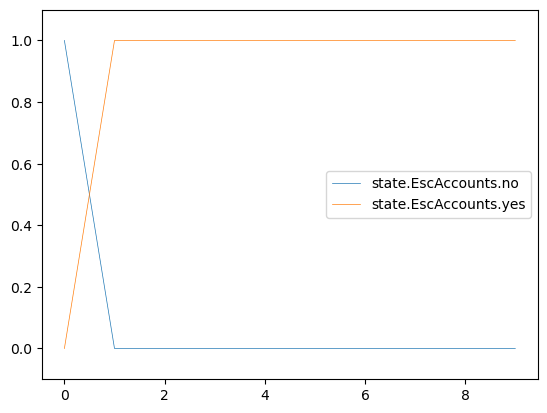

agent_i.EscAccounts.no  agent_i.EscAccounts.yes    agent_i.action  \
0                     1.0                      0.0      DecoyAccount   
1                     0.0                      1.0  RestrictAccPrivs   
2                     0.0                      1.0           LogIOCs   
3                     0.0                      1.0           LogIOCs   
4                     0.0                      1.0           LogIOCs   
5                     0.0                      1.0           LogIOCs   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0             Nop                             none  
1             Nop                             none  
2             Nop                   login_activity  
3       FileRecon                       file_write  
4    EnumAccounts                        file_enum  
5      PrivEscAcc                             none  
6       FileRecon                             none  
7  ManipulateData                       file_write  
8            Exit                             none  
9             Nop                             none

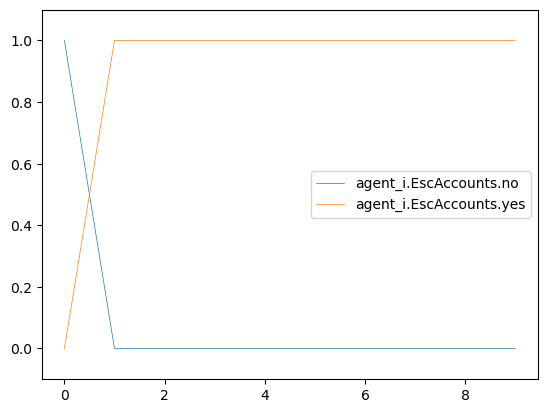

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                0.500000                 0.500000             Nop   
1                0.500000                 0.500000             Nop   
2                0.500000                 0.500000             Nop   
3                0.500000                 0.500000       FileRecon   
4                0.500000                 0.500000    EnumAccounts   
5                0.131579                 0.868421      PrivEscAcc   
6                0.000000                 1.000000       FileRecon   
7                0.000000                 1.000000  ManipulateData   
8                0.000000                 1.000000            Exit   
9                0.000000                 1.000000             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2           LogIOCs                            auth   
3           LogIOCs                            auth   
4           LogIOCs                          denied   
5           LogIOCs                            auth   
6               Nop                            auth   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           success   
1                   user_files                           failure   
2                   user_files                           failure   
3                         none                           failure   
4                   user_files                           success   
5                         none                           success   
6                         none                           success   
7                         none                           success   
8                         none                           failure   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                    perms_change  
4                          active                            none  
5                          active                            none  
6                          active                            none  
7                          active                            none  
8                      terminated                            none  
9                      terminated                            none

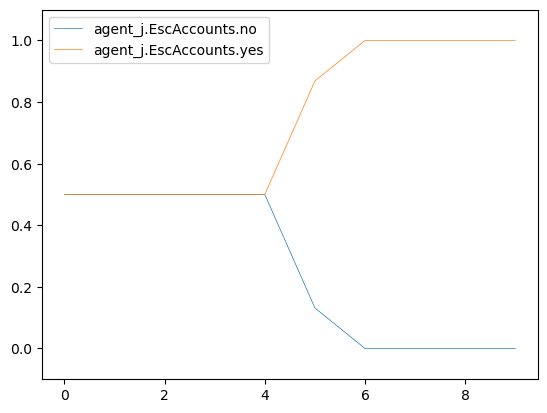

=============AccFound============


state.AccFound.no  state.AccFound.yes    agent_i.action  agent_j.action
0                1.0                 0.0      DecoyAccount             Nop
1                1.0                 0.0  RestrictAccPrivs             Nop
2                1.0                 0.0           LogIOCs             Nop
3                1.0                 0.0           LogIOCs       FileRecon
4                1.0                 0.0           LogIOCs    EnumAccounts
5                0.0                 1.0           LogIOCs      PrivEscAcc
6                0.0                 1.0               Nop       FileRecon
7                0.0                 1.0               Nop  ManipulateData
8                0.0                 1.0               Nop            Exit
9                0.0                 1.0               Nop             Nop

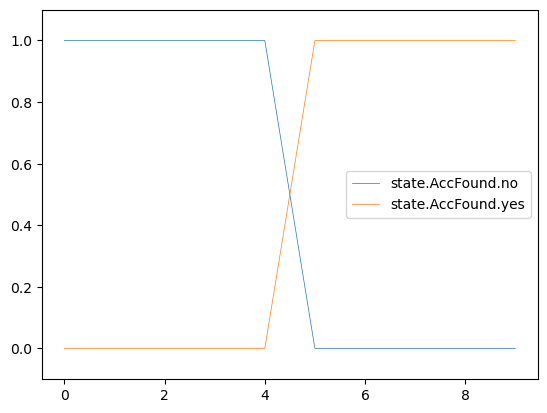

agent_i.AccFound.no  agent_i.AccFound.yes    agent_i.action  \
0             1.000000              0.000000      DecoyAccount   
1             1.000000              0.000000  RestrictAccPrivs   
2             0.994776              0.005224           LogIOCs   
3             0.358807              0.641193           LogIOCs   
4             0.190489              0.809511           LogIOCs   
5             0.049140              0.950860           LogIOCs   
6             0.227242              0.772758               Nop   
7             0.299349              0.700651               Nop   
8             0.270346              0.729654               Nop   
9             0.267330              0.732670               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0             Nop                             none  
1             Nop                             none  
2             Nop                   login_activity  
3       FileRecon                       file_write  
4    EnumAccounts                        file_enum  
5      PrivEscAcc                             none  
6       FileRecon                             none  
7  ManipulateData                       file_write  
8            Exit                             none  
9             Nop                             none

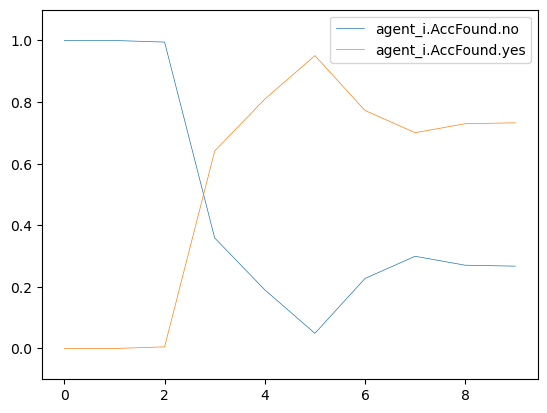

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action  \
0             1.000000              0.000000             Nop   
1             1.000000              0.000000             Nop   
2             1.000000              0.000000             Nop   
3             1.000000              0.000000       FileRecon   
4             1.000000              0.000000    EnumAccounts   
5             0.171053              0.828947      PrivEscAcc   
6             0.000000              1.000000       FileRecon   
7             0.000000              1.000000  ManipulateData   
8             0.000000              1.000000            Exit   
9             0.000000              1.000000             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2           LogIOCs                            auth   
3           LogIOCs                            auth   
4           LogIOCs                          denied   
5           LogIOCs                            auth   
6               Nop                            auth   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           success   
1                   user_files                           failure   
2                   user_files                           failure   
3                         none                           failure   
4                   user_files                           success   
5                         none                           success   
6                         none                           success   
7                         none                           success   
8                         none                           failure   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                    perms_change  
4                          active                            none  
5                          active                            none  
6                          active                            none  
7                          active                            none  
8                      terminated                            none  
9                      terminated                            none

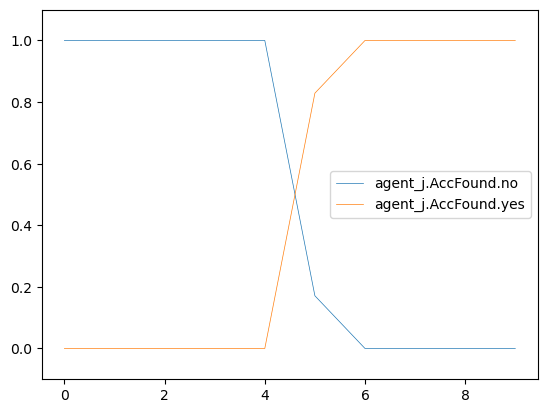

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot    agent_i.action  agent_j.action  
0                      1.0      DecoyAccount             Nop  
1                      1.0  RestrictAccPrivs             Nop  
2                      1.0           LogIOCs             Nop  
3                      1.0           LogIOCs       FileRecon  
4                      1.0           LogIOCs    EnumAccounts  
5                      1.0           LogIOCs      PrivEscAcc  
6                      1.0               Nop       FileRecon  
7                      1.0               Nop  ManipulateData  
8                      1.0               Nop            Exit  
9                      1.0               Nop             Nop

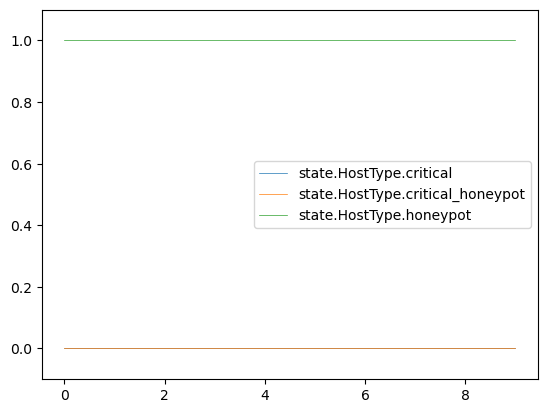

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot    agent_i.action  agent_j.action  \
0                        1.0      DecoyAccount             Nop   
1                        1.0  RestrictAccPrivs             Nop   
2                        1.0           LogIOCs             Nop   
3                        1.0           LogIOCs       FileRecon   
4                        1.0           LogIOCs    EnumAccounts   
5                        1.0           LogIOCs      PrivEscAcc   
6                        1.0               Nop       FileRecon   
7                        1.0               Nop  ManipulateData   
8                        1.0               Nop            Exit   
9                        1.0               Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                             none  
1                             none  
2                   login_activity  
3                       file_write  
4                        file_enum  
5                             none  
6                             none  
7                       file_write  
8                             none  
9                             none

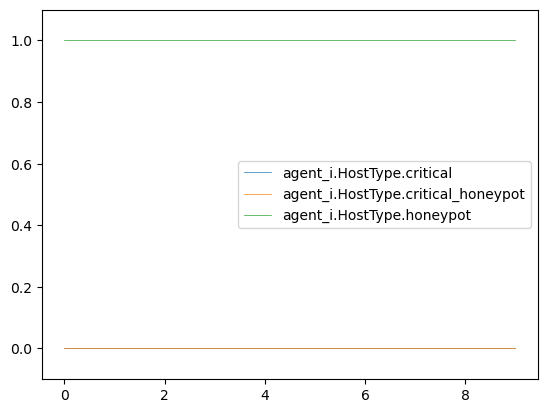

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot  agent_j.action    agent_i.action  \
0                        0.0             Nop      DecoyAccount   
1                        0.0             Nop  RestrictAccPrivs   
2                        0.0             Nop           LogIOCs   
3                        0.0       FileRecon           LogIOCs   
4                        0.0    EnumAccounts           LogIOCs   
5                        0.0      PrivEscAcc           LogIOCs   
6                        0.0       FileRecon               Nop   
7                        0.0  ManipulateData               Nop   
8                        0.0            Exit               Nop   
9                        0.0             Nop               Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                   user_files   
1                          denied                   user_files   
2                            auth                   user_files   
3                            auth                         none   
4                          denied                   user_files   
5                            auth                         none   
6                            auth                         none   
7                            auth                         none   
8                            auth                         none   
9                          denied                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           success                          active   
1                           failure                          active   
2                           failure                          active   
3                           failure                          active   
4                           success                          active   
5                           success                          active   
6                           success                          active   
7                           success                          active   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                    perms_change  
2                            none  
3                    perms_change  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

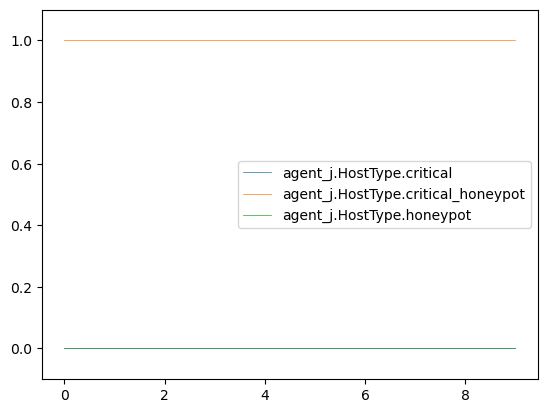

=============AttActive============


state.AttActive.no  state.AttActive.yes    agent_i.action  agent_j.action
0                 0.0                  1.0      DecoyAccount             Nop
1                 0.0                  1.0  RestrictAccPrivs             Nop
2                 0.0                  1.0           LogIOCs             Nop
3                 0.0                  1.0           LogIOCs       FileRecon
4                 0.0                  1.0           LogIOCs    EnumAccounts
5                 0.0                  1.0           LogIOCs      PrivEscAcc
6                 0.0                  1.0               Nop       FileRecon
7                 0.0                  1.0               Nop  ManipulateData
8                 0.0                  1.0               Nop            Exit
9                 1.0                  0.0               Nop             Nop

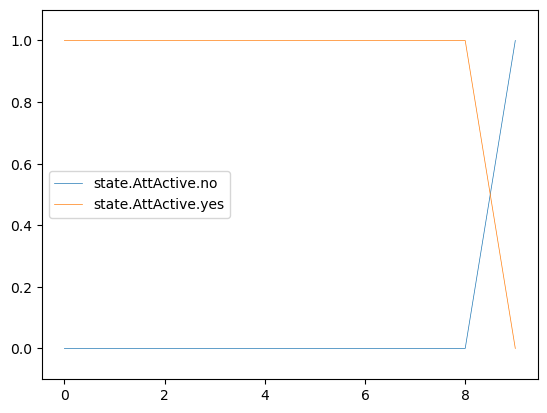

agent_i.AttActive.no  agent_i.AttActive.yes    agent_i.action  \
0              0.000000               1.000000      DecoyAccount   
1              0.000000               1.000000  RestrictAccPrivs   
2              0.000000               1.000000           LogIOCs   
3              0.000000               1.000000           LogIOCs   
4              0.000716               0.999284           LogIOCs   
5              0.019155               0.980845           LogIOCs   
6              0.193308               0.806692               Nop   
7              0.817991               0.182009               Nop   
8              0.784723               0.215277               Nop   
9              0.894173               0.105827               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0             Nop                             none  
1             Nop                             none  
2             Nop                   login_activity  
3       FileRecon                       file_write  
4    EnumAccounts                        file_enum  
5      PrivEscAcc                             none  
6       FileRecon                             none  
7  ManipulateData                       file_write  
8            Exit                             none  
9             Nop                             none

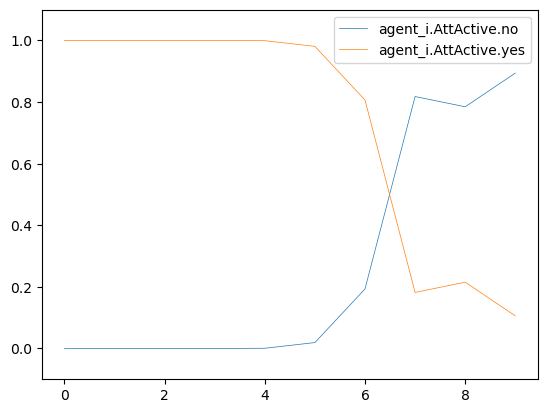

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action  \
0                   0.0                    1.0             Nop   
1                   0.0                    1.0             Nop   
2                   0.0                    1.0             Nop   
3                   0.0                    1.0       FileRecon   
4                   0.0                    1.0    EnumAccounts   
5                   0.0                    1.0      PrivEscAcc   
6                   0.0                    1.0       FileRecon   
7                   0.0                    1.0  ManipulateData   
8                   0.0                    1.0            Exit   
9                   1.0                    0.0             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2           LogIOCs                            auth   
3           LogIOCs                            auth   
4           LogIOCs                          denied   
5           LogIOCs                            auth   
6               Nop                            auth   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           success   
1                   user_files                           failure   
2                   user_files                           failure   
3                         none                           failure   
4                   user_files                           success   
5                         none                           success   
6                         none                           success   
7                         none                           success   
8                         none                           failure   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                    perms_change  
4                          active                            none  
5                          active                            none  
6                          active                            none  
7                          active                            none  
8                      terminated                            none  
9                      terminated                            none

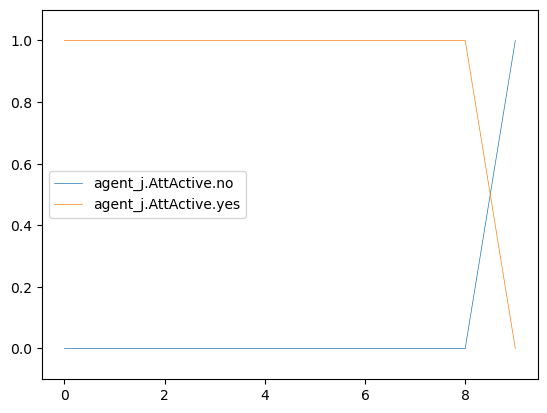

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user    agent_i.action  \
0                     0.0                     1.0      DecoyAccount   
1                     0.0                     1.0  RestrictAccPrivs   
2                     0.0                     1.0           LogIOCs   
3                     0.0                     1.0           LogIOCs   
4                     0.0                     1.0           LogIOCs   
5                     0.0                     1.0           LogIOCs   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action  
0             Nop  
1             Nop  
2             Nop  
3       FileRecon  
4    EnumAccounts  
5      PrivEscAcc  
6       FileRecon  
7  ManipulateData  
8            Exit  
9             Nop

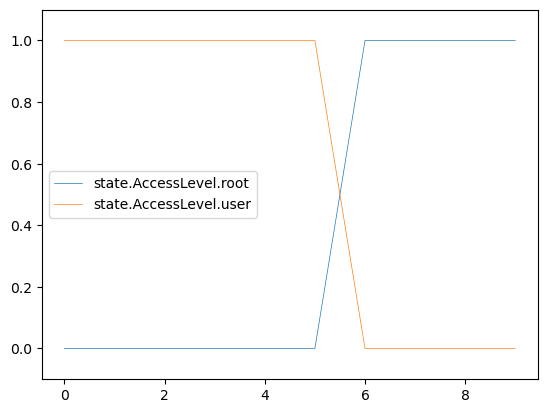

agent_i.AccessLevel.root  agent_i.AccessLevel.user    agent_i.action  \
0                  0.000000                  1.000000      DecoyAccount   
1                  0.000000                  1.000000  RestrictAccPrivs   
2                  0.000000                  1.000000           LogIOCs   
3                  0.031966                  0.968034           LogIOCs   
4                  0.580270                  0.419730           LogIOCs   
5                  0.913455                  0.086545           LogIOCs   
6                  0.728941                  0.271059               Nop   
7                  0.644234                  0.355766               Nop   
8                  0.674469                  0.325531               Nop   
9                  0.680168                  0.319832               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0             Nop                             none  
1             Nop                             none  
2             Nop                   login_activity  
3       FileRecon                       file_write  
4    EnumAccounts                        file_enum  
5      PrivEscAcc                             none  
6       FileRecon                             none  
7  ManipulateData                       file_write  
8            Exit                             none  
9             Nop                             none

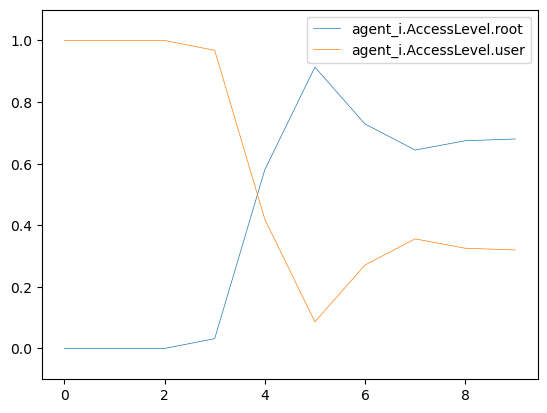

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                       0.0                       1.0             Nop   
1                       0.0                       1.0             Nop   
2                       0.0                       1.0             Nop   
3                       0.0                       1.0       FileRecon   
4                       0.0                       1.0    EnumAccounts   
5                       0.0                       1.0      PrivEscAcc   
6                       1.0                       0.0       FileRecon   
7                       1.0                       0.0  ManipulateData   
8                       1.0                       0.0            Exit   
9                       1.0                       0.0             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2           LogIOCs                            auth   
3           LogIOCs                            auth   
4           LogIOCs                          denied   
5           LogIOCs                            auth   
6               Nop                            auth   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           success   
1                   user_files                           failure   
2                   user_files                           failure   
3                         none                           failure   
4                   user_files                           success   
5                         none                           success   
6                         none                           success   
7                         none                           success   
8                         none                           failure   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                    perms_change  
4                          active                            none  
5                          active                            none  
6                          active                            none  
7                          active                            none  
8                      terminated                            none  
9                      terminated                            none

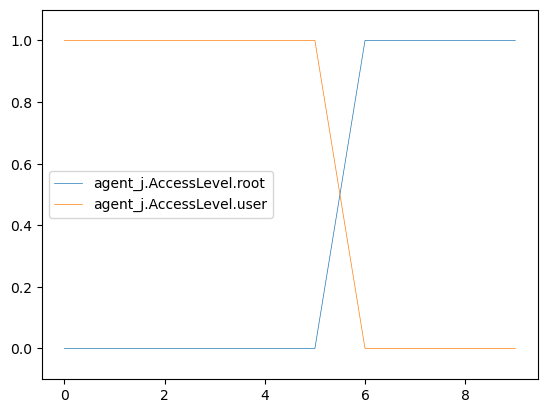

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes    agent_i.action  \
0                    1.0                     0.0      DecoyAccount   
1                    1.0                     0.0  RestrictAccPrivs   
2                    1.0                     0.0           LogIOCs   
3                    1.0                     0.0           LogIOCs   
4                    1.0                     0.0           LogIOCs   
5                    1.0                     0.0           LogIOCs   
6                    1.0                     0.0               Nop   
7                    1.0                     0.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

   agent_j.action  
0             Nop  
1             Nop  
2             Nop  
3       FileRecon  
4    EnumAccounts  
5      PrivEscAcc  
6       FileRecon  
7  ManipulateData  
8            Exit  
9             Nop

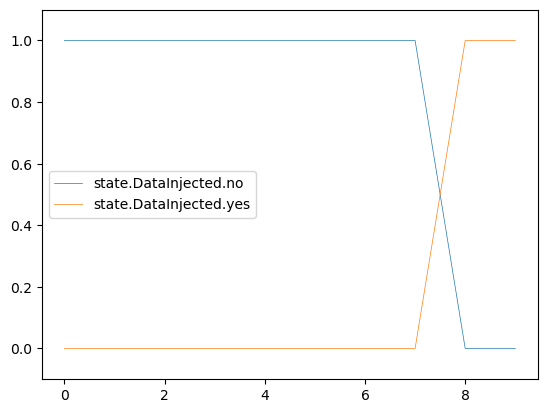

agent_i.DataInjected.no  agent_i.DataInjected.yes    agent_i.action  \
0                 1.000000                  0.000000      DecoyAccount   
1                 1.000000                  0.000000  RestrictAccPrivs   
2                 1.000000                  0.000000           LogIOCs   
3                 1.000000                  0.000000           LogIOCs   
4                 1.000000                  0.000000           LogIOCs   
5                 0.995561                  0.004439           LogIOCs   
6                 0.566819                  0.433182               Nop   
7                 0.380031                  0.619969               Nop   
8                 0.336416                  0.663584               Nop   
9                 0.326569                  0.673431               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0             Nop                             none  
1             Nop                             none  
2             Nop                   login_activity  
3       FileRecon                       file_write  
4    EnumAccounts                        file_enum  
5      PrivEscAcc                             none  
6       FileRecon                             none  
7  ManipulateData                       file_write  
8            Exit                             none  
9             Nop                             none

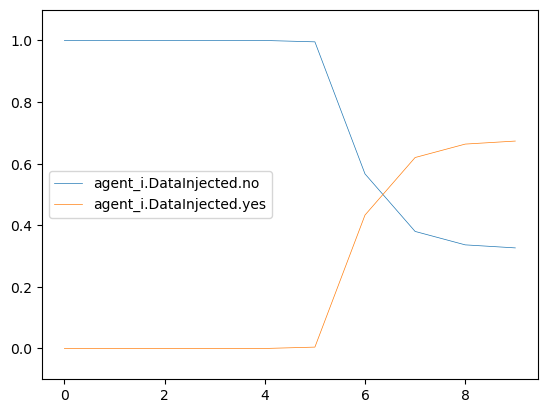

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000             Nop   
1                 1.000000                  0.000000             Nop   
2                 1.000000                  0.000000             Nop   
3                 1.000000                  0.000000       FileRecon   
4                 1.000000                  0.000000    EnumAccounts   
5                 1.000000                  0.000000      PrivEscAcc   
6                 1.000000                  0.000000       FileRecon   
7                 1.000000                  0.000000  ManipulateData   
8                 0.000061                  0.999939            Exit   
9                 0.000061                  0.999939             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2           LogIOCs                            auth   
3           LogIOCs                            auth   
4           LogIOCs                          denied   
5           LogIOCs                            auth   
6               Nop                            auth   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           success   
1                   user_files                           failure   
2                   user_files                           failure   
3                         none                           failure   
4                   user_files                           success   
5                         none                           success   
6                         none                           success   
7                         none                           success   
8                         none                           failure   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                    perms_change  
4                          active                            none  
5                          active                            none  
6                          active                            none  
7                          active                            none  
8                      terminated                            none  
9                      terminated                            none

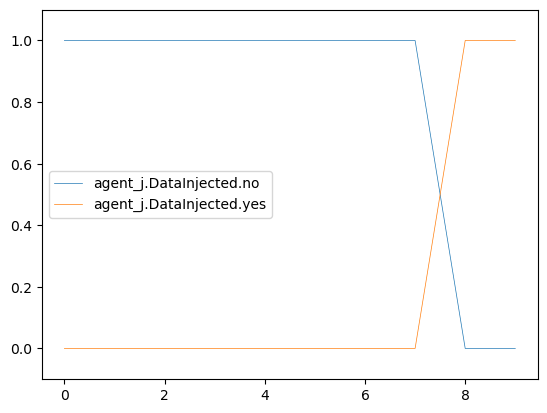

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user    agent_i.action  \
0                   0.0                   1.0      DecoyAccount   
1                   0.0                   1.0  RestrictAccPrivs   
2                   1.0                   0.0           LogIOCs   
3                   1.0                   0.0           LogIOCs   
4                   1.0                   0.0           LogIOCs   
5                   1.0                   0.0           LogIOCs   
6                   1.0                   0.0               Nop   
7                   1.0                   0.0               Nop   
8                   1.0                   0.0               Nop   
9                   1.0                   0.0               Nop   

   agent_j.action  
0             Nop  
1             Nop  
2             Nop  
3       FileRecon  
4    EnumAccounts  
5      PrivEscAcc  
6       FileRecon  
7  ManipulateData  
8            Exit  
9             Nop

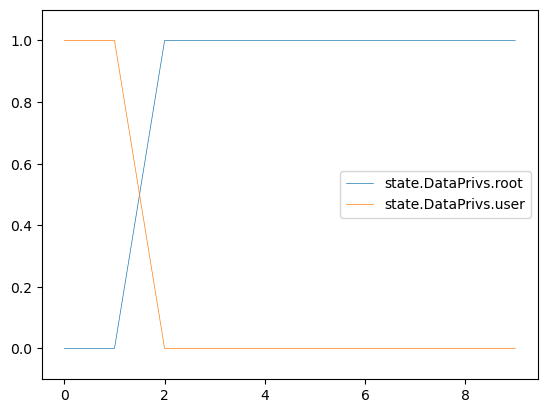

agent_i.DataPrivs.root  agent_i.DataPrivs.user    agent_i.action  \
0                     0.0                     1.0      DecoyAccount   
1                     0.0                     1.0  RestrictAccPrivs   
2                     1.0                     0.0           LogIOCs   
3                     1.0                     0.0           LogIOCs   
4                     1.0                     0.0           LogIOCs   
5                     1.0                     0.0           LogIOCs   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0             Nop                             none  
1             Nop                             none  
2             Nop                   login_activity  
3       FileRecon                       file_write  
4    EnumAccounts                        file_enum  
5      PrivEscAcc                             none  
6       FileRecon                             none  
7  ManipulateData                       file_write  
8            Exit                             none  
9             Nop                             none

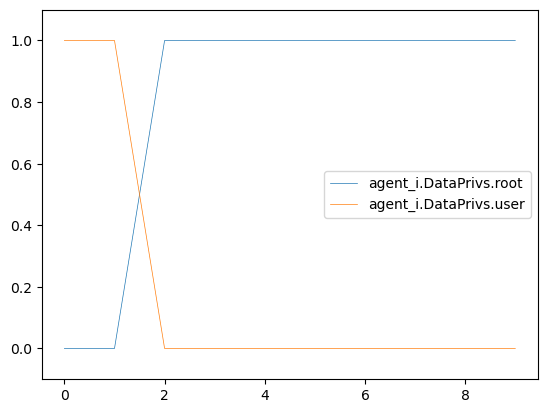

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000             Nop   
1                0.571429                0.428571             Nop   
2                0.571429                0.428571             Nop   
3                0.551247                0.448754       FileRecon   
4                0.627958                0.372042    EnumAccounts   
5                0.627958                0.372042      PrivEscAcc   
6                0.627958                0.372042       FileRecon   
7                0.690034                0.309965  ManipulateData   
8                0.701686                0.298314            Exit   
9                0.701686                0.298314             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2           LogIOCs                            auth   
3           LogIOCs                            auth   
4           LogIOCs                          denied   
5           LogIOCs                            auth   
6               Nop                            auth   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           success   
1                   user_files                           failure   
2                   user_files                           failure   
3                         none                           failure   
4                   user_files                           success   
5                         none                           success   
6                         none                           success   
7                         none                           success   
8                         none                           failure   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                    perms_change  
4                          active                            none  
5                          active                            none  
6                          active                            none  
7                          active                            none  
8                      terminated                            none  
9                      terminated                            none

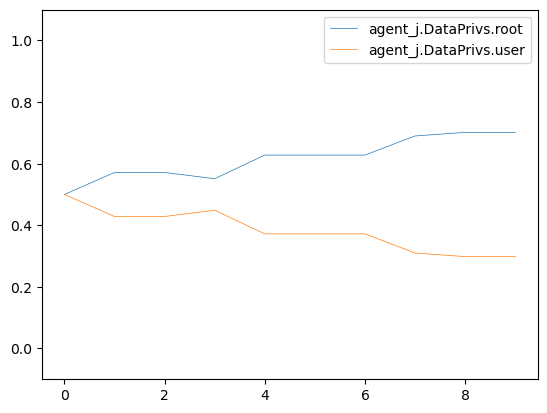

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes    agent_i.action  \
0                   0.0                    1.0      DecoyAccount   
1                   0.0                    1.0  RestrictAccPrivs   
2                   0.0                    1.0           LogIOCs   
3                   0.0                    1.0           LogIOCs   
4                   0.0                    1.0           LogIOCs   
5                   0.0                    1.0           LogIOCs   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0             Nop  
1             Nop  
2             Nop  
3       FileRecon  
4    EnumAccounts  
5      PrivEscAcc  
6       FileRecon  
7  ManipulateData  
8            Exit  
9             Nop

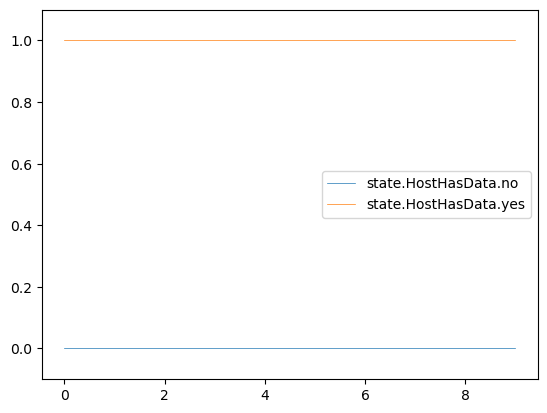

agent_i.HostHasData.no  agent_i.HostHasData.yes    agent_i.action  \
0                     0.0                      1.0      DecoyAccount   
1                     0.0                      1.0  RestrictAccPrivs   
2                     0.0                      1.0           LogIOCs   
3                     0.0                      1.0           LogIOCs   
4                     0.0                      1.0           LogIOCs   
5                     0.0                      1.0           LogIOCs   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0             Nop                             none  
1             Nop                             none  
2             Nop                   login_activity  
3       FileRecon                       file_write  
4    EnumAccounts                        file_enum  
5      PrivEscAcc                             none  
6       FileRecon                             none  
7  ManipulateData                       file_write  
8            Exit                             none  
9             Nop                             none

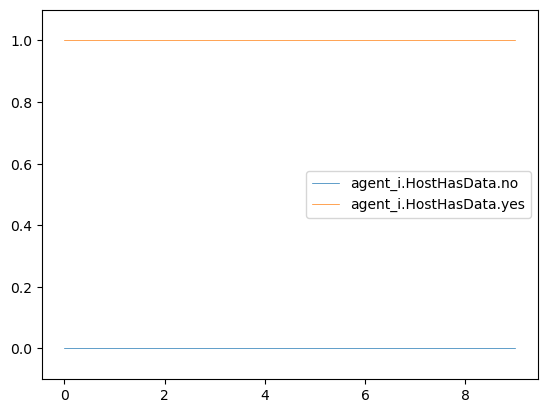

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000             Nop   
1                0.500000                 0.500000             Nop   
2                0.500000                 0.500000             Nop   
3                0.500000                 0.500000       FileRecon   
4                0.569580                 0.430420    EnumAccounts   
5                0.569580                 0.430420      PrivEscAcc   
6                0.569580                 0.430420       FileRecon   
7                0.090055                 0.909945  ManipulateData   
8                0.000051                 0.999949            Exit   
9                0.000051                 0.999949             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2           LogIOCs                            auth   
3           LogIOCs                            auth   
4           LogIOCs                          denied   
5           LogIOCs                            auth   
6               Nop                            auth   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           success   
1                   user_files                           failure   
2                   user_files                           failure   
3                         none                           failure   
4                   user_files                           success   
5                         none                           success   
6                         none                           success   
7                         none                           success   
8                         none                           failure   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                    perms_change  
4                          active                            none  
5                          active                            none  
6                          active                            none  
7                          active                            none  
8                      terminated                            none  
9                      terminated                            none

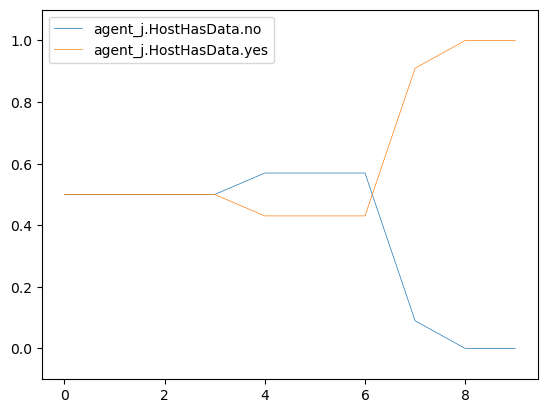

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                             none
1                               1.0                             none
2                               1.0                       file_write
3                               1.0                       file_write
4                               1.0                        file_enum
5                               1.0                   login_activity
6                               1.0                       file_write
7                               1.0                       file_write
8                               1.0                             none
9                               1.0                             none

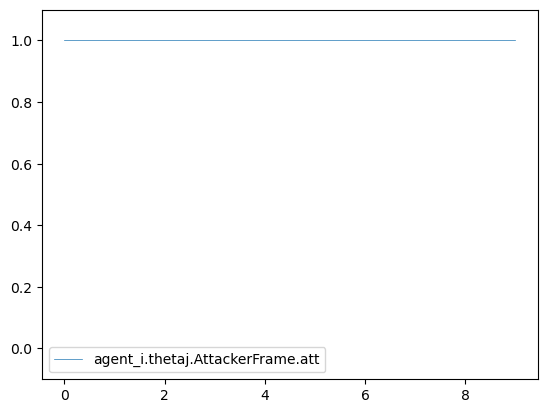

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.904762                        0.095238   
2                         0.904762                        0.095238   
3                         0.900277                        0.099723   
4                         0.886396                        0.113604   
5                         0.886396                        0.113604   
6                         0.886396                        0.113604   
7                         0.875165                        0.124834   
8                         0.873058                        0.126942   
9                         0.873058                        0.126942   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                   user_files   
1                            auth                         none   
2                          denied                   user_files   
3                            auth                         none   
4                          denied                   user_files   
5                            auth                   user_files   
6                            auth                         none   
7                            auth                   user_files   
8                            auth                         none   
9                            auth                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           success                          active   
1                           success                          active   
2                           success                          active   
3                           failure                          active   
4                           success                          active   
5                           failure                          active   
6                           success                          active   
7                           success                          active   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                    perms_change  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

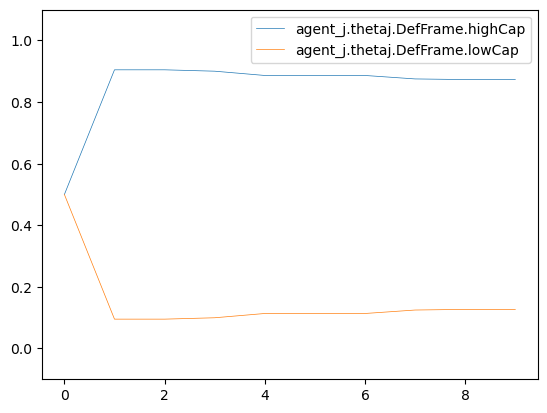

=============DataFound============


state.DataFound.no  state.DataFound.yes    agent_i.action  agent_j.action
0                 1.0                  0.0      DecoyAccount             Nop
1                 1.0                  0.0  RestrictAccPrivs             Nop
2                 1.0                  0.0           LogIOCs             Nop
3                 1.0                  0.0           LogIOCs       FileRecon
4                 1.0                  0.0           LogIOCs    EnumAccounts
5                 1.0                  0.0           LogIOCs      PrivEscAcc
6                 1.0                  0.0               Nop       FileRecon
7                 0.0                  1.0               Nop  ManipulateData
8                 0.0                  1.0               Nop            Exit
9                 0.0                  1.0               Nop             Nop

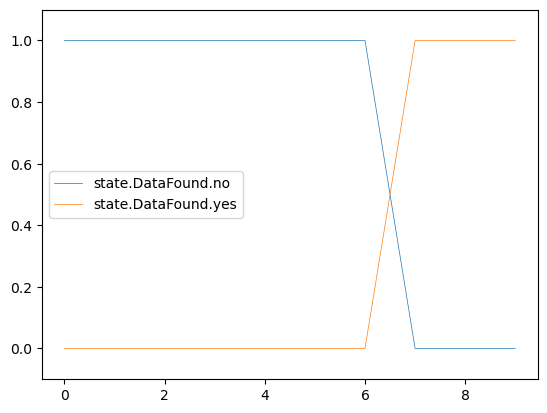

agent_i.DataFound.no  agent_i.DataFound.yes    agent_i.action  \
0              1.000000               0.000000      DecoyAccount   
1              1.000000               0.000000  RestrictAccPrivs   
2              1.000000               0.000000           LogIOCs   
3              1.000000               0.000000           LogIOCs   
4              0.996709               0.003291           LogIOCs   
5              0.393554               0.606446           LogIOCs   
6              0.316299               0.683701               Nop   
7              0.071520               0.928480               Nop   
8              0.036443               0.963557               Nop   
9              0.023987               0.976013               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0             Nop                             none  
1             Nop                             none  
2             Nop                       file_write  
3       FileRecon                       file_write  
4    EnumAccounts                        file_enum  
5      PrivEscAcc                   login_activity  
6       FileRecon                       file_write  
7  ManipulateData                       file_write  
8            Exit                             none  
9             Nop                             none

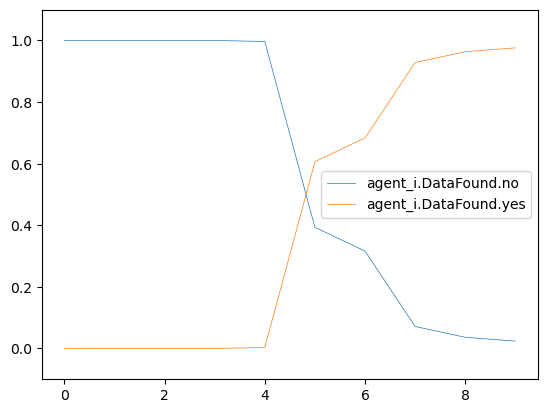

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action  \
0              1.000000               0.000000             Nop   
1              1.000000               0.000000             Nop   
2              1.000000               0.000000             Nop   
3              1.000000               0.000000       FileRecon   
4              0.960239               0.039761    EnumAccounts   
5              0.960238               0.039761      PrivEscAcc   
6              0.960239               0.039761       FileRecon   
7              0.108586               0.891414  ManipulateData   
8              0.000061               0.999939            Exit   
9              0.000061               0.999939             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                            auth   
2           LogIOCs                          denied   
3           LogIOCs                            auth   
4           LogIOCs                          denied   
5           LogIOCs                            auth   
6               Nop                            auth   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           success   
1                         none                           success   
2                   user_files                           success   
3                         none                           failure   
4                   user_files                           success   
5                   user_files                           failure   
6                         none                           success   
7                   user_files                           success   
8                         none                           success   
9                   user_files                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                          active                            none  
6                          active                            none  
7                          active                            none  
8                      terminated                            none  
9                      terminated                            none

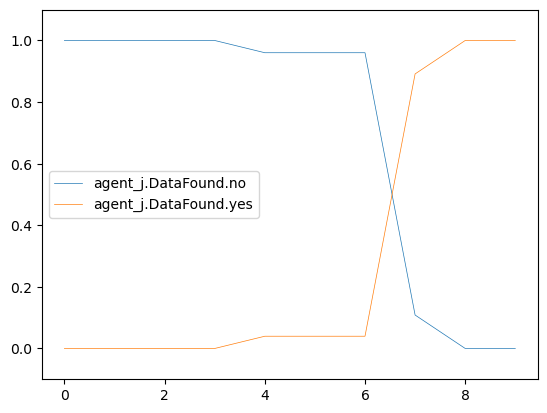

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes    agent_i.action  \
0                   1.0                    0.0      DecoyAccount   
1                   0.0                    1.0  RestrictAccPrivs   
2                   0.0                    1.0           LogIOCs   
3                   0.0                    1.0           LogIOCs   
4                   0.0                    1.0           LogIOCs   
5                   0.0                    1.0           LogIOCs   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0             Nop  
1             Nop  
2             Nop  
3       FileRecon  
4    EnumAccounts  
5      PrivEscAcc  
6       FileRecon  
7  ManipulateData  
8            Exit  
9             Nop

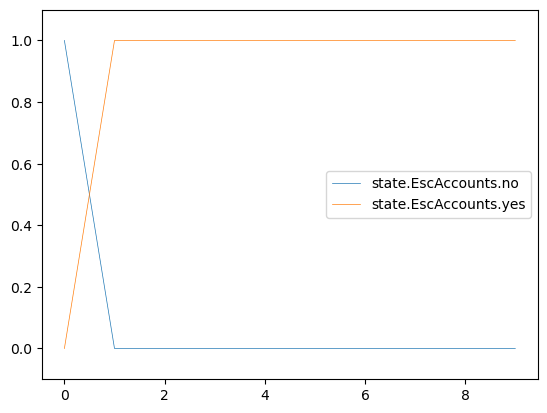

agent_i.EscAccounts.no  agent_i.EscAccounts.yes    agent_i.action  \
0                     1.0                      0.0      DecoyAccount   
1                     0.0                      1.0  RestrictAccPrivs   
2                     0.0                      1.0           LogIOCs   
3                     0.0                      1.0           LogIOCs   
4                     0.0                      1.0           LogIOCs   
5                     0.0                      1.0           LogIOCs   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0             Nop                             none  
1             Nop                             none  
2             Nop                       file_write  
3       FileRecon                       file_write  
4    EnumAccounts                        file_enum  
5      PrivEscAcc                   login_activity  
6       FileRecon                       file_write  
7  ManipulateData                       file_write  
8            Exit                             none  
9             Nop                             none

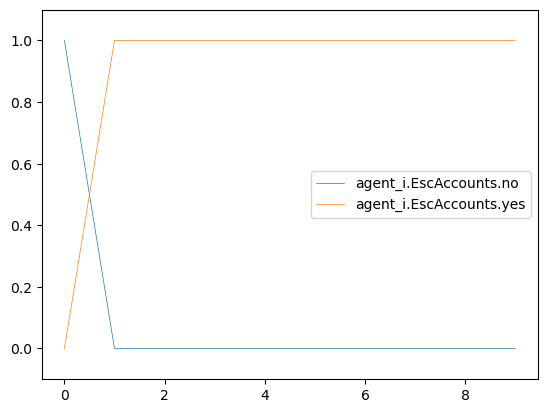

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                0.500000                 0.500000             Nop   
1                0.500000                 0.500000             Nop   
2                0.500000                 0.500000             Nop   
3                0.500000                 0.500000       FileRecon   
4                0.500000                 0.500000    EnumAccounts   
5                0.131579                 0.868421      PrivEscAcc   
6                0.000000                 1.000000       FileRecon   
7                0.000000                 1.000000  ManipulateData   
8                0.000000                 1.000000            Exit   
9                0.000000                 1.000000             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                            auth   
2           LogIOCs                          denied   
3           LogIOCs                            auth   
4           LogIOCs                          denied   
5           LogIOCs                            auth   
6               Nop                            auth   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           success   
1                         none                           success   
2                   user_files                           success   
3                         none                           failure   
4                   user_files                           success   
5                   user_files                           failure   
6                         none                           success   
7                   user_files                           success   
8                         none                           success   
9                   user_files                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                          active                            none  
6                          active                            none  
7                          active                            none  
8                      terminated                            none  
9                      terminated                            none

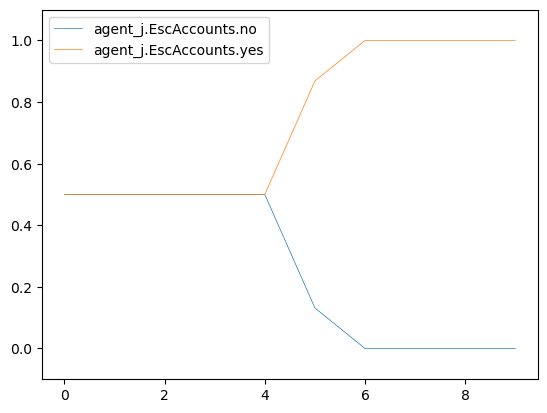

=============AccFound============


state.AccFound.no  state.AccFound.yes    agent_i.action  agent_j.action
0                1.0                 0.0      DecoyAccount             Nop
1                1.0                 0.0  RestrictAccPrivs             Nop
2                1.0                 0.0           LogIOCs             Nop
3                1.0                 0.0           LogIOCs       FileRecon
4                1.0                 0.0           LogIOCs    EnumAccounts
5                0.0                 1.0           LogIOCs      PrivEscAcc
6                0.0                 1.0               Nop       FileRecon
7                0.0                 1.0               Nop  ManipulateData
8                0.0                 1.0               Nop            Exit
9                0.0                 1.0               Nop             Nop

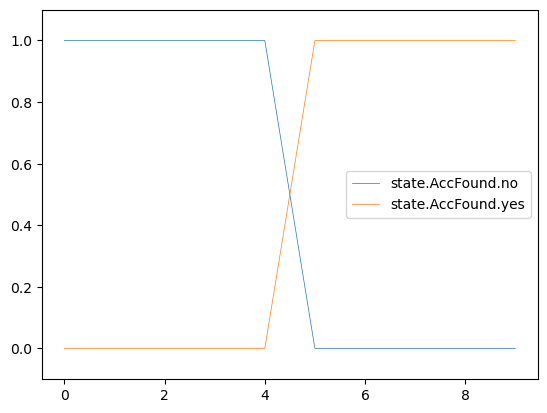

agent_i.AccFound.no  agent_i.AccFound.yes    agent_i.action  \
0             1.000000              0.000000      DecoyAccount   
1             1.000000              0.000000  RestrictAccPrivs   
2             0.994776              0.005224           LogIOCs   
3             0.368067              0.631933           LogIOCs   
4             0.195622              0.804378           LogIOCs   
5             0.049971              0.950029           LogIOCs   
6             0.046733              0.953267               Nop   
7             0.018025              0.981976               Nop   
8             0.011699              0.988301               Nop   
9             0.011708              0.988292               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0             Nop                             none  
1             Nop                             none  
2             Nop                       file_write  
3       FileRecon                       file_write  
4    EnumAccounts                        file_enum  
5      PrivEscAcc                   login_activity  
6       FileRecon                       file_write  
7  ManipulateData                       file_write  
8            Exit                             none  
9             Nop                             none

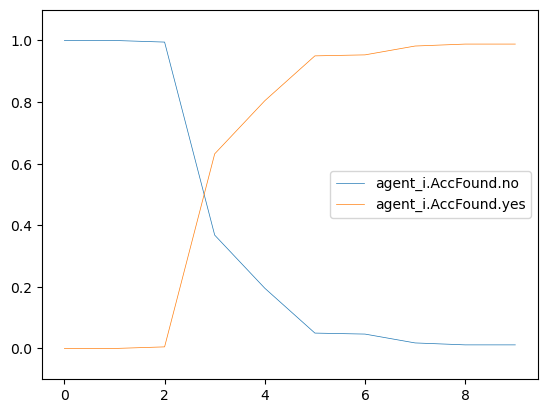

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action  \
0             1.000000              0.000000             Nop   
1             1.000000              0.000000             Nop   
2             1.000000              0.000000             Nop   
3             1.000000              0.000000       FileRecon   
4             1.000000              0.000000    EnumAccounts   
5             0.171053              0.828947      PrivEscAcc   
6             0.000000              1.000000       FileRecon   
7             0.000000              1.000000  ManipulateData   
8             0.000000              1.000000            Exit   
9             0.000000              1.000000             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                            auth   
2           LogIOCs                          denied   
3           LogIOCs                            auth   
4           LogIOCs                          denied   
5           LogIOCs                            auth   
6               Nop                            auth   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           success   
1                         none                           success   
2                   user_files                           success   
3                         none                           failure   
4                   user_files                           success   
5                   user_files                           failure   
6                         none                           success   
7                   user_files                           success   
8                         none                           success   
9                   user_files                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                          active                            none  
6                          active                            none  
7                          active                            none  
8                      terminated                            none  
9                      terminated                            none

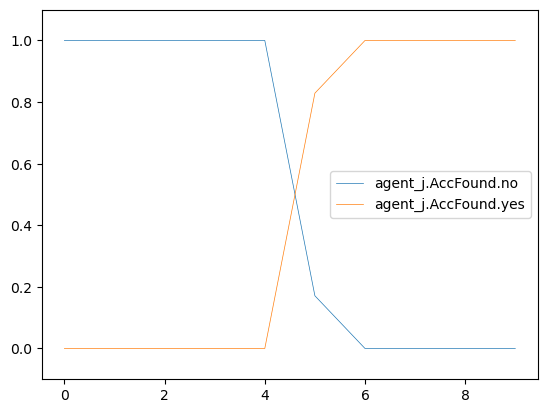

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot    agent_i.action  agent_j.action  
0                      1.0      DecoyAccount             Nop  
1                      1.0  RestrictAccPrivs             Nop  
2                      1.0           LogIOCs             Nop  
3                      1.0           LogIOCs       FileRecon  
4                      1.0           LogIOCs    EnumAccounts  
5                      1.0           LogIOCs      PrivEscAcc  
6                      1.0               Nop       FileRecon  
7                      1.0               Nop  ManipulateData  
8                      1.0               Nop            Exit  
9                      1.0               Nop             Nop

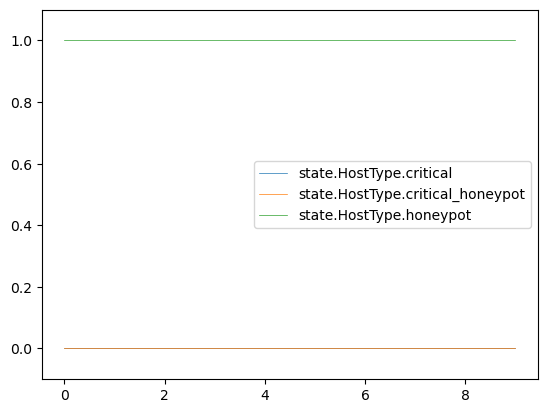

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot    agent_i.action  agent_j.action  \
0                        1.0      DecoyAccount             Nop   
1                        1.0  RestrictAccPrivs             Nop   
2                        1.0           LogIOCs             Nop   
3                        1.0           LogIOCs       FileRecon   
4                        1.0           LogIOCs    EnumAccounts   
5                        1.0           LogIOCs      PrivEscAcc   
6                        1.0               Nop       FileRecon   
7                        1.0               Nop  ManipulateData   
8                        1.0               Nop            Exit   
9                        1.0               Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                             none  
1                             none  
2                       file_write  
3                       file_write  
4                        file_enum  
5                   login_activity  
6                       file_write  
7                       file_write  
8                             none  
9                             none

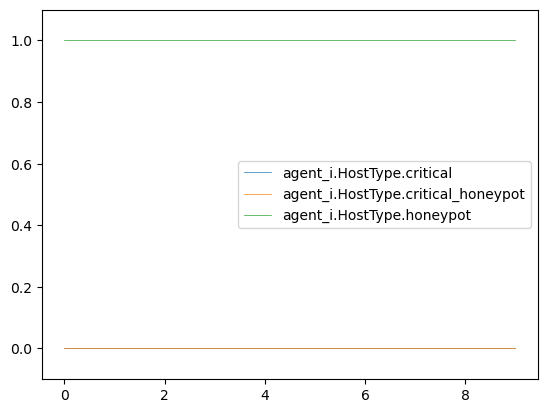

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot  agent_j.action    agent_i.action  \
0                        0.0             Nop      DecoyAccount   
1                        0.0             Nop  RestrictAccPrivs   
2                        0.0             Nop           LogIOCs   
3                        0.0       FileRecon           LogIOCs   
4                        0.0    EnumAccounts           LogIOCs   
5                        0.0      PrivEscAcc           LogIOCs   
6                        0.0       FileRecon               Nop   
7                        0.0  ManipulateData               Nop   
8                        0.0            Exit               Nop   
9                        0.0             Nop               Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                   user_files   
1                            auth                         none   
2                          denied                   user_files   
3                            auth                         none   
4                          denied                   user_files   
5                            auth                   user_files   
6                            auth                         none   
7                            auth                   user_files   
8                            auth                         none   
9                            auth                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           success                          active   
1                           success                          active   
2                           success                          active   
3                           failure                          active   
4                           success                          active   
5                           failure                          active   
6                           success                          active   
7                           success                          active   
8                           success                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                    perms_change  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

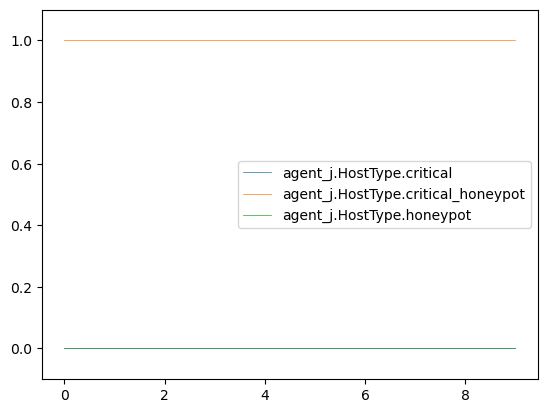

=============AttActive============


state.AttActive.no  state.AttActive.yes    agent_i.action  agent_j.action
0                 0.0                  1.0      DecoyAccount             Nop
1                 0.0                  1.0  RestrictAccPrivs             Nop
2                 0.0                  1.0           LogIOCs             Nop
3                 0.0                  1.0           LogIOCs       FileRecon
4                 0.0                  1.0           LogIOCs    EnumAccounts
5                 0.0                  1.0           LogIOCs      PrivEscAcc
6                 0.0                  1.0               Nop       FileRecon
7                 0.0                  1.0               Nop  ManipulateData
8                 0.0                  1.0               Nop            Exit
9                 1.0                  0.0               Nop             Nop

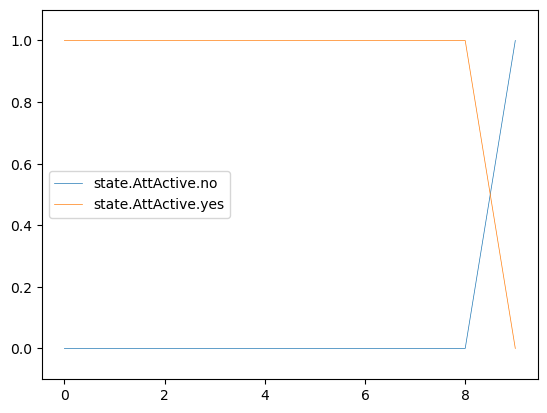

agent_i.AttActive.no  agent_i.AttActive.yes    agent_i.action  \
0              0.000000               1.000000      DecoyAccount   
1              0.000000               1.000000  RestrictAccPrivs   
2              0.000000               1.000000           LogIOCs   
3              0.000000               1.000000           LogIOCs   
4              0.000737               0.999263           LogIOCs   
5              0.019443               0.980557           LogIOCs   
6              0.028157               0.971843               Nop   
7              0.219069               0.780931               Nop   
8              0.573871               0.426129               Nop   
9              0.990416               0.009584               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0             Nop                             none  
1             Nop                             none  
2             Nop                       file_write  
3       FileRecon                       file_write  
4    EnumAccounts                        file_enum  
5      PrivEscAcc                   login_activity  
6       FileRecon                       file_write  
7  ManipulateData                       file_write  
8            Exit                             none  
9             Nop                             none

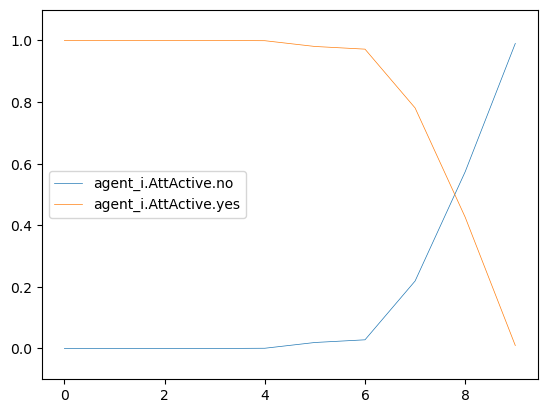

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action  \
0                   0.0                    1.0             Nop   
1                   0.0                    1.0             Nop   
2                   0.0                    1.0             Nop   
3                   0.0                    1.0       FileRecon   
4                   0.0                    1.0    EnumAccounts   
5                   0.0                    1.0      PrivEscAcc   
6                   0.0                    1.0       FileRecon   
7                   0.0                    1.0  ManipulateData   
8                   0.0                    1.0            Exit   
9                   1.0                    0.0             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                            auth   
2           LogIOCs                          denied   
3           LogIOCs                            auth   
4           LogIOCs                          denied   
5           LogIOCs                            auth   
6               Nop                            auth   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           success   
1                         none                           success   
2                   user_files                           success   
3                         none                           failure   
4                   user_files                           success   
5                   user_files                           failure   
6                         none                           success   
7                   user_files                           success   
8                         none                           success   
9                   user_files                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                          active                            none  
6                          active                            none  
7                          active                            none  
8                      terminated                            none  
9                      terminated                            none

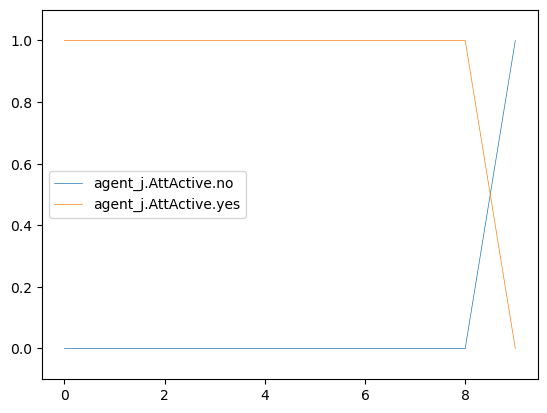

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user    agent_i.action  \
0                     0.0                     1.0      DecoyAccount   
1                     0.0                     1.0  RestrictAccPrivs   
2                     0.0                     1.0           LogIOCs   
3                     0.0                     1.0           LogIOCs   
4                     0.0                     1.0           LogIOCs   
5                     0.0                     1.0           LogIOCs   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action  
0             Nop  
1             Nop  
2             Nop  
3       FileRecon  
4    EnumAccounts  
5      PrivEscAcc  
6       FileRecon  
7  ManipulateData  
8            Exit  
9             Nop

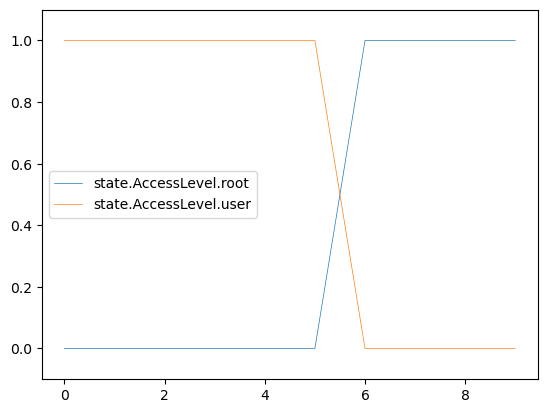

agent_i.AccessLevel.root  agent_i.AccessLevel.user    agent_i.action  \
0                  0.000000                  1.000000      DecoyAccount   
1                  0.000000                  1.000000  RestrictAccPrivs   
2                  0.000000                  1.000000           LogIOCs   
3                  0.004701                  0.995299           LogIOCs   
4                  0.569210                  0.430790           LogIOCs   
5                  0.912042                  0.087958           LogIOCs   
6                  0.943244                  0.056756               Nop   
7                  0.975914                  0.024086               Nop   
8                  0.985707                  0.014293               Nop   
9                  0.985908                  0.014092               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0             Nop                             none  
1             Nop                             none  
2             Nop                       file_write  
3       FileRecon                       file_write  
4    EnumAccounts                        file_enum  
5      PrivEscAcc                   login_activity  
6       FileRecon                       file_write  
7  ManipulateData                       file_write  
8            Exit                             none  
9             Nop                             none

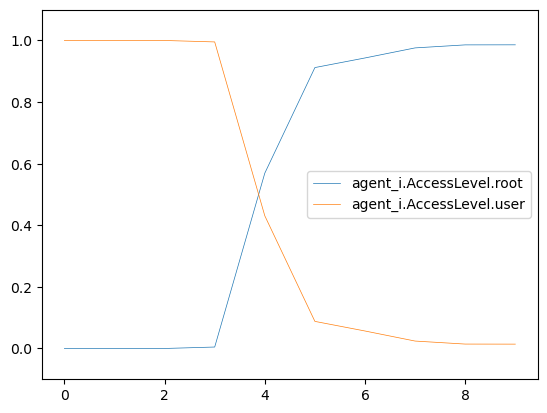

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                       0.0                       1.0             Nop   
1                       0.0                       1.0             Nop   
2                       0.0                       1.0             Nop   
3                       0.0                       1.0       FileRecon   
4                       0.0                       1.0    EnumAccounts   
5                       0.0                       1.0      PrivEscAcc   
6                       1.0                       0.0       FileRecon   
7                       1.0                       0.0  ManipulateData   
8                       1.0                       0.0            Exit   
9                       1.0                       0.0             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                            auth   
2           LogIOCs                          denied   
3           LogIOCs                            auth   
4           LogIOCs                          denied   
5           LogIOCs                            auth   
6               Nop                            auth   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           success   
1                         none                           success   
2                   user_files                           success   
3                         none                           failure   
4                   user_files                           success   
5                   user_files                           failure   
6                         none                           success   
7                   user_files                           success   
8                         none                           success   
9                   user_files                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                          active                            none  
6                          active                            none  
7                          active                            none  
8                      terminated                            none  
9                      terminated                            none

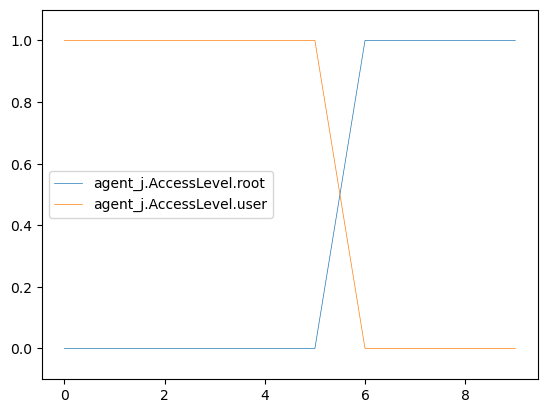

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes    agent_i.action  \
0                    1.0                     0.0      DecoyAccount   
1                    1.0                     0.0  RestrictAccPrivs   
2                    1.0                     0.0           LogIOCs   
3                    1.0                     0.0           LogIOCs   
4                    1.0                     0.0           LogIOCs   
5                    1.0                     0.0           LogIOCs   
6                    1.0                     0.0               Nop   
7                    1.0                     0.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

   agent_j.action  
0             Nop  
1             Nop  
2             Nop  
3       FileRecon  
4    EnumAccounts  
5      PrivEscAcc  
6       FileRecon  
7  ManipulateData  
8            Exit  
9             Nop

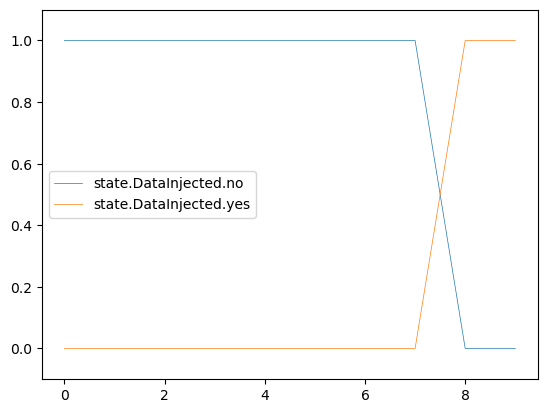

agent_i.DataInjected.no  agent_i.DataInjected.yes    agent_i.action  \
0                 1.000000                  0.000000      DecoyAccount   
1                 1.000000                  0.000000  RestrictAccPrivs   
2                 1.000000                  0.000000           LogIOCs   
3                 1.000000                  0.000000           LogIOCs   
4                 1.000000                  0.000000           LogIOCs   
5                 0.999353                  0.000647           LogIOCs   
6                 0.539977                  0.460023               Nop   
7                 0.161817                  0.838183               Nop   
8                 0.060631                  0.939369               Nop   
9                 0.027515                  0.972485               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0             Nop                             none  
1             Nop                             none  
2             Nop                       file_write  
3       FileRecon                       file_write  
4    EnumAccounts                        file_enum  
5      PrivEscAcc                   login_activity  
6       FileRecon                       file_write  
7  ManipulateData                       file_write  
8            Exit                             none  
9             Nop                             none

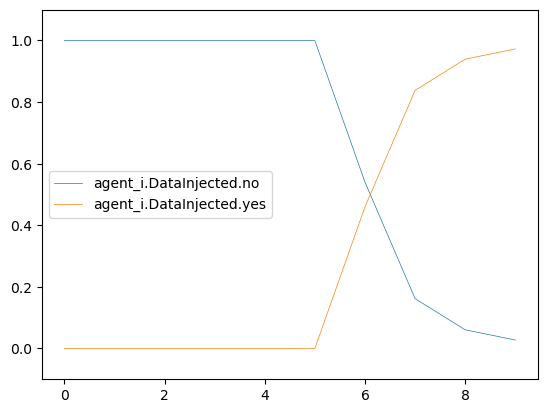

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000             Nop   
1                 1.000000                  0.000000             Nop   
2                 1.000000                  0.000000             Nop   
3                 1.000000                  0.000000       FileRecon   
4                 1.000000                  0.000000    EnumAccounts   
5                 1.000000                  0.000000      PrivEscAcc   
6                 1.000000                  0.000000       FileRecon   
7                 1.000000                  0.000000  ManipulateData   
8                 0.000061                  0.999939            Exit   
9                 0.000061                  0.999939             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                            auth   
2           LogIOCs                          denied   
3           LogIOCs                            auth   
4           LogIOCs                          denied   
5           LogIOCs                            auth   
6               Nop                            auth   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           success   
1                         none                           success   
2                   user_files                           success   
3                         none                           failure   
4                   user_files                           success   
5                   user_files                           failure   
6                         none                           success   
7                   user_files                           success   
8                         none                           success   
9                   user_files                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                          active                            none  
6                          active                            none  
7                          active                            none  
8                      terminated                            none  
9                      terminated                            none

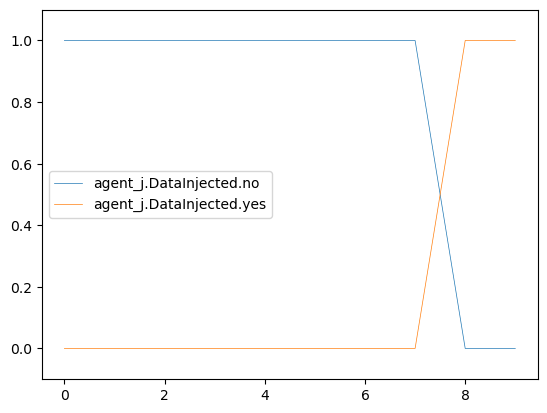

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user    agent_i.action  \
0                   0.0                   1.0      DecoyAccount   
1                   0.0                   1.0  RestrictAccPrivs   
2                   1.0                   0.0           LogIOCs   
3                   1.0                   0.0           LogIOCs   
4                   1.0                   0.0           LogIOCs   
5                   1.0                   0.0           LogIOCs   
6                   1.0                   0.0               Nop   
7                   1.0                   0.0               Nop   
8                   1.0                   0.0               Nop   
9                   1.0                   0.0               Nop   

   agent_j.action  
0             Nop  
1             Nop  
2             Nop  
3       FileRecon  
4    EnumAccounts  
5      PrivEscAcc  
6       FileRecon  
7  ManipulateData  
8            Exit  
9             Nop

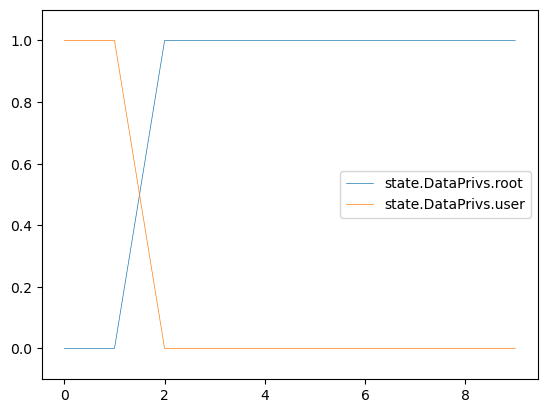

agent_i.DataPrivs.root  agent_i.DataPrivs.user    agent_i.action  \
0                     0.0                     1.0      DecoyAccount   
1                     0.0                     1.0  RestrictAccPrivs   
2                     1.0                     0.0           LogIOCs   
3                     1.0                     0.0           LogIOCs   
4                     1.0                     0.0           LogIOCs   
5                     1.0                     0.0           LogIOCs   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0             Nop                             none  
1             Nop                             none  
2             Nop                       file_write  
3       FileRecon                       file_write  
4    EnumAccounts                        file_enum  
5      PrivEscAcc                   login_activity  
6       FileRecon                       file_write  
7  ManipulateData                       file_write  
8            Exit                             none  
9             Nop                             none

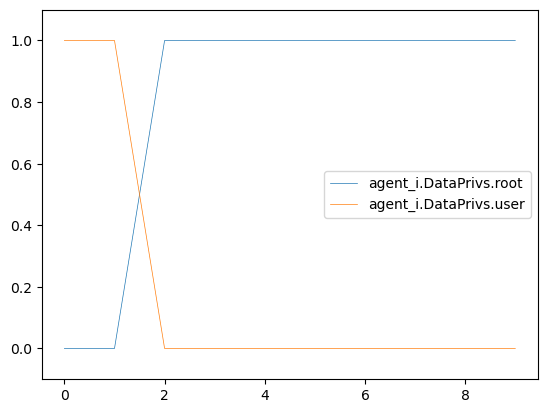

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000             Nop   
1                0.571429                0.428571             Nop   
2                0.571429                0.428571             Nop   
3                0.551247                0.448754       FileRecon   
4                0.627947                0.372053    EnumAccounts   
5                0.627947                0.372053      PrivEscAcc   
6                0.627947                0.372053       FileRecon   
7                0.690024                0.309976  ManipulateData   
8                0.701676                0.298324            Exit   
9                0.701676                0.298324             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                            auth   
2           LogIOCs                          denied   
3           LogIOCs                            auth   
4           LogIOCs                          denied   
5           LogIOCs                            auth   
6               Nop                            auth   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           success   
1                         none                           success   
2                   user_files                           success   
3                         none                           failure   
4                   user_files                           success   
5                   user_files                           failure   
6                         none                           success   
7                   user_files                           success   
8                         none                           success   
9                   user_files                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                          active                            none  
6                          active                            none  
7                          active                            none  
8                      terminated                            none  
9                      terminated                            none

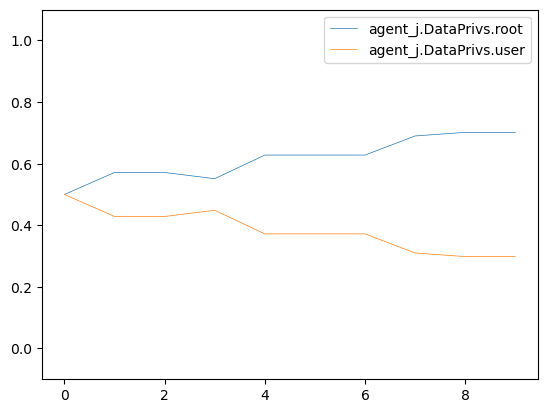

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes    agent_i.action  \
0                   0.0                    1.0      DecoyAccount   
1                   0.0                    1.0  RestrictAccPrivs   
2                   0.0                    1.0           LogIOCs   
3                   0.0                    1.0           LogIOCs   
4                   0.0                    1.0           LogIOCs   
5                   0.0                    1.0           LogIOCs   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0             Nop  
1             Nop  
2             Nop  
3       FileRecon  
4    EnumAccounts  
5      PrivEscAcc  
6       FileRecon  
7  ManipulateData  
8            Exit  
9             Nop

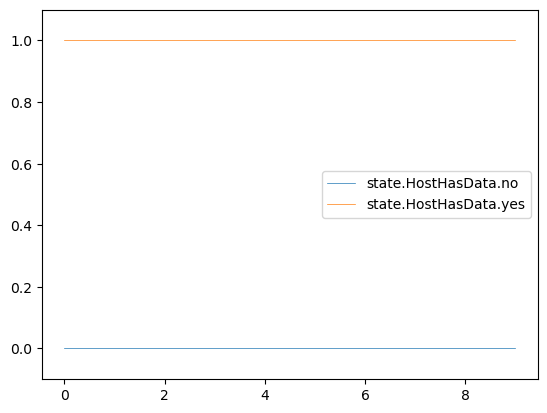

agent_i.HostHasData.no  agent_i.HostHasData.yes    agent_i.action  \
0                     0.0                      1.0      DecoyAccount   
1                     0.0                      1.0  RestrictAccPrivs   
2                     0.0                      1.0           LogIOCs   
3                     0.0                      1.0           LogIOCs   
4                     0.0                      1.0           LogIOCs   
5                     0.0                      1.0           LogIOCs   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0             Nop                             none  
1             Nop                             none  
2             Nop                       file_write  
3       FileRecon                       file_write  
4    EnumAccounts                        file_enum  
5      PrivEscAcc                   login_activity  
6       FileRecon                       file_write  
7  ManipulateData                       file_write  
8            Exit                             none  
9             Nop                             none

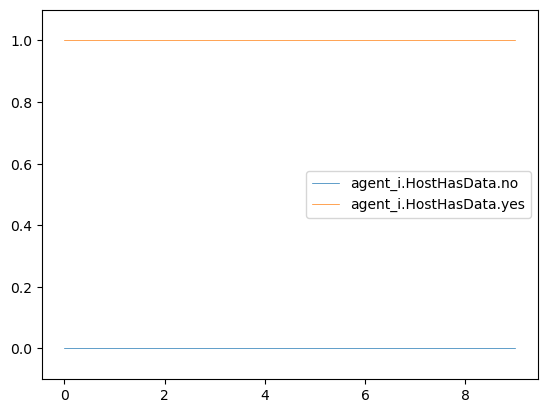

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000             Nop   
1                0.500000                 0.500000             Nop   
2                0.500000                 0.500000             Nop   
3                0.500000                 0.500000       FileRecon   
4                0.569582                 0.430418    EnumAccounts   
5                0.569582                 0.430418      PrivEscAcc   
6                0.569582                 0.430418       FileRecon   
7                0.090056                 0.909944  ManipulateData   
8                0.000051                 0.999949            Exit   
9                0.000051                 0.999949             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                            auth   
2           LogIOCs                          denied   
3           LogIOCs                            auth   
4           LogIOCs                          denied   
5           LogIOCs                            auth   
6               Nop                            auth   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           success   
1                         none                           success   
2                   user_files                           success   
3                         none                           failure   
4                   user_files                           success   
5                   user_files                           failure   
6                         none                           success   
7                   user_files                           success   
8                         none                           success   
9                   user_files                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                          active                            none  
6                          active                            none  
7                          active                            none  
8                      terminated                            none  
9                      terminated                            none

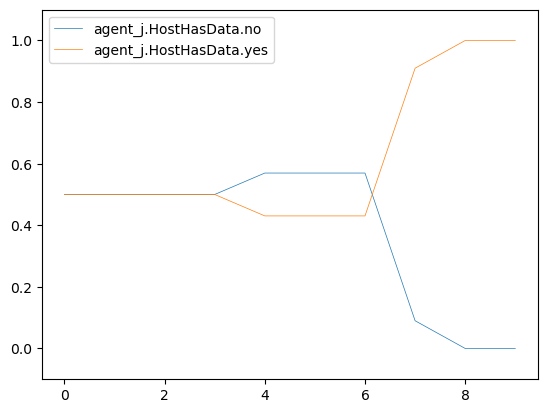

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                             none
1                               1.0                       file_write
2                               1.0                             none
3                               1.0                        file_enum
4                               1.0                       file_write
5                               1.0                       file_write
6                               1.0                        file_enum
7                               1.0                   login_activity
8                               1.0                             none
9                               1.0                        file_enum

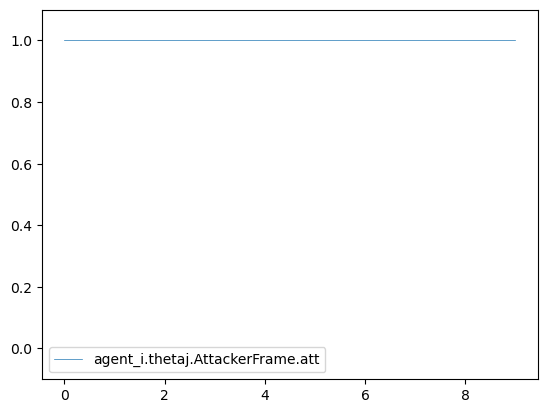

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.904762                        0.095238   
2                         0.904762                        0.095238   
3                         0.900277                        0.099723   
4                         0.886399                        0.113601   
5                         0.886400                        0.113601   
6                         0.886400                        0.113601   
7                         0.875170                        0.124830   
8                         0.873062                        0.126938   
9                         0.873062                        0.126938   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                            auth                         none   
1                            auth                         none   
2                            auth                   user_files   
3                            auth                         none   
4                          denied                   user_files   
5                            auth                   user_files   
6                            auth                   user_files   
7                            auth                         none   
8                            auth                         none   
9                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           success                          active   
1                           success                          active   
2                           success                          active   
3                           failure                          active   
4                           success                          active   
5                           failure                          active   
6                           success                          active   
7                           success                          active   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                    perms_change  
2                            none  
3                    perms_change  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

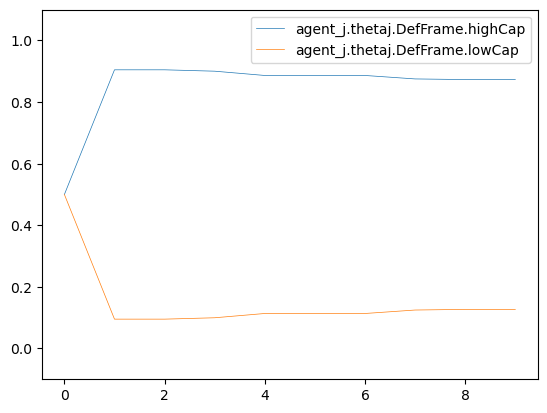

=============DataFound============


state.DataFound.no  state.DataFound.yes    agent_i.action  agent_j.action
0                 1.0                  0.0      DecoyAccount             Nop
1                 1.0                  0.0  RestrictAccPrivs             Nop
2                 1.0                  0.0           LogIOCs             Nop
3                 1.0                  0.0  RestrictAccPrivs       FileRecon
4                 1.0                  0.0           LogIOCs    EnumAccounts
5                 1.0                  0.0           LogIOCs      PrivEscAcc
6                 1.0                  0.0               Nop       FileRecon
7                 0.0                  1.0           LogIOCs  ManipulateData
8                 0.0                  1.0               Nop            Exit
9                 0.0                  1.0               Nop             Nop

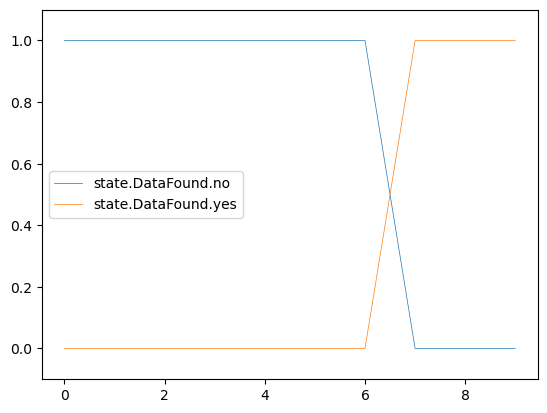

agent_i.DataFound.no  agent_i.DataFound.yes    agent_i.action  \
0              1.000000               0.000000      DecoyAccount   
1              1.000000               0.000000  RestrictAccPrivs   
2              1.000000               0.000000           LogIOCs   
3              1.000000               0.000000  RestrictAccPrivs   
4              0.958405               0.041595           LogIOCs   
5              0.689526               0.310474           LogIOCs   
6              0.282089               0.717911               Nop   
7              0.232479               0.767521           LogIOCs   
8              0.171541               0.828460               Nop   
9              0.107018               0.892982               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0             Nop                             none  
1             Nop                       file_write  
2             Nop                             none  
3       FileRecon                        file_enum  
4    EnumAccounts                       file_write  
5      PrivEscAcc                       file_write  
6       FileRecon                        file_enum  
7  ManipulateData                   login_activity  
8            Exit                             none  
9             Nop                        file_enum

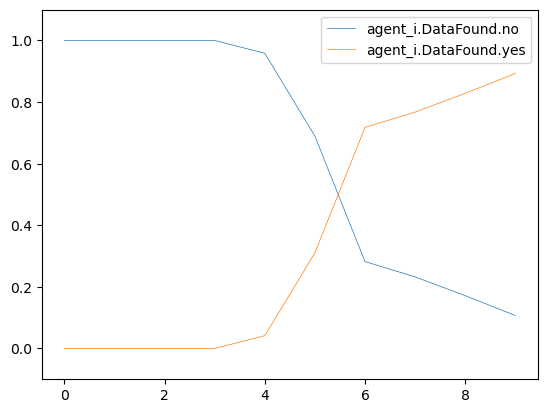

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action  \
0              1.000000               0.000000             Nop   
1              1.000000               0.000000             Nop   
2              1.000000               0.000000             Nop   
3              1.000000               0.000000       FileRecon   
4              0.960240               0.039760    EnumAccounts   
5              0.960240               0.039760      PrivEscAcc   
6              0.960240               0.039760       FileRecon   
7              0.108585               0.891414  ManipulateData   
8              0.000061               0.999939            Exit   
9              0.000061               0.999939             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                            auth   
2           LogIOCs                            auth   
3  RestrictAccPrivs                            auth   
4           LogIOCs                          denied   
5           LogIOCs                            auth   
6               Nop                            auth   
7           LogIOCs                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           success   
1                         none                           success   
2                   user_files                           success   
3                         none                           failure   
4                   user_files                           success   
5                   user_files                           failure   
6                   user_files                           success   
7                         none                           success   
8                         none                           failure   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                    perms_change  
4                          active                            none  
5                          active                            none  
6                          active                            none  
7                          active                            none  
8                      terminated                            none  
9                      terminated                            none

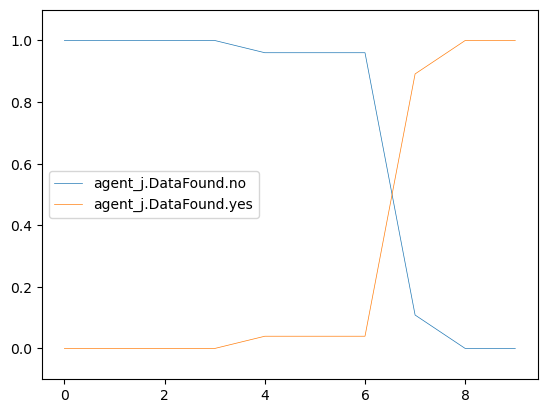

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes    agent_i.action  \
0                   1.0                    0.0      DecoyAccount   
1                   0.0                    1.0  RestrictAccPrivs   
2                   0.0                    1.0           LogIOCs   
3                   0.0                    1.0  RestrictAccPrivs   
4                   0.0                    1.0           LogIOCs   
5                   0.0                    1.0           LogIOCs   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0           LogIOCs   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0             Nop  
1             Nop  
2             Nop  
3       FileRecon  
4    EnumAccounts  
5      PrivEscAcc  
6       FileRecon  
7  ManipulateData  
8            Exit  
9             Nop

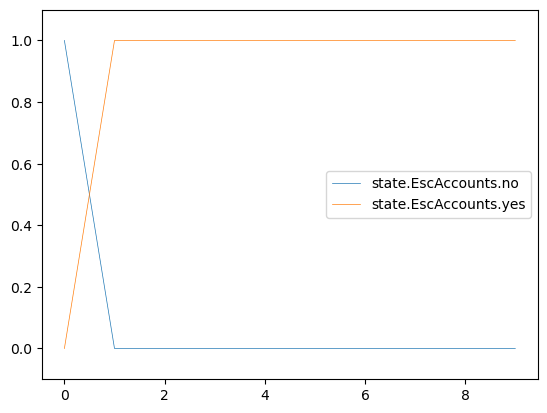

agent_i.EscAccounts.no  agent_i.EscAccounts.yes    agent_i.action  \
0                     1.0                      0.0      DecoyAccount   
1                     0.0                      1.0  RestrictAccPrivs   
2                     0.0                      1.0           LogIOCs   
3                     0.0                      1.0  RestrictAccPrivs   
4                     0.0                      1.0           LogIOCs   
5                     0.0                      1.0           LogIOCs   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0           LogIOCs   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0             Nop                             none  
1             Nop                       file_write  
2             Nop                             none  
3       FileRecon                        file_enum  
4    EnumAccounts                       file_write  
5      PrivEscAcc                       file_write  
6       FileRecon                        file_enum  
7  ManipulateData                   login_activity  
8            Exit                             none  
9             Nop                        file_enum

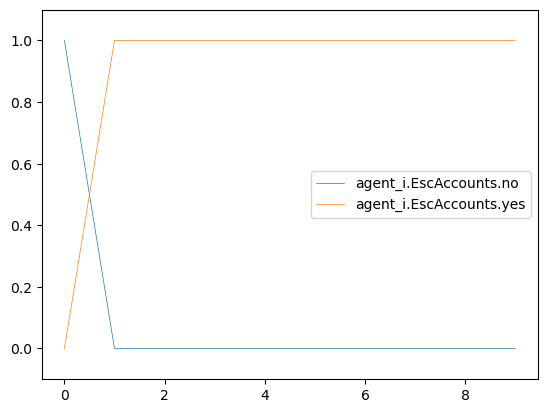

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                0.500000                 0.500000             Nop   
1                0.500000                 0.500000             Nop   
2                0.500000                 0.500000             Nop   
3                0.500000                 0.500000       FileRecon   
4                0.500000                 0.500000    EnumAccounts   
5                0.131579                 0.868421      PrivEscAcc   
6                0.000000                 1.000000       FileRecon   
7                0.000000                 1.000000  ManipulateData   
8                0.000000                 1.000000            Exit   
9                0.000000                 1.000000             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                            auth   
2           LogIOCs                            auth   
3  RestrictAccPrivs                            auth   
4           LogIOCs                          denied   
5           LogIOCs                            auth   
6               Nop                            auth   
7           LogIOCs                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           success   
1                         none                           success   
2                   user_files                           success   
3                         none                           failure   
4                   user_files                           success   
5                   user_files                           failure   
6                   user_files                           success   
7                         none                           success   
8                         none                           failure   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                    perms_change  
4                          active                            none  
5                          active                            none  
6                          active                            none  
7                          active                            none  
8                      terminated                            none  
9                      terminated                            none

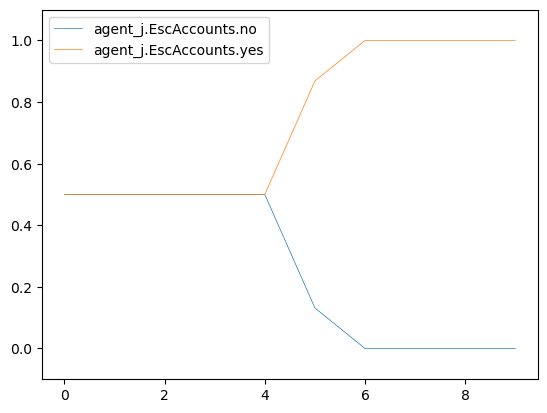

=============AccFound============


state.AccFound.no  state.AccFound.yes    agent_i.action  agent_j.action
0                1.0                 0.0      DecoyAccount             Nop
1                1.0                 0.0  RestrictAccPrivs             Nop
2                1.0                 0.0           LogIOCs             Nop
3                1.0                 0.0  RestrictAccPrivs       FileRecon
4                1.0                 0.0           LogIOCs    EnumAccounts
5                0.0                 1.0           LogIOCs      PrivEscAcc
6                0.0                 1.0               Nop       FileRecon
7                0.0                 1.0           LogIOCs  ManipulateData
8                0.0                 1.0               Nop            Exit
9                0.0                 1.0               Nop             Nop

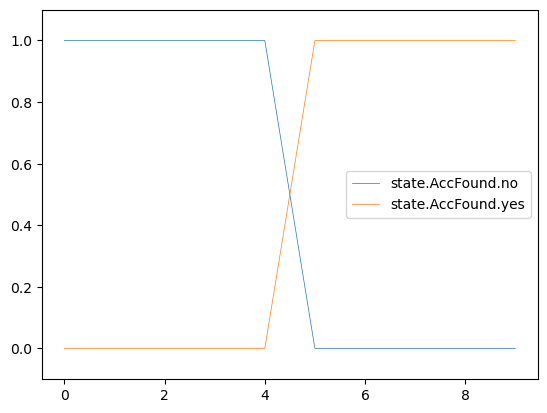

agent_i.AccFound.no  agent_i.AccFound.yes    agent_i.action  \
0             1.000000              0.000000      DecoyAccount   
1             1.000000              0.000000  RestrictAccPrivs   
2             0.965000              0.035000           LogIOCs   
3             0.590478              0.409522  RestrictAccPrivs   
4             0.328513              0.671487           LogIOCs   
5             0.169974              0.830026           LogIOCs   
6             0.087327              0.912673               Nop   
7             0.046540              0.953460           LogIOCs   
8             0.045816              0.954184               Nop   
9             0.052891              0.947109               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0             Nop                             none  
1             Nop                       file_write  
2             Nop                             none  
3       FileRecon                        file_enum  
4    EnumAccounts                       file_write  
5      PrivEscAcc                       file_write  
6       FileRecon                        file_enum  
7  ManipulateData                   login_activity  
8            Exit                             none  
9             Nop                        file_enum

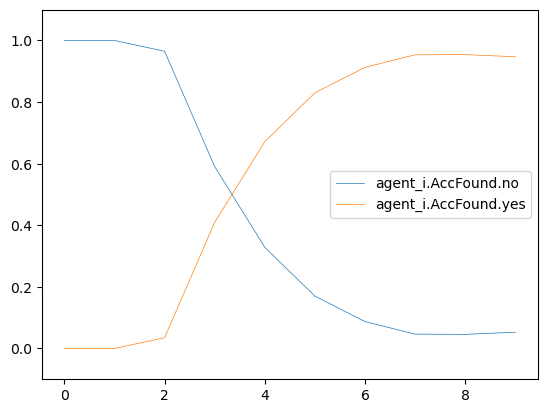

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action  \
0             1.000000              0.000000             Nop   
1             1.000000              0.000000             Nop   
2             1.000000              0.000000             Nop   
3             1.000000              0.000000       FileRecon   
4             1.000000              0.000000    EnumAccounts   
5             0.171053              0.828947      PrivEscAcc   
6             0.000000              1.000000       FileRecon   
7             0.000000              1.000000  ManipulateData   
8             0.000000              1.000000            Exit   
9             0.000000              1.000000             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                            auth   
2           LogIOCs                            auth   
3  RestrictAccPrivs                            auth   
4           LogIOCs                          denied   
5           LogIOCs                            auth   
6               Nop                            auth   
7           LogIOCs                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           success   
1                         none                           success   
2                   user_files                           success   
3                         none                           failure   
4                   user_files                           success   
5                   user_files                           failure   
6                   user_files                           success   
7                         none                           success   
8                         none                           failure   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                    perms_change  
4                          active                            none  
5                          active                            none  
6                          active                            none  
7                          active                            none  
8                      terminated                            none  
9                      terminated                            none

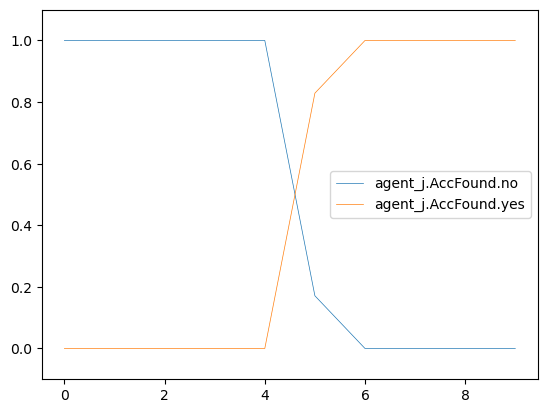

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot    agent_i.action  agent_j.action  
0                      1.0      DecoyAccount             Nop  
1                      1.0  RestrictAccPrivs             Nop  
2                      1.0           LogIOCs             Nop  
3                      1.0  RestrictAccPrivs       FileRecon  
4                      1.0           LogIOCs    EnumAccounts  
5                      1.0           LogIOCs      PrivEscAcc  
6                      1.0               Nop       FileRecon  
7                      1.0           LogIOCs  ManipulateData  
8                      1.0               Nop            Exit  
9                      1.0               Nop             Nop

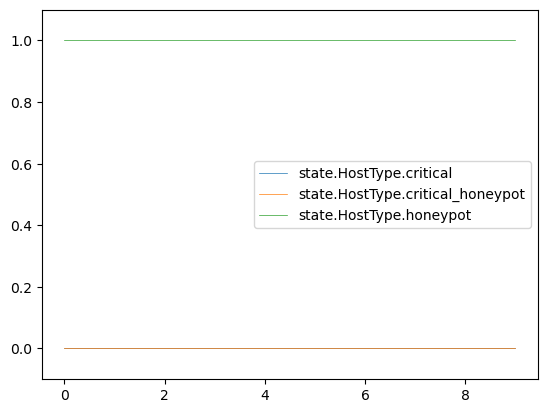

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot    agent_i.action  agent_j.action  \
0                        1.0      DecoyAccount             Nop   
1                        1.0  RestrictAccPrivs             Nop   
2                        1.0           LogIOCs             Nop   
3                        1.0  RestrictAccPrivs       FileRecon   
4                        1.0           LogIOCs    EnumAccounts   
5                        1.0           LogIOCs      PrivEscAcc   
6                        1.0               Nop       FileRecon   
7                        1.0           LogIOCs  ManipulateData   
8                        1.0               Nop            Exit   
9                        1.0               Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                             none  
1                       file_write  
2                             none  
3                        file_enum  
4                       file_write  
5                       file_write  
6                        file_enum  
7                   login_activity  
8                             none  
9                        file_enum

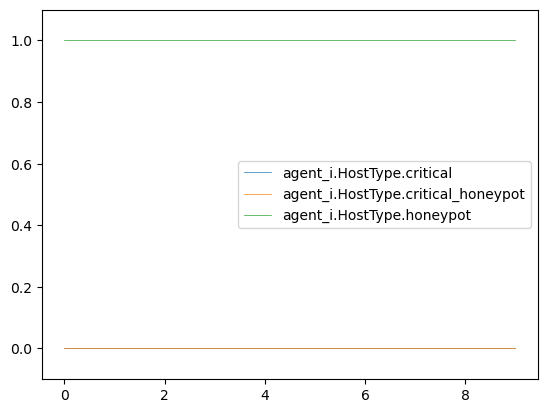

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot  agent_j.action    agent_i.action  \
0                        0.0             Nop      DecoyAccount   
1                        0.0             Nop  RestrictAccPrivs   
2                        0.0             Nop           LogIOCs   
3                        0.0       FileRecon  RestrictAccPrivs   
4                        0.0    EnumAccounts           LogIOCs   
5                        0.0      PrivEscAcc           LogIOCs   
6                        0.0       FileRecon               Nop   
7                        0.0  ManipulateData           LogIOCs   
8                        0.0            Exit               Nop   
9                        0.0             Nop               Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                            auth                         none   
1                            auth                         none   
2                            auth                   user_files   
3                            auth                         none   
4                          denied                   user_files   
5                            auth                   user_files   
6                            auth                   user_files   
7                            auth                         none   
8                            auth                         none   
9                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           success                          active   
1                           success                          active   
2                           success                          active   
3                           failure                          active   
4                           success                          active   
5                           failure                          active   
6                           success                          active   
7                           success                          active   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                    perms_change  
2                            none  
3                    perms_change  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

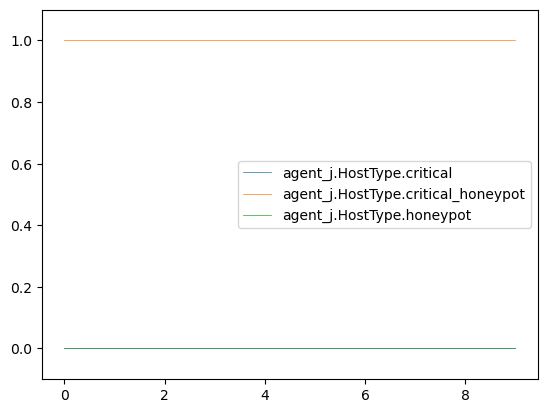

=============AttActive============


state.AttActive.no  state.AttActive.yes    agent_i.action  agent_j.action
0                 0.0                  1.0      DecoyAccount             Nop
1                 0.0                  1.0  RestrictAccPrivs             Nop
2                 0.0                  1.0           LogIOCs             Nop
3                 0.0                  1.0  RestrictAccPrivs       FileRecon
4                 0.0                  1.0           LogIOCs    EnumAccounts
5                 0.0                  1.0           LogIOCs      PrivEscAcc
6                 0.0                  1.0               Nop       FileRecon
7                 0.0                  1.0           LogIOCs  ManipulateData
8                 0.0                  1.0               Nop            Exit
9                 1.0                  0.0               Nop             Nop

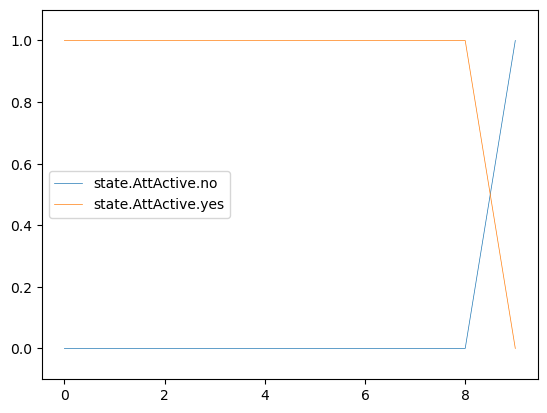

agent_i.AttActive.no  agent_i.AttActive.yes    agent_i.action  \
0              0.000000               1.000000      DecoyAccount   
1              0.000000               1.000000  RestrictAccPrivs   
2              0.000000               1.000000           LogIOCs   
3              0.000000               1.000000  RestrictAccPrivs   
4              0.001331               0.998669           LogIOCs   
5              0.131344               0.868656           LogIOCs   
6              0.227129               0.772871               Nop   
7              0.325441               0.674559           LogIOCs   
8              0.401331               0.598669               Nop   
9              0.956864               0.043136               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0             Nop                             none  
1             Nop                       file_write  
2             Nop                             none  
3       FileRecon                        file_enum  
4    EnumAccounts                       file_write  
5      PrivEscAcc                       file_write  
6       FileRecon                        file_enum  
7  ManipulateData                   login_activity  
8            Exit                             none  
9             Nop                        file_enum

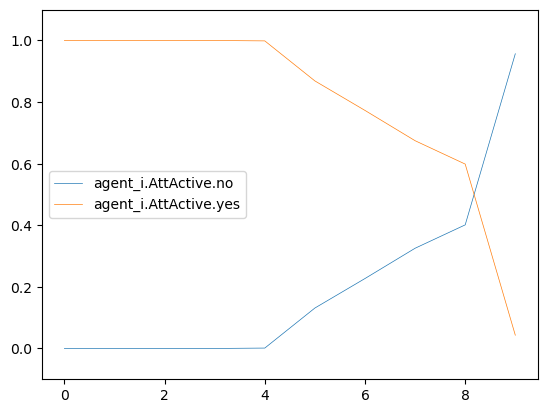

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action  \
0                   0.0                    1.0             Nop   
1                   0.0                    1.0             Nop   
2                   0.0                    1.0             Nop   
3                   0.0                    1.0       FileRecon   
4                   0.0                    1.0    EnumAccounts   
5                   0.0                    1.0      PrivEscAcc   
6                   0.0                    1.0       FileRecon   
7                   0.0                    1.0  ManipulateData   
8                   0.0                    1.0            Exit   
9                   1.0                    0.0             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                            auth   
2           LogIOCs                            auth   
3  RestrictAccPrivs                            auth   
4           LogIOCs                          denied   
5           LogIOCs                            auth   
6               Nop                            auth   
7           LogIOCs                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           success   
1                         none                           success   
2                   user_files                           success   
3                         none                           failure   
4                   user_files                           success   
5                   user_files                           failure   
6                   user_files                           success   
7                         none                           success   
8                         none                           failure   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                    perms_change  
4                          active                            none  
5                          active                            none  
6                          active                            none  
7                          active                            none  
8                      terminated                            none  
9                      terminated                            none

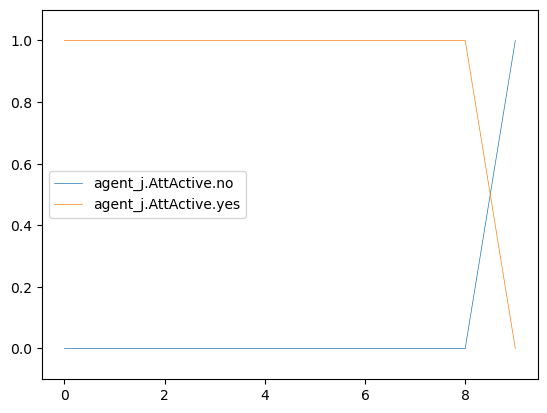

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user    agent_i.action  \
0                     0.0                     1.0      DecoyAccount   
1                     0.0                     1.0  RestrictAccPrivs   
2                     0.0                     1.0           LogIOCs   
3                     0.0                     1.0  RestrictAccPrivs   
4                     0.0                     1.0           LogIOCs   
5                     0.0                     1.0           LogIOCs   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0           LogIOCs   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action  
0             Nop  
1             Nop  
2             Nop  
3       FileRecon  
4    EnumAccounts  
5      PrivEscAcc  
6       FileRecon  
7  ManipulateData  
8            Exit  
9             Nop

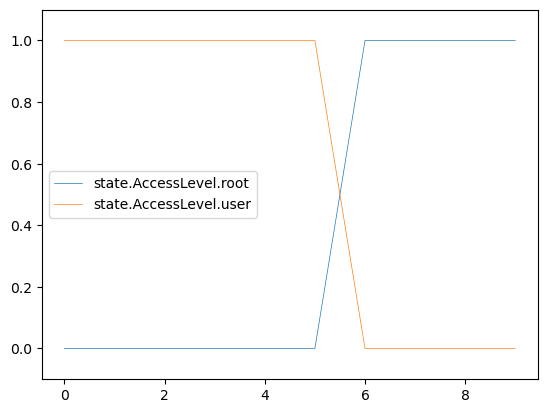

agent_i.AccessLevel.root  agent_i.AccessLevel.user    agent_i.action  \
0                  0.000000                  1.000000      DecoyAccount   
1                  0.000000                  1.000000  RestrictAccPrivs   
2                  0.000000                  1.000000           LogIOCs   
3                  0.020064                  0.979936  RestrictAccPrivs   
4                  0.207719                  0.792281           LogIOCs   
5                  0.694946                  0.305054           LogIOCs   
6                  0.860590                  0.139410               Nop   
7                  0.931081                  0.068919           LogIOCs   
8                  0.939845                  0.060155               Nop   
9                  0.930124                  0.069876               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0             Nop                             none  
1             Nop                       file_write  
2             Nop                             none  
3       FileRecon                        file_enum  
4    EnumAccounts                       file_write  
5      PrivEscAcc                       file_write  
6       FileRecon                        file_enum  
7  ManipulateData                   login_activity  
8            Exit                             none  
9             Nop                        file_enum

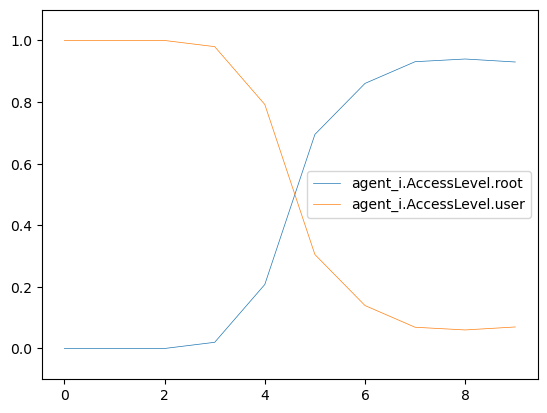

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                       0.0                       1.0             Nop   
1                       0.0                       1.0             Nop   
2                       0.0                       1.0             Nop   
3                       0.0                       1.0       FileRecon   
4                       0.0                       1.0    EnumAccounts   
5                       0.0                       1.0      PrivEscAcc   
6                       1.0                       0.0       FileRecon   
7                       1.0                       0.0  ManipulateData   
8                       1.0                       0.0            Exit   
9                       1.0                       0.0             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                            auth   
2           LogIOCs                            auth   
3  RestrictAccPrivs                            auth   
4           LogIOCs                          denied   
5           LogIOCs                            auth   
6               Nop                            auth   
7           LogIOCs                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           success   
1                         none                           success   
2                   user_files                           success   
3                         none                           failure   
4                   user_files                           success   
5                   user_files                           failure   
6                   user_files                           success   
7                         none                           success   
8                         none                           failure   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                    perms_change  
4                          active                            none  
5                          active                            none  
6                          active                            none  
7                          active                            none  
8                      terminated                            none  
9                      terminated                            none

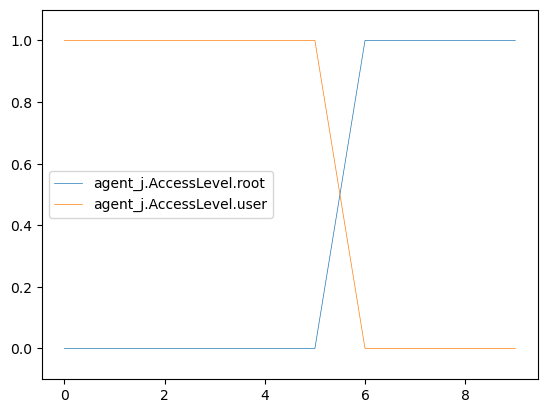

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes    agent_i.action  \
0                    1.0                     0.0      DecoyAccount   
1                    1.0                     0.0  RestrictAccPrivs   
2                    1.0                     0.0           LogIOCs   
3                    1.0                     0.0  RestrictAccPrivs   
4                    1.0                     0.0           LogIOCs   
5                    1.0                     0.0           LogIOCs   
6                    1.0                     0.0               Nop   
7                    1.0                     0.0           LogIOCs   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

   agent_j.action  
0             Nop  
1             Nop  
2             Nop  
3       FileRecon  
4    EnumAccounts  
5      PrivEscAcc  
6       FileRecon  
7  ManipulateData  
8            Exit  
9             Nop

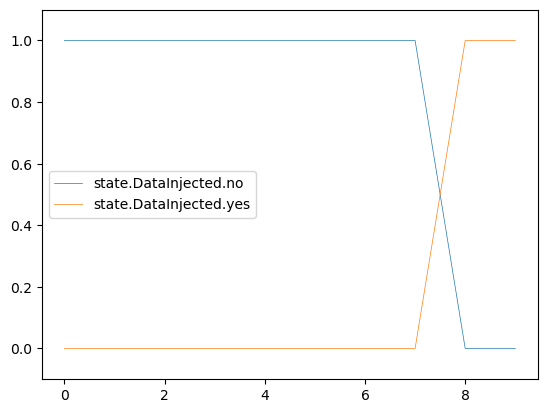

agent_i.DataInjected.no  agent_i.DataInjected.yes    agent_i.action  \
0                 1.000000                  0.000000      DecoyAccount   
1                 1.000000                  0.000000  RestrictAccPrivs   
2                 1.000000                  0.000000           LogIOCs   
3                 1.000000                  0.000000  RestrictAccPrivs   
4                 1.000000                  0.000000           LogIOCs   
5                 0.786947                  0.213054           LogIOCs   
6                 0.462474                  0.537526               Nop   
7                 0.641870                  0.358130           LogIOCs   
8                 0.309088                  0.690912               Nop   
9                 0.127505                  0.872495               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0             Nop                             none  
1             Nop                       file_write  
2             Nop                             none  
3       FileRecon                        file_enum  
4    EnumAccounts                       file_write  
5      PrivEscAcc                       file_write  
6       FileRecon                        file_enum  
7  ManipulateData                   login_activity  
8            Exit                             none  
9             Nop                        file_enum

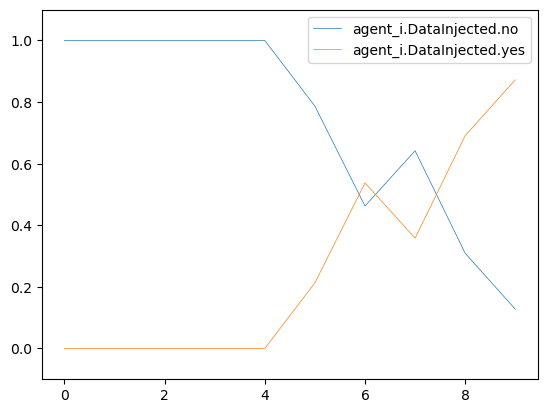

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000             Nop   
1                 1.000000                  0.000000             Nop   
2                 1.000000                  0.000000             Nop   
3                 1.000000                  0.000000       FileRecon   
4                 1.000000                  0.000000    EnumAccounts   
5                 1.000000                  0.000000      PrivEscAcc   
6                 1.000000                  0.000000       FileRecon   
7                 1.000000                  0.000000  ManipulateData   
8                 0.000061                  0.999939            Exit   
9                 0.000061                  0.999939             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                            auth   
2           LogIOCs                            auth   
3  RestrictAccPrivs                            auth   
4           LogIOCs                          denied   
5           LogIOCs                            auth   
6               Nop                            auth   
7           LogIOCs                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           success   
1                         none                           success   
2                   user_files                           success   
3                         none                           failure   
4                   user_files                           success   
5                   user_files                           failure   
6                   user_files                           success   
7                         none                           success   
8                         none                           failure   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                    perms_change  
4                          active                            none  
5                          active                            none  
6                          active                            none  
7                          active                            none  
8                      terminated                            none  
9                      terminated                            none

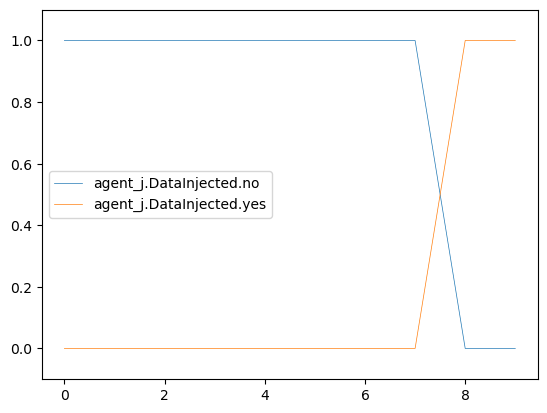

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user    agent_i.action  \
0                   0.0                   1.0      DecoyAccount   
1                   0.0                   1.0  RestrictAccPrivs   
2                   1.0                   0.0           LogIOCs   
3                   1.0                   0.0  RestrictAccPrivs   
4                   1.0                   0.0           LogIOCs   
5                   1.0                   0.0           LogIOCs   
6                   1.0                   0.0               Nop   
7                   1.0                   0.0           LogIOCs   
8                   1.0                   0.0               Nop   
9                   1.0                   0.0               Nop   

   agent_j.action  
0             Nop  
1             Nop  
2             Nop  
3       FileRecon  
4    EnumAccounts  
5      PrivEscAcc  
6       FileRecon  
7  ManipulateData  
8            Exit  
9             Nop

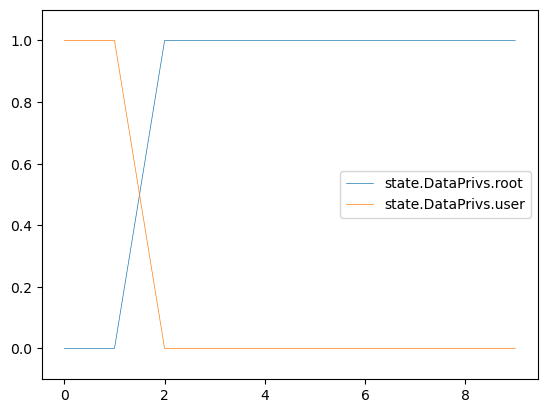

agent_i.DataPrivs.root  agent_i.DataPrivs.user    agent_i.action  \
0                     0.0                     1.0      DecoyAccount   
1                     0.0                     1.0  RestrictAccPrivs   
2                     1.0                     0.0           LogIOCs   
3                     1.0                     0.0  RestrictAccPrivs   
4                     1.0                     0.0           LogIOCs   
5                     1.0                     0.0           LogIOCs   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0           LogIOCs   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0             Nop                             none  
1             Nop                       file_write  
2             Nop                             none  
3       FileRecon                        file_enum  
4    EnumAccounts                       file_write  
5      PrivEscAcc                       file_write  
6       FileRecon                        file_enum  
7  ManipulateData                   login_activity  
8            Exit                             none  
9             Nop                        file_enum

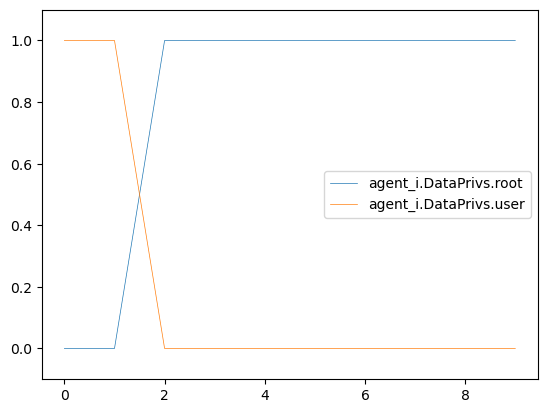

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000             Nop   
1                0.571429                0.428571             Nop   
2                0.571429                0.428571             Nop   
3                0.551247                0.448754       FileRecon   
4                0.627958                0.372042    EnumAccounts   
5                0.627958                0.372042      PrivEscAcc   
6                0.627958                0.372042       FileRecon   
7                0.690034                0.309965  ManipulateData   
8                0.701686                0.298314            Exit   
9                0.701686                0.298314             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                            auth   
2           LogIOCs                            auth   
3  RestrictAccPrivs                            auth   
4           LogIOCs                          denied   
5           LogIOCs                            auth   
6               Nop                            auth   
7           LogIOCs                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           success   
1                         none                           success   
2                   user_files                           success   
3                         none                           failure   
4                   user_files                           success   
5                   user_files                           failure   
6                   user_files                           success   
7                         none                           success   
8                         none                           failure   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                    perms_change  
4                          active                            none  
5                          active                            none  
6                          active                            none  
7                          active                            none  
8                      terminated                            none  
9                      terminated                            none

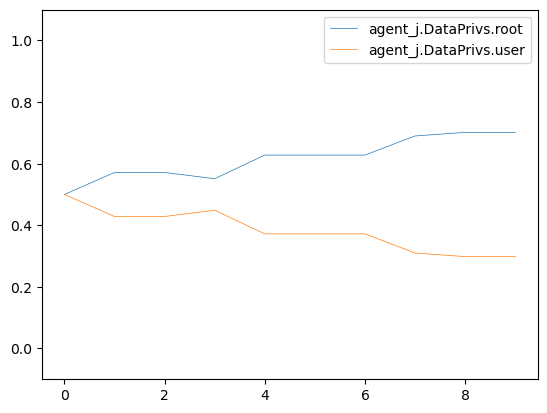

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes    agent_i.action  \
0                   0.0                    1.0      DecoyAccount   
1                   0.0                    1.0  RestrictAccPrivs   
2                   0.0                    1.0           LogIOCs   
3                   0.0                    1.0  RestrictAccPrivs   
4                   0.0                    1.0           LogIOCs   
5                   0.0                    1.0           LogIOCs   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0           LogIOCs   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0             Nop  
1             Nop  
2             Nop  
3       FileRecon  
4    EnumAccounts  
5      PrivEscAcc  
6       FileRecon  
7  ManipulateData  
8            Exit  
9             Nop

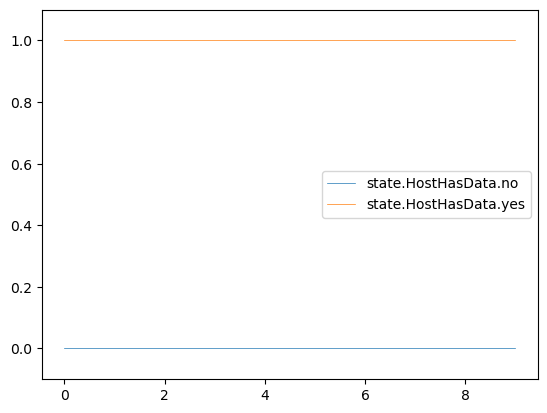

agent_i.HostHasData.no  agent_i.HostHasData.yes    agent_i.action  \
0                     0.0                      1.0      DecoyAccount   
1                     0.0                      1.0  RestrictAccPrivs   
2                     0.0                      1.0           LogIOCs   
3                     0.0                      1.0  RestrictAccPrivs   
4                     0.0                      1.0           LogIOCs   
5                     0.0                      1.0           LogIOCs   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0           LogIOCs   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0             Nop                             none  
1             Nop                       file_write  
2             Nop                             none  
3       FileRecon                        file_enum  
4    EnumAccounts                       file_write  
5      PrivEscAcc                       file_write  
6       FileRecon                        file_enum  
7  ManipulateData                   login_activity  
8            Exit                             none  
9             Nop                        file_enum

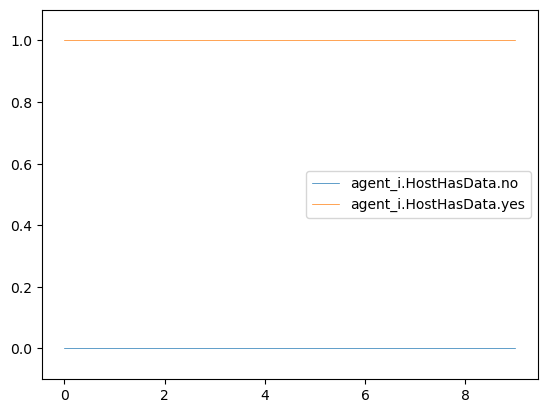

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000             Nop   
1                0.500000                 0.500000             Nop   
2                0.500000                 0.500000             Nop   
3                0.500000                 0.500000       FileRecon   
4                0.569580                 0.430420    EnumAccounts   
5                0.569580                 0.430420      PrivEscAcc   
6                0.569580                 0.430420       FileRecon   
7                0.090055                 0.909945  ManipulateData   
8                0.000051                 0.999949            Exit   
9                0.000051                 0.999949             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                            auth   
2           LogIOCs                            auth   
3  RestrictAccPrivs                            auth   
4           LogIOCs                          denied   
5           LogIOCs                            auth   
6               Nop                            auth   
7           LogIOCs                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           success   
1                         none                           success   
2                   user_files                           success   
3                         none                           failure   
4                   user_files                           success   
5                   user_files                           failure   
6                   user_files                           success   
7                         none                           success   
8                         none                           failure   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                    perms_change  
4                          active                            none  
5                          active                            none  
6                          active                            none  
7                          active                            none  
8                      terminated                            none  
9                      terminated                            none

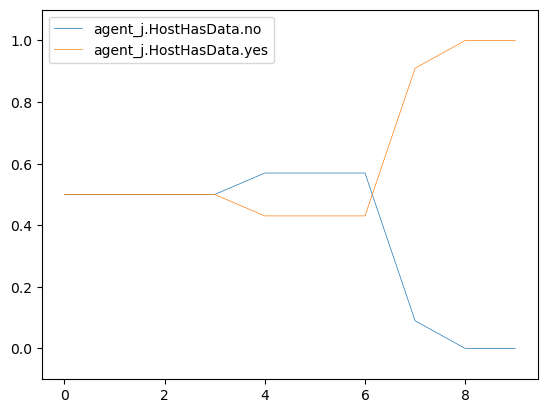

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                             none
2                               1.0                             none
3                               1.0                        file_enum
4                               1.0                        file_enum
5                               1.0                   login_activity
6                               1.0                        file_enum
7                               1.0                        file_enum
8                               1.0                       file_write
9                               1.0                             none

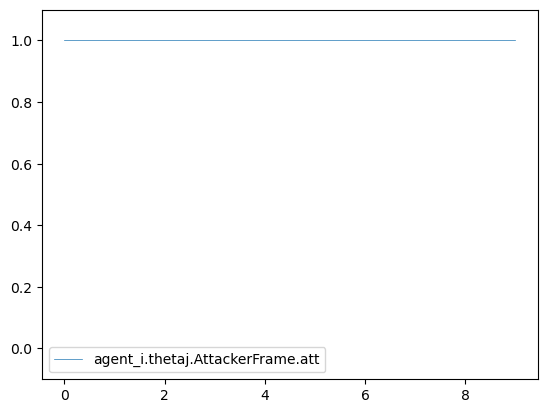

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.904762                        0.095238   
2                         0.904762                        0.095238   
3                         0.900277                        0.099723   
4                         0.886399                        0.113601   
5                         0.886400                        0.113601   
6                         0.886399                        0.113601   
7                         0.890696                        0.109304   
8                         0.869341                        0.130659   
9                         0.863080                        0.136920   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                   user_files   
1                            auth                   user_files   
2                            auth                         none   
3                            auth                         none   
4                          denied                         none   
5                            auth                         none   
6                            auth                         none   
7                            auth                         none   
8                            auth                         none   
9                            auth                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           success                          active   
1                           failure                          active   
2                           success                          active   
3                           failure                          active   
4                           success                          active   
5                           failure                          active   
6                           failure                          active   
7                           success                          active   
8                           success                          active   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                    perms_change  
2                            none  
3                    perms_change  
4                            none  
5                    perms_change  
6                            none  
7                            none  
8                            none  
9                            none

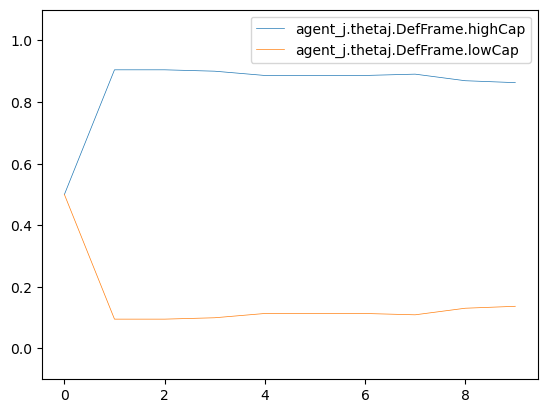

=============DataFound============


state.DataFound.no  state.DataFound.yes    agent_i.action  agent_j.action
0                 1.0                  0.0      DecoyAccount             Nop
1                 1.0                  0.0  RestrictAccPrivs             Nop
2                 1.0                  0.0           LogIOCs             Nop
3                 1.0                  0.0  RestrictAccPrivs       FileRecon
4                 1.0                  0.0           LogIOCs    EnumAccounts
5                 1.0                  0.0           LogIOCs      PrivEscAcc
6                 1.0                  0.0           LogIOCs       FileRecon
7                 0.0                  1.0           LogIOCs       FileRecon
8                 0.0                  1.0           LogIOCs  ManipulateData
9                 0.0                  1.0               Nop            Exit

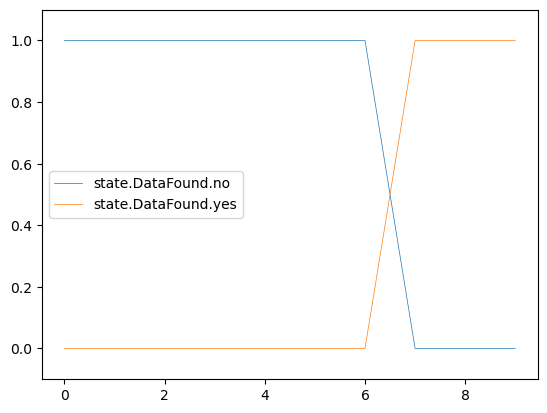

agent_i.DataFound.no  agent_i.DataFound.yes    agent_i.action  \
0              1.000000               0.000000      DecoyAccount   
1              1.000000               0.000000  RestrictAccPrivs   
2              1.000000               0.000000           LogIOCs   
3              1.000000               0.000000  RestrictAccPrivs   
4              0.993698               0.006302           LogIOCs   
5              0.745215               0.254785           LogIOCs   
6              0.841646               0.158354           LogIOCs   
7              0.325940               0.674060           LogIOCs   
8              0.209078               0.790921           LogIOCs   
9              0.032075               0.967925               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0             Nop                        file_enum  
1             Nop                             none  
2             Nop                             none  
3       FileRecon                        file_enum  
4    EnumAccounts                        file_enum  
5      PrivEscAcc                   login_activity  
6       FileRecon                        file_enum  
7       FileRecon                        file_enum  
8  ManipulateData                       file_write  
9            Exit                             none

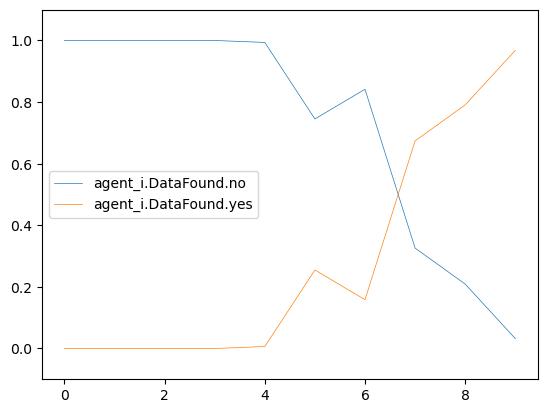

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action  \
0              1.000000               0.000000             Nop   
1              1.000000               0.000000             Nop   
2              1.000000               0.000000             Nop   
3              1.000000               0.000000       FileRecon   
4              0.960240               0.039760    EnumAccounts   
5              0.960240               0.039760      PrivEscAcc   
6              0.960240               0.039760       FileRecon   
7              0.907977               0.092023       FileRecon   
8              0.181368               0.818632  ManipulateData   
9              0.000111               0.999889            Exit   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                            auth   
2           LogIOCs                            auth   
3  RestrictAccPrivs                            auth   
4           LogIOCs                          denied   
5           LogIOCs                            auth   
6           LogIOCs                            auth   
7           LogIOCs                            auth   
8           LogIOCs                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           success   
1                   user_files                           failure   
2                         none                           success   
3                         none                           failure   
4                         none                           success   
5                         none                           failure   
6                         none                           failure   
7                         none                           success   
8                         none                           success   
9                   user_files                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                    perms_change  
4                          active                            none  
5                          active                    perms_change  
6                          active                            none  
7                          active                            none  
8                          active                            none  
9                      terminated                            none

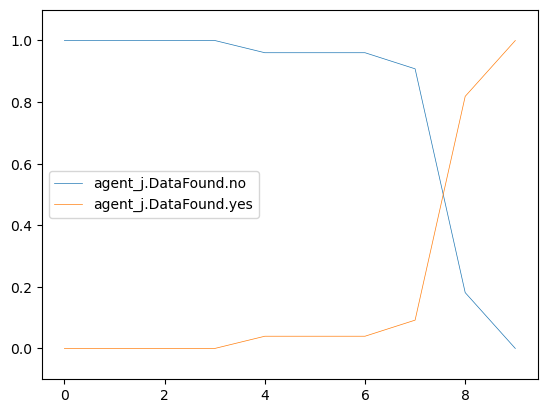

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes    agent_i.action  \
0                   1.0                    0.0      DecoyAccount   
1                   0.0                    1.0  RestrictAccPrivs   
2                   0.0                    1.0           LogIOCs   
3                   0.0                    1.0  RestrictAccPrivs   
4                   0.0                    1.0           LogIOCs   
5                   0.0                    1.0           LogIOCs   
6                   0.0                    1.0           LogIOCs   
7                   0.0                    1.0           LogIOCs   
8                   0.0                    1.0           LogIOCs   
9                   0.0                    1.0               Nop   

   agent_j.action  
0             Nop  
1             Nop  
2             Nop  
3       FileRecon  
4    EnumAccounts  
5      PrivEscAcc  
6       FileRecon  
7       FileRecon  
8  ManipulateData  
9            Exit

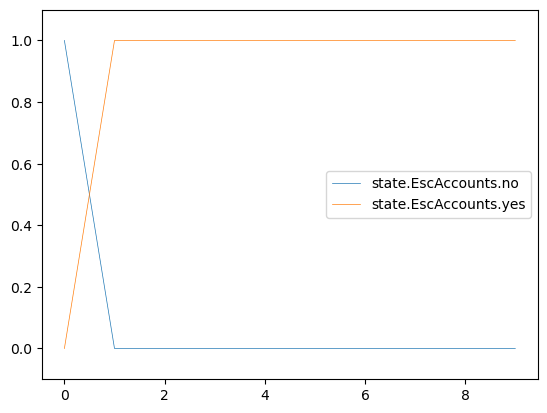

agent_i.EscAccounts.no  agent_i.EscAccounts.yes    agent_i.action  \
0                     1.0                      0.0      DecoyAccount   
1                     0.0                      1.0  RestrictAccPrivs   
2                     0.0                      1.0           LogIOCs   
3                     0.0                      1.0  RestrictAccPrivs   
4                     0.0                      1.0           LogIOCs   
5                     0.0                      1.0           LogIOCs   
6                     0.0                      1.0           LogIOCs   
7                     0.0                      1.0           LogIOCs   
8                     0.0                      1.0           LogIOCs   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0             Nop                        file_enum  
1             Nop                             none  
2             Nop                             none  
3       FileRecon                        file_enum  
4    EnumAccounts                        file_enum  
5      PrivEscAcc                   login_activity  
6       FileRecon                        file_enum  
7       FileRecon                        file_enum  
8  ManipulateData                       file_write  
9            Exit                             none

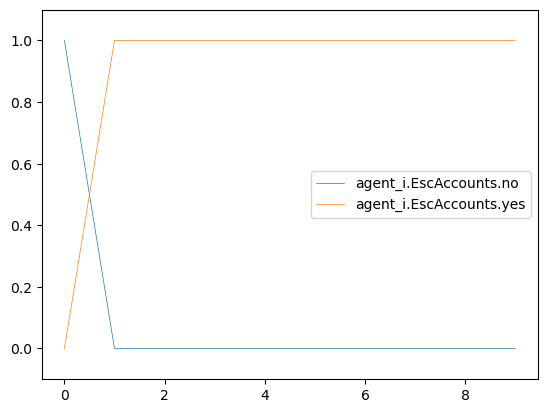

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                0.500000                 0.500000             Nop   
1                0.500000                 0.500000             Nop   
2                0.500000                 0.500000             Nop   
3                0.500000                 0.500000       FileRecon   
4                0.500000                 0.500000    EnumAccounts   
5                0.131579                 0.868421      PrivEscAcc   
6                0.000000                 1.000000       FileRecon   
7                0.000000                 1.000000       FileRecon   
8                0.000000                 1.000000  ManipulateData   
9                0.000000                 1.000000            Exit   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                            auth   
2           LogIOCs                            auth   
3  RestrictAccPrivs                            auth   
4           LogIOCs                          denied   
5           LogIOCs                            auth   
6           LogIOCs                            auth   
7           LogIOCs                            auth   
8           LogIOCs                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           success   
1                   user_files                           failure   
2                         none                           success   
3                         none                           failure   
4                         none                           success   
5                         none                           failure   
6                         none                           failure   
7                         none                           success   
8                         none                           success   
9                   user_files                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                    perms_change  
4                          active                            none  
5                          active                    perms_change  
6                          active                            none  
7                          active                            none  
8                          active                            none  
9                      terminated                            none

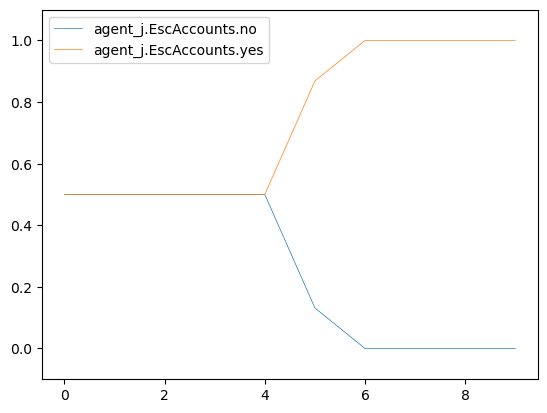

=============AccFound============


state.AccFound.no  state.AccFound.yes    agent_i.action  agent_j.action
0                1.0                 0.0      DecoyAccount             Nop
1                1.0                 0.0  RestrictAccPrivs             Nop
2                1.0                 0.0           LogIOCs             Nop
3                1.0                 0.0  RestrictAccPrivs       FileRecon
4                1.0                 0.0           LogIOCs    EnumAccounts
5                0.0                 1.0           LogIOCs      PrivEscAcc
6                0.0                 1.0           LogIOCs       FileRecon
7                0.0                 1.0           LogIOCs       FileRecon
8                0.0                 1.0           LogIOCs  ManipulateData
9                0.0                 1.0               Nop            Exit

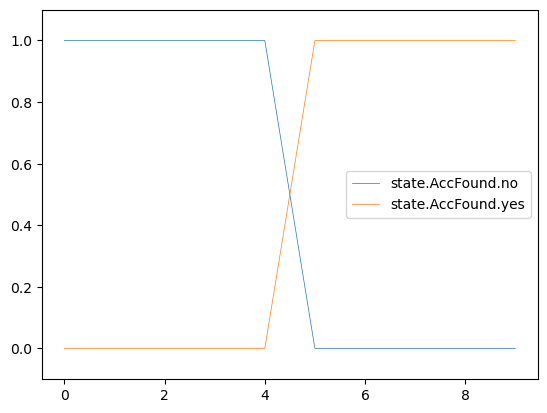

agent_i.AccFound.no  agent_i.AccFound.yes    agent_i.action  \
0             1.000000              0.000000      DecoyAccount   
1             1.000000              0.000000  RestrictAccPrivs   
2             0.994776              0.005224           LogIOCs   
3             0.603934              0.396066  RestrictAccPrivs   
4             0.346675              0.653325           LogIOCs   
5             0.178378              0.821622           LogIOCs   
6             0.066648              0.933352           LogIOCs   
7             0.017849              0.982151           LogIOCs   
8             0.006314              0.993686           LogIOCs   
9             0.001433              0.998567               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0             Nop                        file_enum  
1             Nop                             none  
2             Nop                             none  
3       FileRecon                        file_enum  
4    EnumAccounts                        file_enum  
5      PrivEscAcc                   login_activity  
6       FileRecon                        file_enum  
7       FileRecon                        file_enum  
8  ManipulateData                       file_write  
9            Exit                             none

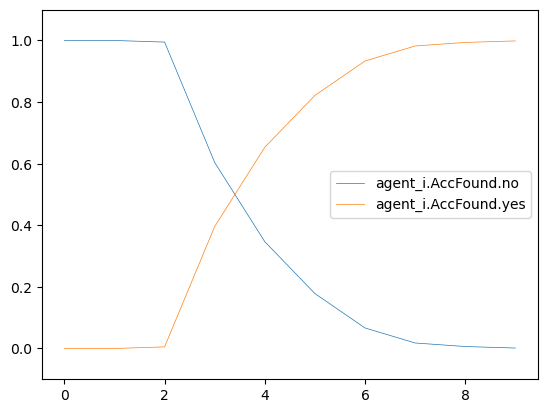

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action  \
0             1.000000              0.000000             Nop   
1             1.000000              0.000000             Nop   
2             1.000000              0.000000             Nop   
3             1.000000              0.000000       FileRecon   
4             1.000000              0.000000    EnumAccounts   
5             0.171053              0.828947      PrivEscAcc   
6             0.000000              1.000000       FileRecon   
7             0.000000              1.000000       FileRecon   
8             0.000000              1.000000  ManipulateData   
9             0.000000              1.000000            Exit   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                            auth   
2           LogIOCs                            auth   
3  RestrictAccPrivs                            auth   
4           LogIOCs                          denied   
5           LogIOCs                            auth   
6           LogIOCs                            auth   
7           LogIOCs                            auth   
8           LogIOCs                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           success   
1                   user_files                           failure   
2                         none                           success   
3                         none                           failure   
4                         none                           success   
5                         none                           failure   
6                         none                           failure   
7                         none                           success   
8                         none                           success   
9                   user_files                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                    perms_change  
4                          active                            none  
5                          active                    perms_change  
6                          active                            none  
7                          active                            none  
8                          active                            none  
9                      terminated                            none

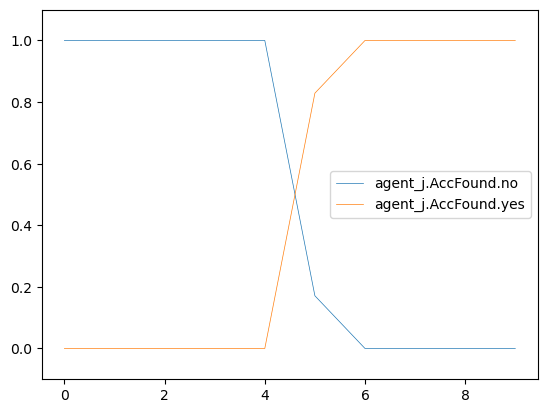

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot    agent_i.action  agent_j.action  
0                      1.0      DecoyAccount             Nop  
1                      1.0  RestrictAccPrivs             Nop  
2                      1.0           LogIOCs             Nop  
3                      1.0  RestrictAccPrivs       FileRecon  
4                      1.0           LogIOCs    EnumAccounts  
5                      1.0           LogIOCs      PrivEscAcc  
6                      1.0           LogIOCs       FileRecon  
7                      1.0           LogIOCs       FileRecon  
8                      1.0           LogIOCs  ManipulateData  
9                      1.0               Nop            Exit

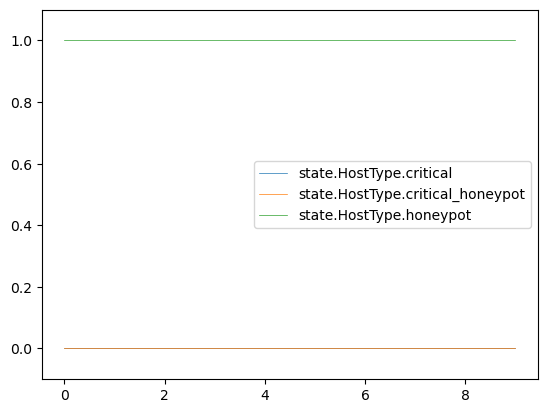

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot    agent_i.action  agent_j.action  \
0                        1.0      DecoyAccount             Nop   
1                        1.0  RestrictAccPrivs             Nop   
2                        1.0           LogIOCs             Nop   
3                        1.0  RestrictAccPrivs       FileRecon   
4                        1.0           LogIOCs    EnumAccounts   
5                        1.0           LogIOCs      PrivEscAcc   
6                        1.0           LogIOCs       FileRecon   
7                        1.0           LogIOCs       FileRecon   
8                        1.0           LogIOCs  ManipulateData   
9                        1.0               Nop            Exit   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                             none  
2                             none  
3                        file_enum  
4                        file_enum  
5                   login_activity  
6                        file_enum  
7                        file_enum  
8                       file_write  
9                             none

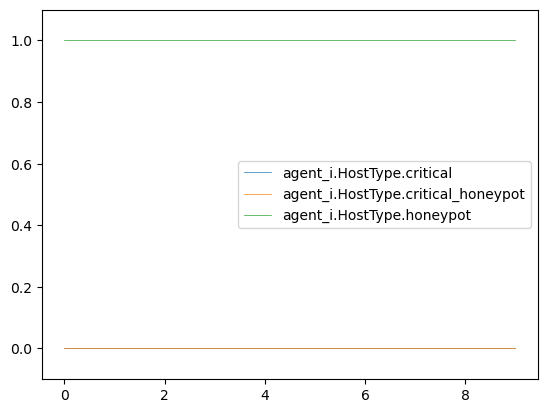

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot  agent_j.action    agent_i.action  \
0                        0.0             Nop      DecoyAccount   
1                        0.0             Nop  RestrictAccPrivs   
2                        0.0             Nop           LogIOCs   
3                        0.0       FileRecon  RestrictAccPrivs   
4                        0.0    EnumAccounts           LogIOCs   
5                        0.0      PrivEscAcc           LogIOCs   
6                        0.0       FileRecon           LogIOCs   
7                        0.0       FileRecon           LogIOCs   
8                        0.0  ManipulateData           LogIOCs   
9                        0.0            Exit               Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                   user_files   
1                            auth                   user_files   
2                            auth                         none   
3                            auth                         none   
4                          denied                         none   
5                            auth                         none   
6                            auth                         none   
7                            auth                         none   
8                            auth                         none   
9                            auth                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           success                          active   
1                           failure                          active   
2                           success                          active   
3                           failure                          active   
4                           success                          active   
5                           failure                          active   
6                           failure                          active   
7                           success                          active   
8                           success                          active   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                    perms_change  
2                            none  
3                    perms_change  
4                            none  
5                    perms_change  
6                            none  
7                            none  
8                            none  
9                            none

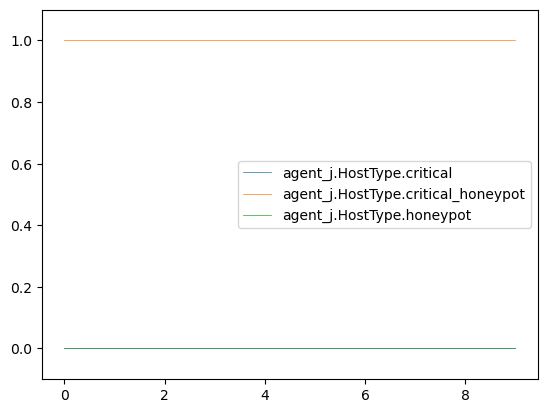

=============AttActive============


state.AttActive.no  state.AttActive.yes    agent_i.action  agent_j.action
0                 0.0                  1.0      DecoyAccount             Nop
1                 0.0                  1.0  RestrictAccPrivs             Nop
2                 0.0                  1.0           LogIOCs             Nop
3                 0.0                  1.0  RestrictAccPrivs       FileRecon
4                 0.0                  1.0           LogIOCs    EnumAccounts
5                 0.0                  1.0           LogIOCs      PrivEscAcc
6                 0.0                  1.0           LogIOCs       FileRecon
7                 0.0                  1.0           LogIOCs       FileRecon
8                 0.0                  1.0           LogIOCs  ManipulateData
9                 0.0                  1.0               Nop            Exit

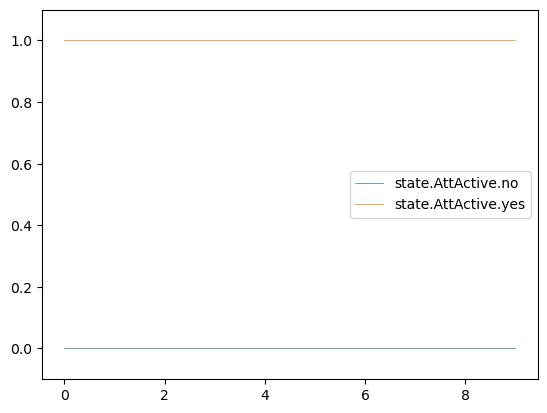

agent_i.AttActive.no  agent_i.AttActive.yes    agent_i.action  \
0              0.000000               1.000000      DecoyAccount   
1              0.000000               1.000000  RestrictAccPrivs   
2              0.000000               1.000000           LogIOCs   
3              0.000000               1.000000  RestrictAccPrivs   
4              0.000202               0.999798           LogIOCs   
5              0.055360               0.944640           LogIOCs   
6              0.026883               0.973117           LogIOCs   
7              0.022472               0.977528           LogIOCs   
8              0.017339               0.982661           LogIOCs   
9              0.052118               0.947882               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0             Nop                        file_enum  
1             Nop                             none  
2             Nop                             none  
3       FileRecon                        file_enum  
4    EnumAccounts                        file_enum  
5      PrivEscAcc                   login_activity  
6       FileRecon                        file_enum  
7       FileRecon                        file_enum  
8  ManipulateData                       file_write  
9            Exit                             none

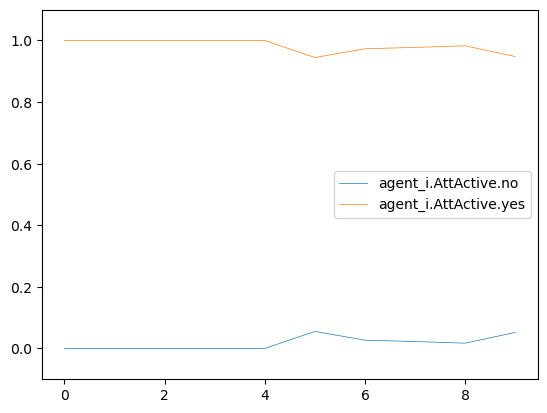

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action  \
0                   0.0                    1.0             Nop   
1                   0.0                    1.0             Nop   
2                   0.0                    1.0             Nop   
3                   0.0                    1.0       FileRecon   
4                   0.0                    1.0    EnumAccounts   
5                   0.0                    1.0      PrivEscAcc   
6                   0.0                    1.0       FileRecon   
7                   0.0                    1.0       FileRecon   
8                   0.0                    1.0  ManipulateData   
9                   0.0                    1.0            Exit   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                            auth   
2           LogIOCs                            auth   
3  RestrictAccPrivs                            auth   
4           LogIOCs                          denied   
5           LogIOCs                            auth   
6           LogIOCs                            auth   
7           LogIOCs                            auth   
8           LogIOCs                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           success   
1                   user_files                           failure   
2                         none                           success   
3                         none                           failure   
4                         none                           success   
5                         none                           failure   
6                         none                           failure   
7                         none                           success   
8                         none                           success   
9                   user_files                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                    perms_change  
4                          active                            none  
5                          active                    perms_change  
6                          active                            none  
7                          active                            none  
8                          active                            none  
9                      terminated                            none

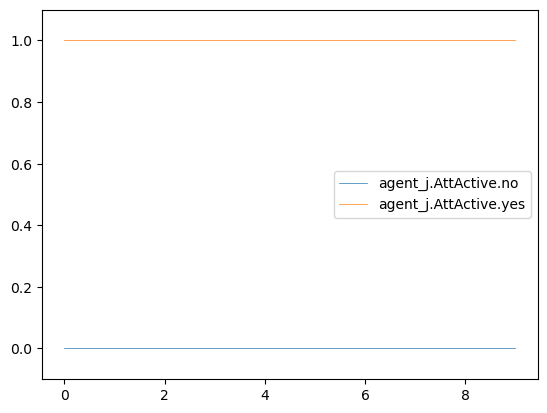

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user    agent_i.action  \
0                     0.0                     1.0      DecoyAccount   
1                     0.0                     1.0  RestrictAccPrivs   
2                     0.0                     1.0           LogIOCs   
3                     0.0                     1.0  RestrictAccPrivs   
4                     0.0                     1.0           LogIOCs   
5                     0.0                     1.0           LogIOCs   
6                     1.0                     0.0           LogIOCs   
7                     1.0                     0.0           LogIOCs   
8                     1.0                     0.0           LogIOCs   
9                     1.0                     0.0               Nop   

   agent_j.action  
0             Nop  
1             Nop  
2             Nop  
3       FileRecon  
4    EnumAccounts  
5      PrivEscAcc  
6       FileRecon  
7       FileRecon  
8  ManipulateData  
9            Exit

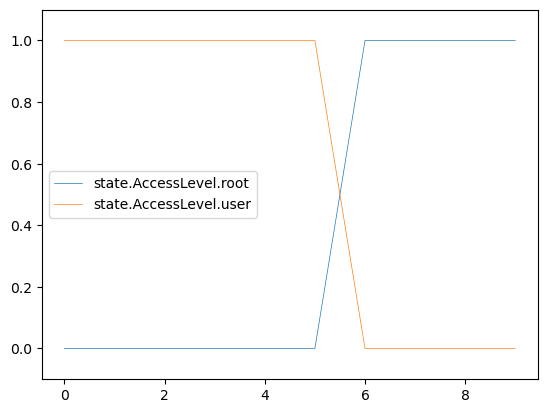

agent_i.AccessLevel.root  agent_i.AccessLevel.user    agent_i.action  \
0                  0.000000                  1.000000      DecoyAccount   
1                  0.000000                  1.000000  RestrictAccPrivs   
2                  0.000000                  1.000000           LogIOCs   
3                  0.002947                  0.997053  RestrictAccPrivs   
4                  0.163422                  0.836578           LogIOCs   
5                  0.506745                  0.493255           LogIOCs   
6                  0.888898                  0.111102           LogIOCs   
7                  0.953752                  0.046248           LogIOCs   
8                  0.990838                  0.009162           LogIOCs   
9                  0.998108                  0.001893               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0             Nop                        file_enum  
1             Nop                             none  
2             Nop                             none  
3       FileRecon                        file_enum  
4    EnumAccounts                        file_enum  
5      PrivEscAcc                   login_activity  
6       FileRecon                        file_enum  
7       FileRecon                        file_enum  
8  ManipulateData                       file_write  
9            Exit                             none

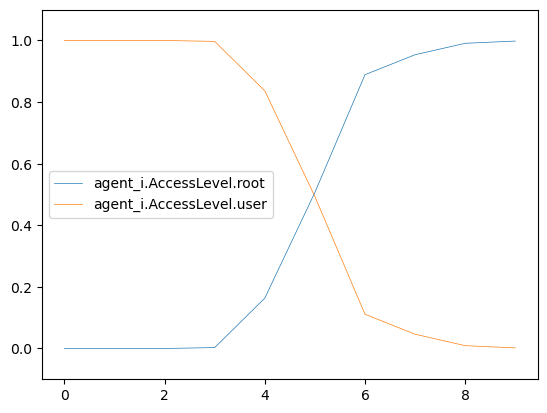

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                       0.0                       1.0             Nop   
1                       0.0                       1.0             Nop   
2                       0.0                       1.0             Nop   
3                       0.0                       1.0       FileRecon   
4                       0.0                       1.0    EnumAccounts   
5                       0.0                       1.0      PrivEscAcc   
6                       1.0                       0.0       FileRecon   
7                       1.0                       0.0       FileRecon   
8                       1.0                       0.0  ManipulateData   
9                       1.0                       0.0            Exit   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                            auth   
2           LogIOCs                            auth   
3  RestrictAccPrivs                            auth   
4           LogIOCs                          denied   
5           LogIOCs                            auth   
6           LogIOCs                            auth   
7           LogIOCs                            auth   
8           LogIOCs                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           success   
1                   user_files                           failure   
2                         none                           success   
3                         none                           failure   
4                         none                           success   
5                         none                           failure   
6                         none                           failure   
7                         none                           success   
8                         none                           success   
9                   user_files                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                    perms_change  
4                          active                            none  
5                          active                    perms_change  
6                          active                            none  
7                          active                            none  
8                          active                            none  
9                      terminated                            none

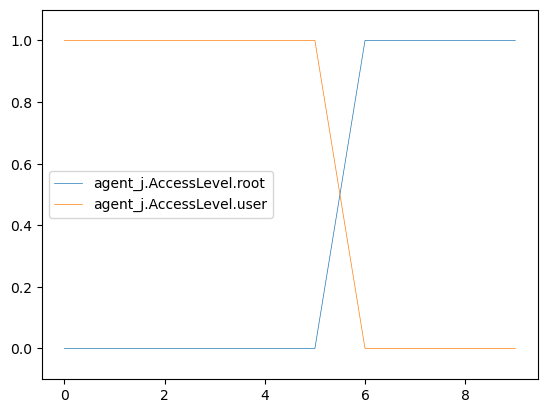

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes    agent_i.action  \
0                    1.0                     0.0      DecoyAccount   
1                    1.0                     0.0  RestrictAccPrivs   
2                    1.0                     0.0           LogIOCs   
3                    1.0                     0.0  RestrictAccPrivs   
4                    1.0                     0.0           LogIOCs   
5                    1.0                     0.0           LogIOCs   
6                    1.0                     0.0           LogIOCs   
7                    1.0                     0.0           LogIOCs   
8                    1.0                     0.0           LogIOCs   
9                    0.0                     1.0               Nop   

   agent_j.action  
0             Nop  
1             Nop  
2             Nop  
3       FileRecon  
4    EnumAccounts  
5      PrivEscAcc  
6       FileRecon  
7       FileRecon  
8  ManipulateData  
9            Exit

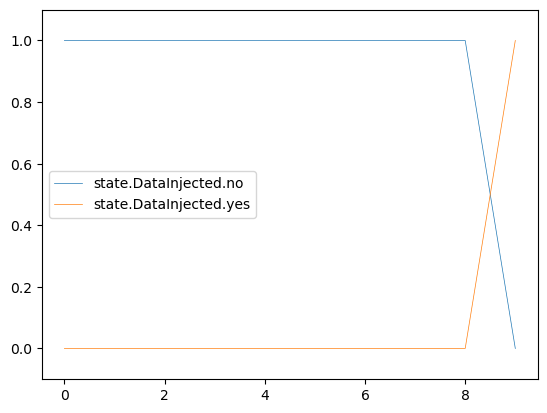

agent_i.DataInjected.no  agent_i.DataInjected.yes    agent_i.action  \
0                 1.000000                  0.000000      DecoyAccount   
1                 1.000000                  0.000000  RestrictAccPrivs   
2                 1.000000                  0.000000           LogIOCs   
3                 1.000000                  0.000000  RestrictAccPrivs   
4                 1.000000                  0.000000           LogIOCs   
5                 0.998146                  0.001854           LogIOCs   
6                 0.914969                  0.085031           LogIOCs   
7                 0.972942                  0.027058           LogIOCs   
8                 0.794315                  0.205685           LogIOCs   
9                 0.076804                  0.923196               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0             Nop                        file_enum  
1             Nop                             none  
2             Nop                             none  
3       FileRecon                        file_enum  
4    EnumAccounts                        file_enum  
5      PrivEscAcc                   login_activity  
6       FileRecon                        file_enum  
7       FileRecon                        file_enum  
8  ManipulateData                       file_write  
9            Exit                             none

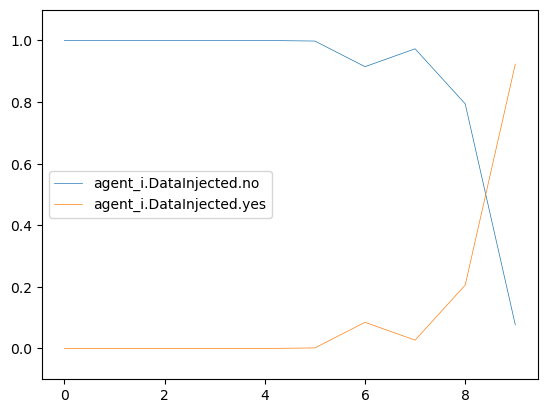

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000             Nop   
1                 1.000000                  0.000000             Nop   
2                 1.000000                  0.000000             Nop   
3                 1.000000                  0.000000       FileRecon   
4                 1.000000                  0.000000    EnumAccounts   
5                 1.000000                  0.000000      PrivEscAcc   
6                 1.000000                  0.000000       FileRecon   
7                 1.000000                  0.000000       FileRecon   
8                 1.000000                  0.000000  ManipulateData   
9                 0.000111                  0.999889            Exit   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                            auth   
2           LogIOCs                            auth   
3  RestrictAccPrivs                            auth   
4           LogIOCs                          denied   
5           LogIOCs                            auth   
6           LogIOCs                            auth   
7           LogIOCs                            auth   
8           LogIOCs                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           success   
1                   user_files                           failure   
2                         none                           success   
3                         none                           failure   
4                         none                           success   
5                         none                           failure   
6                         none                           failure   
7                         none                           success   
8                         none                           success   
9                   user_files                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                    perms_change  
4                          active                            none  
5                          active                    perms_change  
6                          active                            none  
7                          active                            none  
8                          active                            none  
9                      terminated                            none

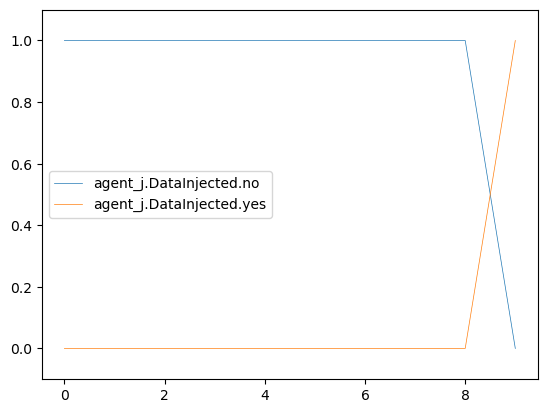

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user    agent_i.action  \
0                   0.0                   1.0      DecoyAccount   
1                   0.0                   1.0  RestrictAccPrivs   
2                   1.0                   0.0           LogIOCs   
3                   1.0                   0.0  RestrictAccPrivs   
4                   1.0                   0.0           LogIOCs   
5                   1.0                   0.0           LogIOCs   
6                   1.0                   0.0           LogIOCs   
7                   1.0                   0.0           LogIOCs   
8                   1.0                   0.0           LogIOCs   
9                   1.0                   0.0               Nop   

   agent_j.action  
0             Nop  
1             Nop  
2             Nop  
3       FileRecon  
4    EnumAccounts  
5      PrivEscAcc  
6       FileRecon  
7       FileRecon  
8  ManipulateData  
9            Exit

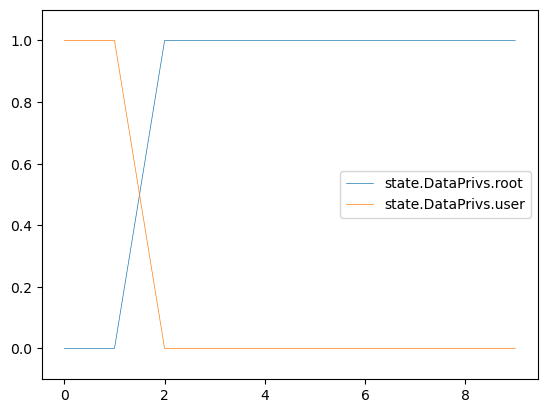

agent_i.DataPrivs.root  agent_i.DataPrivs.user    agent_i.action  \
0                     0.0                     1.0      DecoyAccount   
1                     0.0                     1.0  RestrictAccPrivs   
2                     1.0                     0.0           LogIOCs   
3                     1.0                     0.0  RestrictAccPrivs   
4                     1.0                     0.0           LogIOCs   
5                     1.0                     0.0           LogIOCs   
6                     1.0                     0.0           LogIOCs   
7                     1.0                     0.0           LogIOCs   
8                     1.0                     0.0           LogIOCs   
9                     1.0                     0.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0             Nop                        file_enum  
1             Nop                             none  
2             Nop                             none  
3       FileRecon                        file_enum  
4    EnumAccounts                        file_enum  
5      PrivEscAcc                   login_activity  
6       FileRecon                        file_enum  
7       FileRecon                        file_enum  
8  ManipulateData                       file_write  
9            Exit                             none

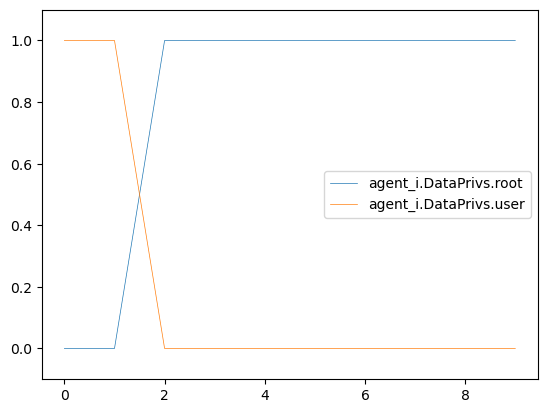

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000             Nop   
1                0.571429                0.428571             Nop   
2                0.571429                0.428571             Nop   
3                0.551247                0.448754       FileRecon   
4                0.627958                0.372042    EnumAccounts   
5                0.627958                0.372042      PrivEscAcc   
6                0.627958                0.372042       FileRecon   
7                0.604210                0.395790       FileRecon   
8                0.722252                0.277748  ManipulateData   
9                0.756865                0.243135            Exit   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                            auth   
2           LogIOCs                            auth   
3  RestrictAccPrivs                            auth   
4           LogIOCs                          denied   
5           LogIOCs                            auth   
6           LogIOCs                            auth   
7           LogIOCs                            auth   
8           LogIOCs                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           success   
1                   user_files                           failure   
2                         none                           success   
3                         none                           failure   
4                         none                           success   
5                         none                           failure   
6                         none                           failure   
7                         none                           success   
8                         none                           success   
9                   user_files                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                    perms_change  
4                          active                            none  
5                          active                    perms_change  
6                          active                            none  
7                          active                            none  
8                          active                            none  
9                      terminated                            none

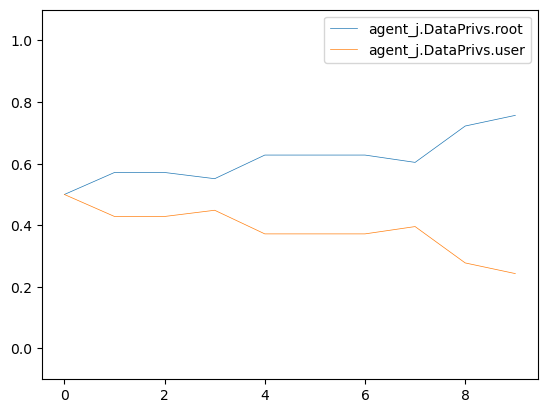

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes    agent_i.action  \
0                   0.0                    1.0      DecoyAccount   
1                   0.0                    1.0  RestrictAccPrivs   
2                   0.0                    1.0           LogIOCs   
3                   0.0                    1.0  RestrictAccPrivs   
4                   0.0                    1.0           LogIOCs   
5                   0.0                    1.0           LogIOCs   
6                   0.0                    1.0           LogIOCs   
7                   0.0                    1.0           LogIOCs   
8                   0.0                    1.0           LogIOCs   
9                   0.0                    1.0               Nop   

   agent_j.action  
0             Nop  
1             Nop  
2             Nop  
3       FileRecon  
4    EnumAccounts  
5      PrivEscAcc  
6       FileRecon  
7       FileRecon  
8  ManipulateData  
9            Exit

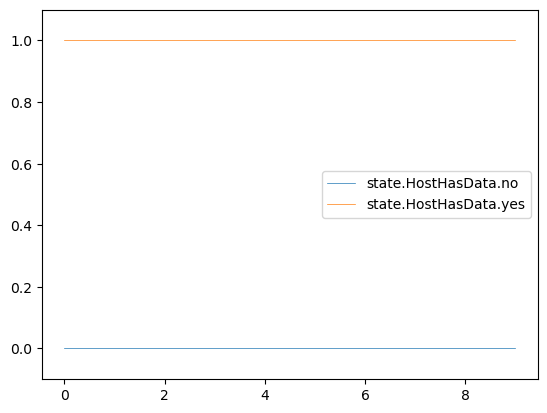

agent_i.HostHasData.no  agent_i.HostHasData.yes    agent_i.action  \
0                     0.0                      1.0      DecoyAccount   
1                     0.0                      1.0  RestrictAccPrivs   
2                     0.0                      1.0           LogIOCs   
3                     0.0                      1.0  RestrictAccPrivs   
4                     0.0                      1.0           LogIOCs   
5                     0.0                      1.0           LogIOCs   
6                     0.0                      1.0           LogIOCs   
7                     0.0                      1.0           LogIOCs   
8                     0.0                      1.0           LogIOCs   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0             Nop                        file_enum  
1             Nop                             none  
2             Nop                             none  
3       FileRecon                        file_enum  
4    EnumAccounts                        file_enum  
5      PrivEscAcc                   login_activity  
6       FileRecon                        file_enum  
7       FileRecon                        file_enum  
8  ManipulateData                       file_write  
9            Exit                             none

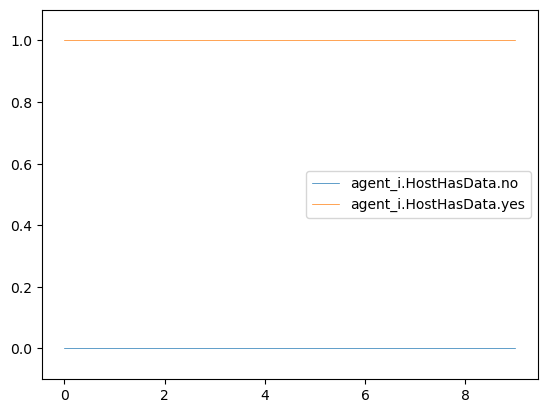

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000             Nop   
1                0.500000                 0.500000             Nop   
2                0.500000                 0.500000             Nop   
3                0.500000                 0.500000       FileRecon   
4                0.569580                 0.430420    EnumAccounts   
5                0.569580                 0.430420      PrivEscAcc   
6                0.569580                 0.430420       FileRecon   
7                0.753031                 0.246968       FileRecon   
8                0.170824                 0.829176  ManipulateData   
9                0.000104                 0.999896            Exit   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                            auth   
2           LogIOCs                            auth   
3  RestrictAccPrivs                            auth   
4           LogIOCs                          denied   
5           LogIOCs                            auth   
6           LogIOCs                            auth   
7           LogIOCs                            auth   
8           LogIOCs                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           success   
1                   user_files                           failure   
2                         none                           success   
3                         none                           failure   
4                         none                           success   
5                         none                           failure   
6                         none                           failure   
7                         none                           success   
8                         none                           success   
9                   user_files                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                    perms_change  
4                          active                            none  
5                          active                    perms_change  
6                          active                            none  
7                          active                            none  
8                          active                            none  
9                      terminated                            none

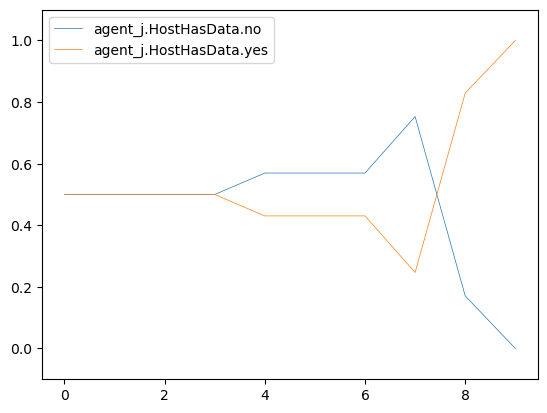

+++++++++++++++++++ End Interaction +++++++++++++++++++


In [7]:
# Get belief over opponent frames
def get_opponent_frame(dataframe):
    
    thetaj_columns = list(filter(lambda x: "thetaj" in x.split("."), dataframe))
    
    if len(thetaj_columns) > 0:
        return dataframe[thetaj_columns]
    
    else:
        return None

# Print and plot P(Theta_j)
def print_thetaj_belief(belief_thetaj_df, obs):
    df = pandas.concat([belief_thetaj_df, obs], axis=1)
    display(df)
    df.plot(linewidth=0.5)
    plotter.ylim(-0.1, 1.1)
    plotter.show()

# Summarize beliefs
def summarize_beliefs(state_vars, dataframe):
    print(f"+++++++++++++++++++ Begin Interaction +++++++++++++++++++")
    agent_i_data = filter_columns_by_agent(dataframe, "agent_i")
    agent_j_data = filter_columns_by_agent(dataframe, "agent_j")
    states = filter_columns_by_agent(dataframe, "state")
    
    actions_i = filter_columns_by_state(agent_i_data, "action")
    actions_j = filter_columns_by_state(agent_j_data, "action")
    
    obs_i = filter_columns_by_state(agent_i_data, "observation")
    obs_j = filter_columns_by_state(agent_j_data, "observation")
    
    i_belief_thetaj = get_opponent_frame(agent_i_data)
    if i_belief_thetaj is not None:
        print_thetaj_belief(i_belief_thetaj, obs_i)
    
    j_belief_thetaj = get_opponent_frame(agent_j_data)
    if j_belief_thetaj is not None:
        print_thetaj_belief(j_belief_thetaj, obs_j)
    
    for var in state_vars:
        print(f"============={var}============")
        # show state
        state_values = filter_columns_by_state(states, var)
        state_values = pandas.concat([state_values, actions_i, actions_j], axis = 1)
        display(state_values)
        state_values.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        
        # show agent i
        agent_i_beliefs = filter_columns_by_state(agent_i_data, var)
        agent_i_beliefs = pandas.concat([agent_i_beliefs, actions_i, actions_j, obs_i], axis = 1)
        display(agent_i_beliefs)
        agent_i_beliefs.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        
        # show agent j
        agent_j_beliefs = filter_columns_by_state(agent_j_data, var)
        agent_j_beliefs = pandas.concat([agent_j_beliefs, actions_j, actions_i, obs_j], axis = 1)
        display(agent_j_beliefs)
        agent_j_beliefs.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        print("==============================")
    
    print(f"+++++++++++++++++++ End Interaction +++++++++++++++++++")

# Use state data to figure out the state variables
def get_state_vars(columns):
    
    states = filter(lambda x: "state" in x.split(".") and len(x.split(".")) >= 2, columns)
    state_vars = map(lambda x: x.split(".")[1], states)
    
    return list(set(state_vars))

# Fetch dataframe with columns belonging to a particular agent
def filter_columns_by_agent(dataframe, name):
    columns = dataframe.columns
    filtered_columns = list(filter(lambda x: name in x.split("."), columns))
    
    df = dataframe[filtered_columns]
    return df

# Get columns containing the state name in the header
def filter_columns_by_state(dataframe, state):
    filtered_columns = list(filter(lambda x: state in x.split("."), dataframe.columns))
    return dataframe[filtered_columns]

# Main loop to summarize all traces
for trace in TRACE_FILES:
    data = load_json(trace)
    
    dataframe = pandas.json_normalize(data)    
    state_vars = get_state_vars(dataframe.columns)
    
    summarize_beliefs(state_vars, dataframe)

    